In [1]:
import os
import sys
import time
import random
import pandas as pd
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
from scipy.linalg import svd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from side_info_decoding.utils import (
    set_seed, 
    load_data_from_pids, 
    sliding_window_over_trials
)
from side_info_decoding.reduced_rank import (
    Multi_Task_Reduced_Rank_Model, 
    train_multi_task, 
    model_eval
)

from one.api import ONE

seed = 666
set_seed(seed)

In [2]:
%matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 10
BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=2)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10

In [3]:
regions = [
    "CP", "GPe", "LSr",
    "PO", "DG", #"LP",
    "NI", "PB", "PAG",
    "SCm", "SNr", "IRN",
    "SPIV", "LGv", "LIN", "MDRN",
    "PYR", "COPY", "VAL",
    "ORBvl", "Alv", "FRP",
    "STN", "APr"
]

1/23 regions remaining ...
CP: 85 PIDs
pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: e5bd461c-a713-4b3c-b165-a132a711e59d
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 152 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 489/489 [00:00<00:00, 1258.12it/s]


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 52 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 460/460 [00:00<00:00, 3995.31it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 71 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 556/556 [00:00<00:00, 3444.95it/s]


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 52 Kilosort units in region cp


Compute spike count: 100%|███████████████████| 501/501 [00:02<00:00, 248.73it/s]


pulling data from ibl database ..
eid: 4546cd60-fa2a-4d20-a9b6-d091e01d16f2
pid: a464fc97-1391-4bbe-9aef-73a79975d27f
number of trials found: 488
found 488 trials from 55.38 to 2730.49 sec.
found 37 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 488/488 [00:00<00:00, 1938.46it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 310c60b6-d68f-4018-a86a-3668ce296837
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 166 Kilosort units in region cp


Compute spike count: 100%|███████████████████| 775/775 [00:01<00:00, 415.77it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 06cb2ee3-0fb8-4ace-acbe-19c716f3ca40
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 133 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 775/775 [00:00<00:00, 2432.42it/s]


pulling data from ibl database ..
eid: 8a1cf4ef-06e3-4c72-9bc7-e1baa189841b
pid: 5e8ac11b-959a-49ab-a6a3-8a3397e1df0e
number of trials found: 352
found 352 trials from 12.95 to 2826.29 sec.
found 205 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 352/352 [00:00<00:00, 1418.72it/s]


pulling data from ibl database ..
eid: 27ef44c0-acb2-4220-b776-477d0d5abd35
pid: d23dec01-b35e-4950-9afa-72a1b3e74148
number of trials found: 515
found 515 trials from 130.73 to 3420.40 sec.
found 112 Kilosort units in region cp


Compute spike count: 100%|███████████████████| 515/515 [00:00<00:00, 558.10it/s]


pulling data from ibl database ..
eid: 63c70ae8-4dfb-418b-b21b-f0b1e5fba6c9
pid: 83716e49-3026-41a3-b021-1a4b6362f433
number of trials found: 786
found 786 trials from 164.72 to 4027.97 sec.
found 12 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 786/786 [00:00<00:00, 1823.82it/s]


pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: e5bd461c-a713-4b3c-b165-a132a711e59d
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 9 good units in region cp


Compute spike count: 100%|██████████████████| 489/489 [00:00<00:00, 8456.29it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 2 good units in region cp


Compute spike count: 100%|██████████████████| 460/460 [00:00<00:00, 8784.36it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 4 good units in region cp


Compute spike count: 100%|█████████████████| 556/556 [00:00<00:00, 15595.54it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 1 good units in region cp


Compute spike count: 100%|█████████████████| 501/501 [00:00<00:00, 21024.19it/s]


pulling data from ibl database ..
eid: 4546cd60-fa2a-4d20-a9b6-d091e01d16f2
pid: a464fc97-1391-4bbe-9aef-73a79975d27f
number of trials found: 488
found 488 trials from 55.38 to 2730.49 sec.
found 5 good units in region cp


Compute spike count: 100%|█████████████████| 488/488 [00:00<00:00, 13462.91it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 310c60b6-d68f-4018-a86a-3668ce296837
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 58 good units in region cp


Compute spike count: 100%|██████████████████| 775/775 [00:00<00:00, 1425.86it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 06cb2ee3-0fb8-4ace-acbe-19c716f3ca40
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 25 good units in region cp


Compute spike count: 100%|██████████████████| 775/775 [00:00<00:00, 5562.29it/s]


pulling data from ibl database ..
eid: 8a1cf4ef-06e3-4c72-9bc7-e1baa189841b
pid: 5e8ac11b-959a-49ab-a6a3-8a3397e1df0e
number of trials found: 352
found 352 trials from 12.95 to 2826.29 sec.
found 40 good units in region cp


Compute spike count: 100%|██████████████████| 352/352 [00:00<00:00, 4114.48it/s]


pulling data from ibl database ..
eid: 27ef44c0-acb2-4220-b776-477d0d5abd35
pid: d23dec01-b35e-4950-9afa-72a1b3e74148
number of trials found: 515
found 515 trials from 130.73 to 3420.40 sec.
found 15 good units in region cp


Compute spike count: 100%|██████████████████| 515/515 [00:00<00:00, 3253.82it/s]


pulling data from ibl database ..
eid: 63c70ae8-4dfb-418b-b21b-f0b1e5fba6c9
pid: 83716e49-3026-41a3-b021-1a4b6362f433
number of trials found: 786
found 786 trials from 164.72 to 4027.97 sec.
found 0 good units in region cp


Compute spike count: 100%|█████████████████| 786/786 [00:00<00:00, 90589.22it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 11.755214392745193
Epoch [1000/5000], Loss: 3.488315598791984
Epoch [1500/5000], Loss: 1.3278031811640105
Epoch [2000/5000], Loss: 0.751924884017202
Epoch [2500/5000], Loss: 0.5983743739288678
Epoch [3000/5000], Loss: 0.5074104828582525
Epoch [3500/5000], Loss: 0.4543722518876695
Epoch [4000/5000], Loss: 0.43564573864366174
Epoch [4500/5000], Loss: 0.42913552316096587
Epoch [5000/5000], Loss: 0.42683481060594064


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


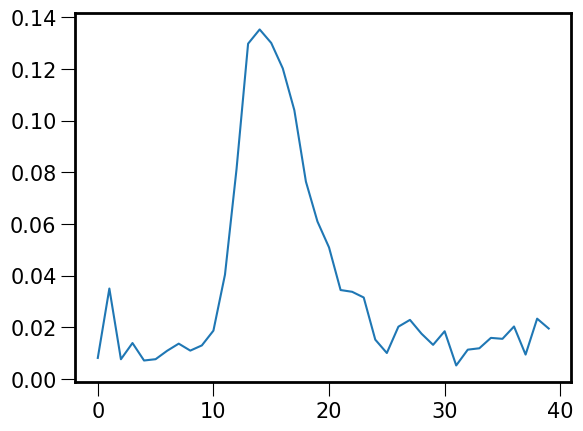

Epoch [500/5000], Loss: 7.482477126954391
Epoch [1000/5000], Loss: 1.1661177044655633
Epoch [1500/5000], Loss: 0.2749959592193744
Epoch [2000/5000], Loss: 0.1339814871268577
Epoch [2500/5000], Loss: 0.10413499911706195
Epoch [3000/5000], Loss: 0.09252677726542953
Epoch [3500/5000], Loss: 0.08554869708302269
Epoch [4000/5000], Loss: 0.08094535983507864
Epoch [4500/5000], Loss: 0.07829186359226996
Epoch [5000/5000], Loss: 0.07698904150066219
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 1.000 au

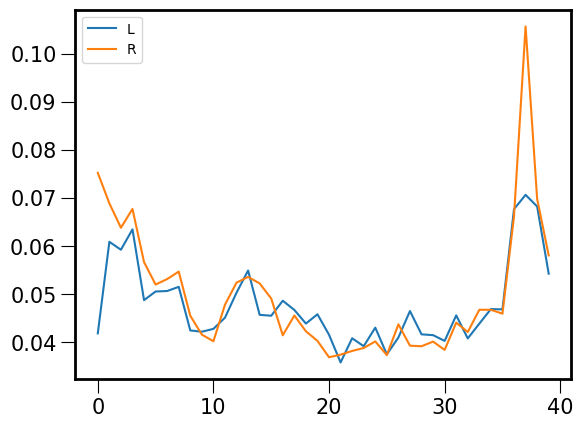

Epoch [500/5000], Loss: 6.904950207427861
Epoch [1000/5000], Loss: 1.3331434639958617
Epoch [1500/5000], Loss: 0.34845515098482654
Epoch [2000/5000], Loss: 0.1695337228666261
Epoch [2500/5000], Loss: 0.14166444286798374
Epoch [3000/5000], Loss: 0.12329696918558428
Epoch [3500/5000], Loss: 0.11348755783810034
Epoch [4000/5000], Loss: 0.1102281410169708
Epoch [4500/5000], Loss: 0.10968025692589593
Epoch [5000/5000], Loss: 0.10967939494547845
task 0 train accuracy: 1.000 auc: 1.000
task 0 test accuracy: 1.000 auc: 1.000
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 0.986 auc: 1.000
task 2 test accuracy: 0.986 auc: 1.000
task 3 train accuracy: 0.985 auc: 0.924
task 3 test accuracy: 0.985 auc: 0.924
task 4 train accuracy: 0.949 auc: 0.994
task 4 test accuracy: 0.949 auc: 0.994
task 5 train accuracy: 1.000 auc: 1.000
task 5 test accuracy: 1.000 auc: 1.000
task 6 train accuracy: 0.991 auc: 0.982
task 6 test accuracy: 0.991 auc: 0.982
task 7 

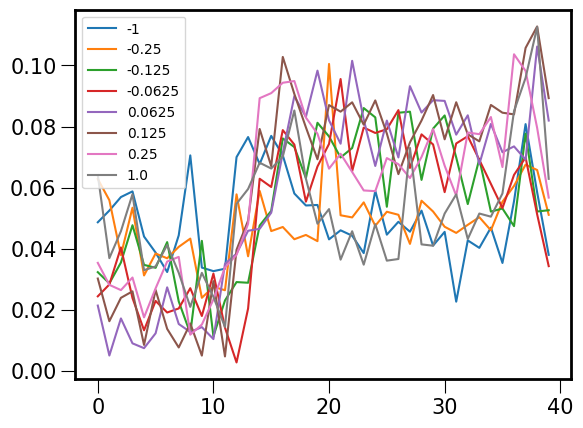

1/5 folds remaining ...
Epoch [500/5000], Loss: 13.28744703534232
Epoch [1000/5000], Loss: 4.231213281885873
Epoch [1500/5000], Loss: 1.309739632645297
Epoch [2000/5000], Loss: 0.7112723880780015
Epoch [2500/5000], Loss: 0.5708437188716714
Epoch [3000/5000], Loss: 0.49282448477265006
Epoch [3500/5000], Loss: 0.44856247371738805
Epoch [4000/5000], Loss: 0.42839314221543584
Epoch [4500/5000], Loss: 0.4213998177205718
Epoch [5000/5000], Loss: 0.41957810750615404
task 0 train accuracy: 0.872 auc: 0.935
task 0 test accuracy: 0.837 auc: 0.883
task 1 train accuracy: 0.777 auc: 0.845
task 1 test accuracy: 0.696 auc: 0.841
task 2 train accuracy: 0.876 auc: 0.950
task 2 test accuracy: 0.848 auc: 0.924
task 3 train accuracy: 0.902 auc: 0.946
task 3 test accuracy: 0.832 auc: 0.859
task 4 train accuracy: 0.692 auc: 0.749
task 4 test accuracy: 0.673 auc: 0.704
task 5 train accuracy: 0.963 auc: 0.995
task 5 test accuracy: 0.948 auc: 0.987
task 6 train accuracy: 0.866 auc: 0.948
task 6 test accuracy: 

Compute spike count: 100%|██████████████████| 398/398 [00:00<00:00, 7351.75it/s]


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 35 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 460/460 [00:00<00:00, 728.41it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 57 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 556/556 [00:02<00:00, 224.00it/s]


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 171 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 501/501 [00:03<00:00, 125.83it/s]


pulling data from ibl database ..
eid: e9fc0a2d-c69d-44d1-9fa3-314782387cae
pid: 06d42449-d6ac-4c35-8f85-24ecfbc08bc1
number of trials found: 373
found 373 trials from 29.16 to 3462.97 sec.
found 173 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 373/373 [00:02<00:00, 132.01it/s]


pulling data from ibl database ..
eid: 0cc486c3-8c7b-494d-aa04-b70e2690bcba
pid: d8ccc6bb-f0d9-494a-b682-f12c73e228c6
number of trials found: 499
found 499 trials from 117.82 to 2843.18 sec.
found 61 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 499/499 [00:03<00:00, 154.74it/s]


pulling data from ibl database ..
eid: 35ed605c-1a1a-47b1-86ff-2b56144f55af
pid: 117f0d28-3cc0-4837-9e3e-46db5bc3e662
number of trials found: 463
found 463 trials from 16.81 to 2359.51 sec.
found 64 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 463/463 [00:02<00:00, 159.59it/s]


pulling data from ibl database ..
eid: 0b7ee1b6-42db-46cd-a465-08f531366187
pid: b8dbd3af-a589-41e4-878c-3372eaa1a8f6
number of trials found: 704
found 704 trials from 43.73 to 3753.06 sec.
found 95 Kilosort units in region gpe


Compute spike count: 100%|████████████████████| 704/704 [00:07<00:00, 92.21it/s]


pulling data from ibl database ..
eid: 768a371d-7e88-47f8-bf21-4a6a6570dd6e
pid: 39180bcb-13e5-46f9-89e1-8ea2cba22105
number of trials found: 349
found 349 trials from 80.79 to 2743.95 sec.
found 35 Kilosort units in region gpe


Compute spike count: 100%|██████████████████| 349/349 [00:00<00:00, 3197.02it/s]


pulling data from ibl database ..
eid: 28741f91-c837-4147-939e-918d38d849f2
pid: bf591043-03c2-48bb-9197-e17e85aaeb8f
number of trials found: 340
found 340 trials from 28.05 to 2993.06 sec.
found 49 Kilosort units in region gpe


Compute spike count: 100%|██████████████████| 340/340 [00:00<00:00, 1625.54it/s]


pulling data from ibl database ..
eid: c23b4118-db40-4333-af1d-933154b533c6
pid: 32e30a72-5f18-4aff-81c3-4553531b2d75
number of trials found: 398
found 398 trials from 53.60 to 2728.11 sec.
found 0 good units in region gpe


Compute spike count: 100%|█████████████████| 398/398 [00:00<00:00, 89340.81it/s]


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 0 good units in region gpe


Compute spike count: 100%|█████████████████| 460/460 [00:00<00:00, 77778.76it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 2 good units in region gpe


Compute spike count: 100%|██████████████████| 556/556 [00:00<00:00, 3168.88it/s]


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 10 good units in region gpe


Compute spike count: 100%|██████████████████| 501/501 [00:00<00:00, 1650.78it/s]


pulling data from ibl database ..
eid: e9fc0a2d-c69d-44d1-9fa3-314782387cae
pid: 06d42449-d6ac-4c35-8f85-24ecfbc08bc1
number of trials found: 373
found 373 trials from 29.16 to 3462.97 sec.
found 17 good units in region gpe


Compute spike count: 100%|███████████████████| 373/373 [00:00<00:00, 713.60it/s]


pulling data from ibl database ..
eid: 0cc486c3-8c7b-494d-aa04-b70e2690bcba
pid: d8ccc6bb-f0d9-494a-b682-f12c73e228c6
number of trials found: 499
found 499 trials from 117.82 to 2843.18 sec.
found 24 good units in region gpe


Compute spike count: 100%|███████████████████| 499/499 [00:01<00:00, 263.09it/s]


pulling data from ibl database ..
eid: 35ed605c-1a1a-47b1-86ff-2b56144f55af
pid: 117f0d28-3cc0-4837-9e3e-46db5bc3e662
number of trials found: 463
found 463 trials from 16.81 to 2359.51 sec.
found 19 good units in region gpe


Compute spike count: 100%|███████████████████| 463/463 [00:01<00:00, 314.51it/s]


pulling data from ibl database ..
eid: 0b7ee1b6-42db-46cd-a465-08f531366187
pid: b8dbd3af-a589-41e4-878c-3372eaa1a8f6
number of trials found: 704
found 704 trials from 43.73 to 3753.06 sec.
found 16 good units in region gpe


Compute spike count: 100%|███████████████████| 704/704 [00:01<00:00, 355.33it/s]


pulling data from ibl database ..
eid: 768a371d-7e88-47f8-bf21-4a6a6570dd6e
pid: 39180bcb-13e5-46f9-89e1-8ea2cba22105
number of trials found: 349
found 349 trials from 80.79 to 2743.95 sec.
found 7 good units in region gpe


Compute spike count: 100%|██████████████████| 349/349 [00:00<00:00, 5438.95it/s]


pulling data from ibl database ..
eid: 28741f91-c837-4147-939e-918d38d849f2
pid: bf591043-03c2-48bb-9197-e17e85aaeb8f
number of trials found: 340
found 340 trials from 28.05 to 2993.06 sec.
found 7 good units in region gpe


Compute spike count: 100%|██████████████████| 340/340 [00:00<00:00, 6303.27it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 12.186052327689977
Epoch [1000/5000], Loss: 3.9134389535079257
Epoch [1500/5000], Loss: 1.4279477720303515
Epoch [2000/5000], Loss: 0.7723340660033108
Epoch [2500/5000], Loss: 0.5880301635143466
Epoch [3000/5000], Loss: 0.48331353753383627
Epoch [3500/5000], Loss: 0.41681581269884505
Epoch [4000/5000], Loss: 0.3871310797210127
Epoch [4500/5000], Loss: 0.3758873845672783
Epoch [5000/5000], Loss: 0.37208556074793553


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


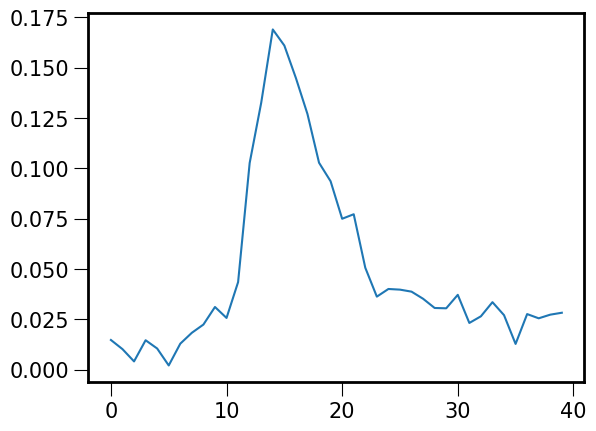

Epoch [500/5000], Loss: 4.163768631133328
Epoch [1000/5000], Loss: 0.7552773266553134
Epoch [1500/5000], Loss: 0.15582531717489867
Epoch [2000/5000], Loss: 0.05942422159281765
Epoch [2500/5000], Loss: 0.04214609342961923
Epoch [3000/5000], Loss: 0.03721979029160399
Epoch [3500/5000], Loss: 0.03523306089990293
Epoch [4000/5000], Loss: 0.0345629340580779
Epoch [4500/5000], Loss: 0.034385617143725095
Epoch [5000/5000], Loss: 0.03432862429961961
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 1.000 

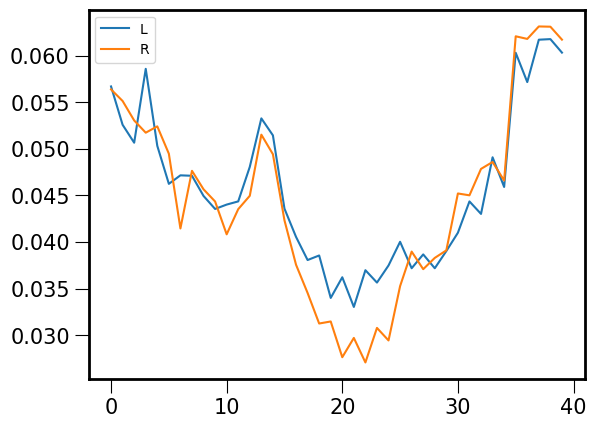

Epoch [500/5000], Loss: 5.195833683781628
Epoch [1000/5000], Loss: 0.49684579302735593
Epoch [1500/5000], Loss: 0.08699452712746923
Epoch [2000/5000], Loss: 0.060555695705668544
Epoch [2500/5000], Loss: 0.05816464162797565
Epoch [3000/5000], Loss: 0.05883481088277219
Epoch [3500/5000], Loss: 0.060024432233065146
Epoch [4000/5000], Loss: 0.06106554980314768
Epoch [4500/5000], Loss: 0.06180482086784088
Epoch [5000/5000], Loss: 0.06225596339784342
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 0.986 auc: 1.000
task 1 test accuracy: 0.986 auc: 1.000
task 2 train accuracy: 1.000 auc: 1.000
task 2 test accuracy: 1.000 auc: 1.000
task 3 train accuracy: 1.000 auc: 1.000
task 3 test accuracy: 1.000 auc: 1.000
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 0.984 auc: 1.000
task 5 test accuracy: 0.984 auc: 1.000
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 tra

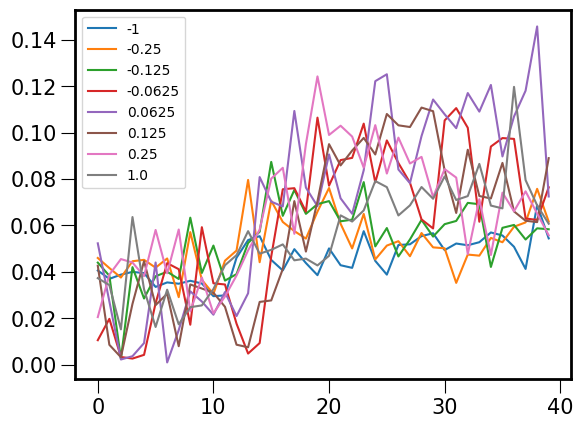

1/5 folds remaining ...
'32e30a72-5f18-4aff-81c3-4553531b2d75'
3/23 regions remaining ...
LSr: 32 PIDs
pulling data from ibl database ..
eid: cef05f87-161b-4031-932c-6f47daf89698
pid: c1014051-d06b-4f85-9887-e7c42a94baf2
number of trials found: 507
found 507 trials from 65.75 to 2758.36 sec.
found 49 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 507/507 [00:00<00:00, 1701.19it/s]


pulling data from ibl database ..
eid: 0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde
pid: 1ab86a7f-578b-4a46-9c9c-df3be97abcca
number of trials found: 1039
found 1039 trials from 38.64 to 5418.96 sec.
found 156 Kilosort units in region lsr


Compute spike count: 100%|█████████████████| 1039/1039 [00:04<00:00, 249.46it/s]


pulling data from ibl database ..
eid: 196a2adf-ff83-49b2-823a-33f990049c2e
pid: e92f8734-2c06-4168-9271-d00b3bf57c02
number of trials found: 526
found 526 trials from 126.81 to 2708.15 sec.
found 27 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 526/526 [00:00<00:00, 3289.70it/s]


pulling data from ibl database ..
eid: 19b44992-d527-4a12-8bda-aa11379cb08c
pid: c872ca65-8319-4901-856e-7dc507e2dd9c
number of trials found: 354
found 354 trials from 19.95 to 4672.96 sec.
found 4 Kilosort units in region lsr


Compute spike count: 100%|█████████████████| 354/354 [00:00<00:00, 42779.29it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: ebc9392c-1ecb-4b4b-a545-4e3d70d23611
pid: 6358854e-51d2-47de-a278-5cbfd155feb6
number of trials found: 412
found 412 trials from 24.32 to 4249.14 sec.
found 314 Kilosort units in region lsr


Compute spike count: 100%|███████████████████| 412/412 [00:01<00:00, 373.90it/s]


pulling data from ibl database ..
eid: a4a74102-2af5-45dc-9e41-ef7f5aed88be
pid: a5f2ec22-0ff3-4249-bd2f-6247c3990e53
number of trials found: 369
found 369 trials from 69.71 to 1863.38 sec.
found 144 Kilosort units in region lsr


Compute spike count: 100%|███████████████████| 369/369 [00:00<00:00, 886.71it/s]


pulling data from ibl database ..
eid: 6f6d2c8e-28be-49f4-ae4d-06be2d3148c1
pid: adcd791c-ead3-4572-a9cb-028bbee1d2e4
number of trials found: 486
found 486 trials from 39.95 to 2854.62 sec.
found 36 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 486/486 [00:00<00:00, 2262.01it/s]


pulling data from ibl database ..
eid: 113c5b6c-940e-4b21-b462-789b4c2be0e5
pid: af2a0072-e17e-4368-b80b-1359bf6d4647
number of trials found: 385
found 385 trials from 80.81 to 2695.28 sec.
found 76 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 385/385 [00:00<00:00, 1950.51it/s]


pulling data from ibl database ..
eid: 2c44a360-5a56-4971-8009-f469fb59de98
pid: 688606f8-9733-46f2-8331-b2dd84c5d385
number of trials found: 534
found 534 trials from 48.24 to 2813.73 sec.
found 98 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 534/534 [00:00<00:00, 1559.52it/s]


pulling data from ibl database ..
eid: d7e60cc3-6020-429e-a654-636c6cc677ea
pid: 6efc58a4-e1cd-4eca-9205-7e4898cc1f8b
number of trials found: 422
found 422 trials from 114.75 to 3915.00 sec.
found 151 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 422/422 [00:00<00:00, 1278.58it/s]


pulling data from ibl database ..
eid: cef05f87-161b-4031-932c-6f47daf89698
pid: c1014051-d06b-4f85-9887-e7c42a94baf2
number of trials found: 507
found 507 trials from 65.75 to 2758.36 sec.
found 2 good units in region lsr


Compute spike count: 100%|█████████████████| 507/507 [00:00<00:00, 20737.15it/s]


pulling data from ibl database ..
eid: 0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde
pid: 1ab86a7f-578b-4a46-9c9c-df3be97abcca
number of trials found: 1039
found 1039 trials from 38.64 to 5418.96 sec.
found 10 good units in region lsr


Compute spike count: 100%|████████████████| 1039/1039 [00:00<00:00, 1978.41it/s]


pulling data from ibl database ..
eid: 196a2adf-ff83-49b2-823a-33f990049c2e
pid: e92f8734-2c06-4168-9271-d00b3bf57c02
number of trials found: 526
found 526 trials from 126.81 to 2708.15 sec.
found 8 good units in region lsr


Compute spike count: 100%|██████████████████| 526/526 [00:00<00:00, 8060.66it/s]


pulling data from ibl database ..
eid: 19b44992-d527-4a12-8bda-aa11379cb08c
pid: c872ca65-8319-4901-856e-7dc507e2dd9c
number of trials found: 354
found 354 trials from 19.95 to 4672.96 sec.
found 0 good units in region lsr


Compute spike count: 100%|█████████████████| 354/354 [00:00<00:00, 88238.17it/s]


pulling data from ibl database ..
eid: ebc9392c-1ecb-4b4b-a545-4e3d70d23611
pid: 6358854e-51d2-47de-a278-5cbfd155feb6
number of trials found: 412
found 412 trials from 24.32 to 4249.14 sec.
found 71 good units in region lsr


Compute spike count: 100%|██████████████████| 412/412 [00:00<00:00, 1267.91it/s]


pulling data from ibl database ..
eid: a4a74102-2af5-45dc-9e41-ef7f5aed88be
pid: a5f2ec22-0ff3-4249-bd2f-6247c3990e53
number of trials found: 369
found 369 trials from 69.71 to 1863.38 sec.
found 22 good units in region lsr


Compute spike count: 100%|██████████████████| 369/369 [00:00<00:00, 3224.23it/s]


pulling data from ibl database ..
eid: 6f6d2c8e-28be-49f4-ae4d-06be2d3148c1
pid: adcd791c-ead3-4572-a9cb-028bbee1d2e4
number of trials found: 486
found 486 trials from 39.95 to 2854.62 sec.
found 10 good units in region lsr


Compute spike count: 100%|██████████████████| 486/486 [00:00<00:00, 2881.16it/s]


pulling data from ibl database ..
eid: 113c5b6c-940e-4b21-b462-789b4c2be0e5
pid: af2a0072-e17e-4368-b80b-1359bf6d4647
number of trials found: 385
found 385 trials from 80.81 to 2695.28 sec.
found 16 good units in region lsr


Compute spike count: 100%|██████████████████| 385/385 [00:00<00:00, 7614.57it/s]


pulling data from ibl database ..
eid: 2c44a360-5a56-4971-8009-f469fb59de98
pid: 688606f8-9733-46f2-8331-b2dd84c5d385
number of trials found: 534
found 534 trials from 48.24 to 2813.73 sec.
found 14 good units in region lsr


Compute spike count: 100%|██████████████████| 534/534 [00:00<00:00, 5153.92it/s]


pulling data from ibl database ..
eid: d7e60cc3-6020-429e-a654-636c6cc677ea
pid: 6efc58a4-e1cd-4eca-9205-7e4898cc1f8b
number of trials found: 422
found 422 trials from 114.75 to 3915.00 sec.
found 22 good units in region lsr


Compute spike count: 100%|██████████████████| 422/422 [00:00<00:00, 6208.75it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 16.86442065954246
Epoch [1000/5000], Loss: 5.686735827492983
Epoch [1500/5000], Loss: 1.8658380781753638
Epoch [2000/5000], Loss: 0.8923785293259203
Epoch [2500/5000], Loss: 0.6691740302061924
Epoch [3000/5000], Loss: 0.6059715035515095
Epoch [3500/5000], Loss: 0.5766734522978266
Epoch [4000/5000], Loss: 0.5626537776985496
Epoch [4500/5000], Loss: 0.5572163883339313
Epoch [5000/5000], Loss: 0.5552107234597154


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


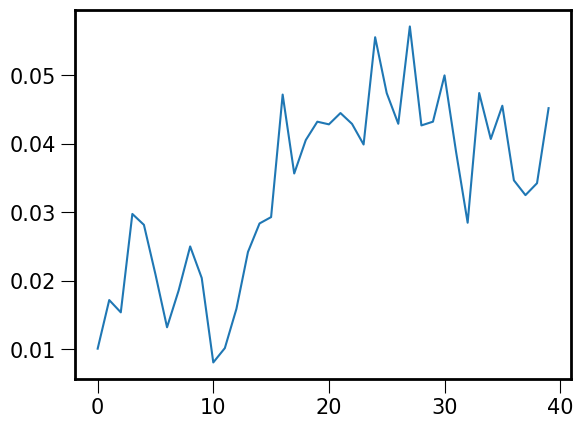

Epoch [500/5000], Loss: 4.521997266908482
Epoch [1000/5000], Loss: 0.6217720712085423
Epoch [1500/5000], Loss: 0.14788226230025187
Epoch [2000/5000], Loss: 0.08372421038057566
Epoch [2500/5000], Loss: 0.06771616123380213
Epoch [3000/5000], Loss: 0.06046823105846842
Epoch [3500/5000], Loss: 0.05759621406477183
Epoch [4000/5000], Loss: 0.05651386900522231
Epoch [4500/5000], Loss: 0.05607425114339372
Epoch [5000/5000], Loss: 0.05586885175986837
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 0.995 auc: nan
task 2 test accuracy: 0.995 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 1.000 

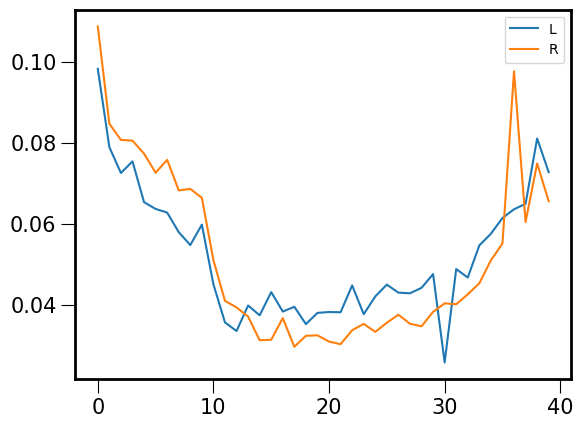

Epoch [500/5000], Loss: 9.849900206808398
Epoch [1000/5000], Loss: 2.16554626566606
Epoch [1500/5000], Loss: 0.20562421339065018
Epoch [2000/5000], Loss: 0.11073392015778791
Epoch [2500/5000], Loss: 0.0943216763262626
Epoch [3000/5000], Loss: 0.09080029114341656
Epoch [3500/5000], Loss: 0.08970474521247772
Epoch [4000/5000], Loss: 0.08926057954453147
Epoch [4500/5000], Loss: 0.08902445547325076
Epoch [5000/5000], Loss: 0.08854640012784214
task 0 train accuracy: 0.910 auc: 0.893
task 0 test accuracy: 0.910 auc: 0.893
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 0.932 auc: 0.952
task 2 test accuracy: 0.932 auc: 0.952
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 0

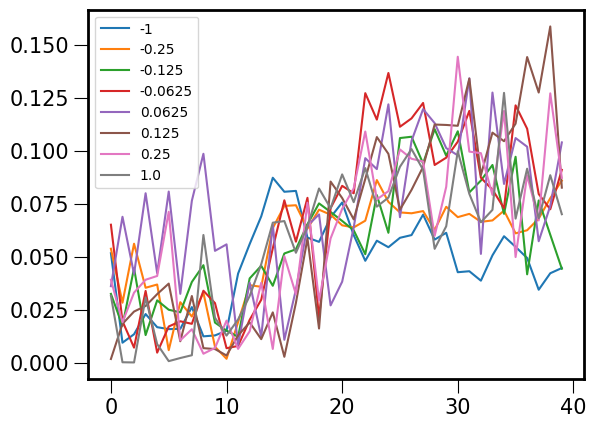

1/5 folds remaining ...
'c872ca65-8319-4901-856e-7dc507e2dd9c'
4/23 regions remaining ...
PO: 68 PIDs
pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 511 Kilosort units in region po


Compute spike count: 100%|████████████████████| 470/470 [00:10<00:00, 44.35it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 131 Kilosort units in region po


Compute spike count: 100%|███████████████████| 715/715 [00:03<00:00, 189.99it/s]


pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: bef05a5c-68c3-4513-87c7-b3151c88da8e
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 10 Kilosort units in region po


Compute spike count: 100%|█████████████████| 489/489 [00:00<00:00, 18156.84it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 37ac03f1-9831-4a30-90fc-a59e635b98bd
pid: 8b31b4bd-003e-4816-a3bf-2df4cc3558f8
number of trials found: 432
found 432 trials from 65.86 to 2896.15 sec.
found 103 Kilosort units in region po


Compute spike count: 100%|██████████████████| 432/432 [00:00<00:00, 1520.54it/s]


pulling data from ibl database ..
eid: be164a14-6e73-42c3-ab60-d29c48693c0f
pid: 77121d92-6dde-4243-ab54-0a99efa22e99
number of trials found: 376
found 376 trials from 79.72 to 2748.78 sec.
found 225 Kilosort units in region po


Compute spike count: 100%|███████████████████| 376/376 [00:00<00:00, 402.46it/s]


pulling data from ibl database ..
eid: 3bb54985-77b2-421d-9d1f-46185be51216
pid: 81950362-ed95-4662-997f-e119bbd594d1
number of trials found: 648
found 648 trials from 49.35 to 3147.13 sec.
found 10 Kilosort units in region po


Compute spike count: 100%|██████████████████| 648/648 [00:00<00:00, 2390.00it/s]


pulling data from ibl database ..
eid: 87ad026d-5b95-4022-8d59-c260870d830f
pid: 4f922a5b-5014-455d-8cd5-7caed78af615
number of trials found: 812
found 812 trials from 65.33 to 3887.55 sec.
found 32 Kilosort units in region po


Compute spike count: 100%|██████████████████| 812/812 [00:00<00:00, 4115.44it/s]


pulling data from ibl database ..
eid: 2038e95d-64d4-4ecb-83d0-1308d3c598f8
pid: 1a924329-65aa-465d-b201-c2dd898aebd0
number of trials found: 481
found 481 trials from 61.03 to 2940.03 sec.
found 70 Kilosort units in region po


Compute spike count: 100%|███████████████████| 481/481 [00:00<00:00, 945.49it/s]


pulling data from ibl database ..
eid: a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e
pid: 5135e93f-2f1f-4301-9532-b5ad62548c49
number of trials found: 364
found 364 trials from 76.32 to 3810.93 sec.
found 157 Kilosort units in region po


Compute spike count: 100%|██████████████████| 364/364 [00:00<00:00, 1245.65it/s]


pulling data from ibl database ..
eid: 8928f98a-b411-497e-aa4b-aa752434686d
pid: ad714133-1e03-4d3a-8427-33fc483daf1a
number of trials found: 583
found 583 trials from 112.34 to 3275.94 sec.
found 294 Kilosort units in region po


Compute spike count: 100%|███████████████████| 583/583 [00:03<00:00, 145.85it/s]


pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 39 good units in region po


Compute spike count: 100%|██████████████████| 470/470 [00:00<00:00, 1120.99it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 5 good units in region po


Compute spike count: 100%|██████████████████| 715/715 [00:00<00:00, 3256.55it/s]


pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: bef05a5c-68c3-4513-87c7-b3151c88da8e
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 0 good units in region po


Compute spike count: 100%|█████████████████| 489/489 [00:00<00:00, 86698.00it/s]


pulling data from ibl database ..
eid: 37ac03f1-9831-4a30-90fc-a59e635b98bd
pid: 8b31b4bd-003e-4816-a3bf-2df4cc3558f8
number of trials found: 432
found 432 trials from 65.86 to 2896.15 sec.
found 1 good units in region po


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 27302.63it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: be164a14-6e73-42c3-ab60-d29c48693c0f
pid: 77121d92-6dde-4243-ab54-0a99efa22e99
number of trials found: 376
found 376 trials from 79.72 to 2748.78 sec.
found 10 good units in region po


Compute spike count: 100%|█████████████████| 376/376 [00:00<00:00, 12607.79it/s]


pulling data from ibl database ..
eid: 3bb54985-77b2-421d-9d1f-46185be51216
pid: 81950362-ed95-4662-997f-e119bbd594d1
number of trials found: 648
found 648 trials from 49.35 to 3147.13 sec.
found 0 good units in region po


Compute spike count: 100%|█████████████████| 648/648 [00:00<00:00, 91989.07it/s]


pulling data from ibl database ..
eid: 87ad026d-5b95-4022-8d59-c260870d830f
pid: 4f922a5b-5014-455d-8cd5-7caed78af615
number of trials found: 812
found 812 trials from 65.33 to 3887.55 sec.
found 0 good units in region po


Compute spike count: 100%|█████████████████| 812/812 [00:00<00:00, 88459.39it/s]


pulling data from ibl database ..
eid: 2038e95d-64d4-4ecb-83d0-1308d3c598f8
pid: 1a924329-65aa-465d-b201-c2dd898aebd0
number of trials found: 481
found 481 trials from 61.03 to 2940.03 sec.
found 2 good units in region po


Compute spike count: 100%|█████████████████| 481/481 [00:00<00:00, 28656.29it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e
pid: 5135e93f-2f1f-4301-9532-b5ad62548c49
number of trials found: 364
found 364 trials from 76.32 to 3810.93 sec.
found 8 good units in region po


Compute spike count: 100%|█████████████████| 364/364 [00:00<00:00, 13699.62it/s]


pulling data from ibl database ..
eid: 8928f98a-b411-497e-aa4b-aa752434686d
pid: ad714133-1e03-4d3a-8427-33fc483daf1a
number of trials found: 583
found 583 trials from 112.34 to 3275.94 sec.
found 60 good units in region po


Compute spike count: 100%|███████████████████| 583/583 [00:00<00:00, 672.83it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 14.751032157852013
Epoch [1000/5000], Loss: 4.7968306014628
Epoch [1500/5000], Loss: 1.2888684451625227
Epoch [2000/5000], Loss: 0.734521126735643
Epoch [2500/5000], Loss: 0.674490967725116
Epoch [3000/5000], Loss: 0.6474129705079475
Epoch [3500/5000], Loss: 0.5886480418803774
Epoch [4000/5000], Loss: 0.527616685779838
Epoch [4500/5000], Loss: 0.4990684429319516
Epoch [5000/5000], Loss: 0.48852721262563426


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


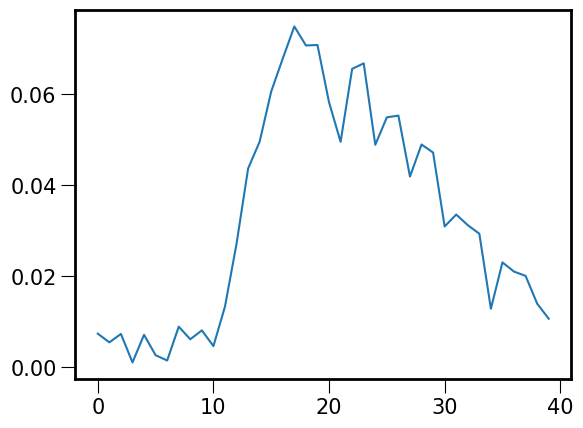

Epoch [500/5000], Loss: 9.447668061174838
Epoch [1000/5000], Loss: 1.6474905412639704
Epoch [1500/5000], Loss: 0.44060101723360956
Epoch [2000/5000], Loss: 0.22946961802148755
Epoch [2500/5000], Loss: 0.16999761498192964
Epoch [3000/5000], Loss: 0.15022494159204047
Epoch [3500/5000], Loss: 0.144896150670603
Epoch [4000/5000], Loss: 0.14494267855531065
Epoch [4500/5000], Loss: 0.145249836854528
Epoch [5000/5000], Loss: 0.14345541701203604
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 0.966 auc: nan
task 5 test accuracy: 0.966 auc: nan
task 6 train accuracy: 0.991 auc: nan
task 6 test accuracy: 0.991 auc: nan
task 7 train accuracy: 1.000 auc:

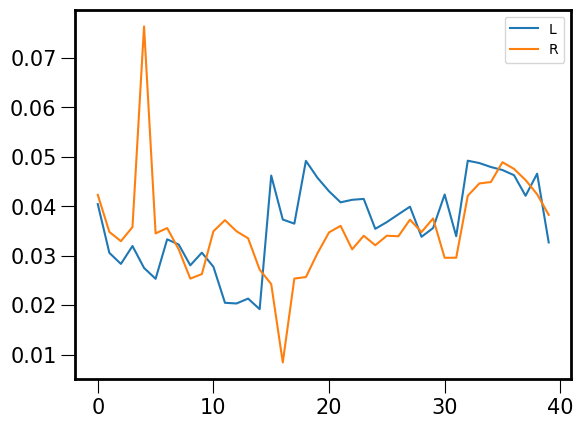

Epoch [500/5000], Loss: 12.933573835918603
Epoch [1000/5000], Loss: 2.7589726559315433
Epoch [1500/5000], Loss: 0.29335842293653835
Epoch [2000/5000], Loss: 0.15781736693581414
Epoch [2500/5000], Loss: 0.14581250547327418
Epoch [3000/5000], Loss: 0.14410466509218797
Epoch [3500/5000], Loss: 0.14434516752359117
Epoch [4000/5000], Loss: 0.145441965801327
Epoch [4500/5000], Loss: 0.14647286363641854
Epoch [5000/5000], Loss: 0.14707420354933096
task 0 train accuracy: 1.000 auc: 1.000
task 0 test accuracy: 1.000 auc: 1.000
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 0.933 auc: 0.746
task 2 test accuracy: 0.933 auc: 0.746
task 3 train accuracy: 0.980 auc: 1.000
task 3 test accuracy: 0.980 auc: 1.000
task 4 train accuracy: 1.000 auc: 1.000
task 4 test accuracy: 1.000 auc: 1.000
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 0.992 auc: 0.974
task 6 test accuracy: 0.992 auc: 0.974
task 7 tra

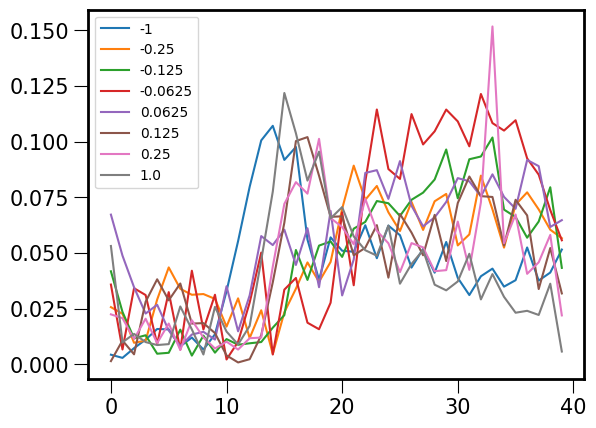

1/5 folds remaining ...
Epoch [500/5000], Loss: 14.150111267825025
Epoch [1000/5000], Loss: 3.730892406614592
Epoch [1500/5000], Loss: 1.0001169434000539
Epoch [2000/5000], Loss: 0.6786044880795026
Epoch [2500/5000], Loss: 0.6675276042925008
Epoch [3000/5000], Loss: 0.647999984202494
Epoch [3500/5000], Loss: 0.5434544714383527
Epoch [4000/5000], Loss: 0.4889649920327539
Epoch [4500/5000], Loss: 0.4756598429917502
Epoch [5000/5000], Loss: 0.47200622351952654
task 0 train accuracy: 0.910 auc: 0.976
task 0 test accuracy: 0.649 auc: 0.705
task 1 train accuracy: 0.881 auc: 0.944
task 1 test accuracy: 0.811 auc: 0.898
task 2 train accuracy: 0.581 auc: 0.624
task 2 test accuracy: 0.571 auc: 0.609
task 3 train accuracy: 0.838 auc: 0.925
task 3 test accuracy: 0.805 auc: 0.860
task 4 train accuracy: 0.937 auc: 0.991
task 4 test accuracy: 0.776 auc: 0.874
task 5 train accuracy: 0.724 auc: 0.801
task 5 test accuracy: 0.723 auc: 0.809
task 6 train accuracy: 0.639 auc: 0.695
task 6 test accuracy: 0.

Compute spike count: 100%|██████████████████| 470/470 [00:00<00:00, 5812.95it/s]


pulling data from ibl database ..
eid: 5ae68c54-2897-4d3a-8120-426150704385
pid: a8a59fc3-a658-4db4-b5e8-09f1e4df03fd
number of trials found: 631
found 631 trials from 17.05 to 4524.18 sec.
found 63 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 631/631 [00:00<00:00, 2424.79it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 139 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 715/715 [00:00<00:00, 1076.24it/s]


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 2 Kilosort units in region dg


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 35855.60it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: d0046384-16ea-4f69-bae9-165e8d0aeacf
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 113 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 358/358 [00:00<00:00, 2577.88it/s]


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: 4836a465-c691-4852-a0b1-dcd2b1ce38a1
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 53 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 358/358 [00:00<00:00, 9692.30it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: b72b22c2-6e9d-4604-9910-20c0e1a467d7
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 245 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 432/432 [00:00<00:00, 1470.97it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: 49c2ea3d-2b50-4e8a-b124-9e190960784e
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 232 Kilosort units in region dg


Compute spike count: 100%|███████████████████| 432/432 [00:01<00:00, 223.51it/s]


pulling data from ibl database ..
eid: 0cf6d255-8f2f-463e-84fb-c54bacb79f51
pid: c5b9e063-f640-4936-b851-f7602cb6659b
number of trials found: 614
found 614 trials from 52.49 to 2731.05 sec.
found 178 Kilosort units in region dg


Compute spike count: 100%|███████████████████| 614/614 [00:01<00:00, 595.34it/s]


pulling data from ibl database ..
eid: 7eeb8423-49e6-4d40-ab6f-703d17af231a
pid: 88e148d2-d554-42c2-9c41-cc6369f98c45
number of trials found: 553
found 553 trials from 54.37 to 2955.39 sec.
found 28 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 553/553 [00:00<00:00, 5130.28it/s]


pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 5 good units in region dg


Compute spike count: 100%|█████████████████| 470/470 [00:00<00:00, 21607.33it/s]


pulling data from ibl database ..
eid: 5ae68c54-2897-4d3a-8120-426150704385
pid: a8a59fc3-a658-4db4-b5e8-09f1e4df03fd
number of trials found: 631
found 631 trials from 17.05 to 4524.18 sec.
found 4 good units in region dg


Compute spike count: 100%|█████████████████| 631/631 [00:00<00:00, 18370.15it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 9 good units in region dg


Compute spike count: 100%|██████████████████| 715/715 [00:00<00:00, 9818.19it/s]


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 0 good units in region dg


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 82831.03it/s]


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: d0046384-16ea-4f69-bae9-165e8d0aeacf
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 6 good units in region dg


Compute spike count: 100%|█████████████████| 358/358 [00:00<00:00, 19158.67it/s]


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: 4836a465-c691-4852-a0b1-dcd2b1ce38a1
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 6 good units in region dg


Compute spike count: 100%|█████████████████| 358/358 [00:00<00:00, 25166.53it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: b72b22c2-6e9d-4604-9910-20c0e1a467d7
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 7 good units in region dg


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 25734.85it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: 49c2ea3d-2b50-4e8a-b124-9e190960784e
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 10 good units in region dg


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 10739.20it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 0cf6d255-8f2f-463e-84fb-c54bacb79f51
pid: c5b9e063-f640-4936-b851-f7602cb6659b
number of trials found: 614
found 614 trials from 52.49 to 2731.05 sec.
found 4 good units in region dg


Compute spike count: 100%|█████████████████| 614/614 [00:00<00:00, 11455.16it/s]


pulling data from ibl database ..
eid: 7eeb8423-49e6-4d40-ab6f-703d17af231a
pid: 88e148d2-d554-42c2-9c41-cc6369f98c45
number of trials found: 553
found 553 trials from 54.37 to 2955.39 sec.
found 2 good units in region dg


Compute spike count: 100%|█████████████████| 553/553 [00:00<00:00, 41653.05it/s]

Start extracting V from trials with different contrasts ...



/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


Epoch [500/5000], Loss: 16.683368010445374
Epoch [1000/5000], Loss: 4.846865843553802
Epoch [1500/5000], Loss: 1.47487992193627
Epoch [2000/5000], Loss: 0.7815260452043016
Epoch [2500/5000], Loss: 0.6712741209979702
Epoch [3000/5000], Loss: 0.6447047308811562
Epoch [3500/5000], Loss: 0.6144409321090843
Epoch [4000/5000], Loss: 0.5936339281754996
Epoch [4500/5000], Loss: 0.5828726801374088
Epoch [5000/5000], Loss: 0.5745813139165421


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


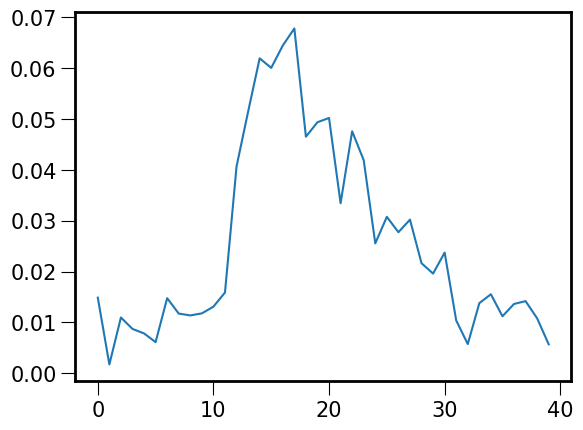

Epoch [500/5000], Loss: 7.380520497478677
Epoch [1000/5000], Loss: 1.377440463598263
Epoch [1500/5000], Loss: 0.362317274150194
Epoch [2000/5000], Loss: 0.12280130865739758
Epoch [2500/5000], Loss: 0.09403936413934626
Epoch [3000/5000], Loss: 0.08742078709025367
Epoch [3500/5000], Loss: 0.08578803587219773
Epoch [4000/5000], Loss: 0.08497866582773803
Epoch [4500/5000], Loss: 0.08459134779956429
Epoch [5000/5000], Loss: 0.0844848223399722
task 0 train accuracy: 0.996 auc: nan
task 0 test accuracy: 0.996 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 0.994 auc: nan
task 4 test accuracy: 0.994 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 1.000 auc:

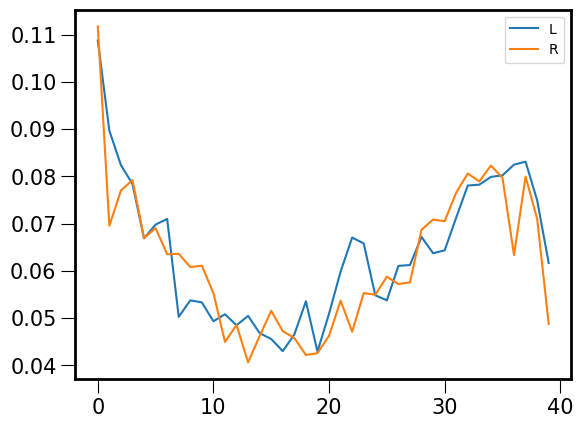

Epoch [500/5000], Loss: 8.296721351858594
Epoch [1000/5000], Loss: 1.7690078972443886
Epoch [1500/5000], Loss: 0.16943084644258824
Epoch [2000/5000], Loss: 0.1209776220537111
Epoch [2500/5000], Loss: 0.11702424304156007
Epoch [3000/5000], Loss: 0.11808313327904806
Epoch [3500/5000], Loss: 0.11882359941617805
Epoch [4000/5000], Loss: 0.11934057793545533
Epoch [4500/5000], Loss: 0.11989312359807973
Epoch [5000/5000], Loss: 0.12034917236193693
task 0 train accuracy: 0.952 auc: 0.783
task 0 test accuracy: 0.952 auc: 0.783
task 1 train accuracy: 0.945 auc: 0.949
task 1 test accuracy: 0.945 auc: 0.949
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy:

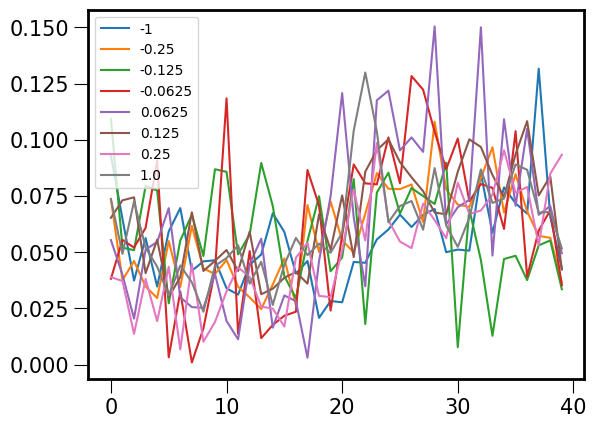

1/5 folds remaining ...
'92822789-608f-44a6-ad64-fe549402b2df'
6/23 regions remaining ...
NI: 6 PIDs
pulling data from ibl database ..
eid: c958919c-2e75-435d-845d-5b62190b520e
pid: cc72fdb7-92e8-47e6-9cea-94f27c0da2d8
number of trials found: 705
found 705 trials from 79.14 to 3939.10 sec.
found 36 Kilosort units in region ni


Compute spike count: 100%|██████████████████| 705/705 [00:00<00:00, 2171.94it/s]


pulling data from ibl database ..
eid: 15948667-747b-4702-9d53-354ac70e9119
pid: 4e6dfe08-cab0-4a05-903b-94283cb9f8e7
number of trials found: 375
found 375 trials from 75.70 to 2809.96 sec.
found 2 Kilosort units in region ni


Compute spike count: 100%|█████████████████| 375/375 [00:00<00:00, 35615.78it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 7cec9792-b8f9-4878-be7e-f08103dc0323
pid: e17db2b6-b778-4e2a-845c-c4d040b0c875
number of trials found: 542
found 542 trials from 307.48 to 2989.17 sec.
found 40 Kilosort units in region ni


Compute spike count: 100%|██████████████████| 542/542 [00:00<00:00, 2116.79it/s]


pulling data from ibl database ..
eid: 63f3dbc1-1a5f-44e5-98dd-ce25cd2b7871
pid: bbf6a51e-2999-4982-803f-8769db095dd2
number of trials found: 406
found 406 trials from 32.12 to 3101.00 sec.
found 68 Kilosort units in region ni


Compute spike count: 100%|██████████████████| 406/406 [00:00<00:00, 3342.60it/s]


pulling data from ibl database ..
eid: 5d6aa933-4b00-4e99-ae2d-5003657592e9
pid: 6728ddac-63ba-4e63-9884-395c7c16c7a3
number of trials found: 731
found 731 trials from 37.03 to 5162.20 sec.
found 8 Kilosort units in region ni


Compute spike count: 100%|██████████████████| 731/731 [00:00<00:00, 2863.95it/s]


pulling data from ibl database ..
eid: e012d3e3-fdbc-4661-9ffa-5fa284e4e706
pid: cde137a5-7a93-4968-ab61-5aedbd9ce3fb
number of trials found: 630
found 630 trials from 19.24 to 3323.51 sec.
found 14 Kilosort units in region ni


Compute spike count: 100%|██████████████████| 630/630 [00:00<00:00, 3111.55it/s]


pulling data from ibl database ..
eid: c958919c-2e75-435d-845d-5b62190b520e
pid: cc72fdb7-92e8-47e6-9cea-94f27c0da2d8
number of trials found: 705
found 705 trials from 79.14 to 3939.10 sec.
found 2 good units in region ni


Compute spike count: 100%|█████████████████| 705/705 [00:00<00:00, 45294.17it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 15948667-747b-4702-9d53-354ac70e9119
pid: 4e6dfe08-cab0-4a05-903b-94283cb9f8e7
number of trials found: 375
found 375 trials from 75.70 to 2809.96 sec.
found 0 good units in region ni


Compute spike count: 100%|█████████████████| 375/375 [00:00<00:00, 89632.09it/s]


pulling data from ibl database ..
eid: 7cec9792-b8f9-4878-be7e-f08103dc0323
pid: e17db2b6-b778-4e2a-845c-c4d040b0c875
number of trials found: 542
found 542 trials from 307.48 to 2989.17 sec.
found 1 good units in region ni


Compute spike count: 100%|█████████████████| 542/542 [00:00<00:00, 21469.64it/s]


pulling data from ibl database ..
eid: 63f3dbc1-1a5f-44e5-98dd-ce25cd2b7871
pid: bbf6a51e-2999-4982-803f-8769db095dd2
number of trials found: 406
found 406 trials from 32.12 to 3101.00 sec.
found 14 good units in region ni


Compute spike count: 100%|██████████████████| 406/406 [00:00<00:00, 8146.85it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 5d6aa933-4b00-4e99-ae2d-5003657592e9
pid: 6728ddac-63ba-4e63-9884-395c7c16c7a3
number of trials found: 731
found 731 trials from 37.03 to 5162.20 sec.
found 0 good units in region ni


Compute spike count: 100%|█████████████████| 731/731 [00:00<00:00, 87864.63it/s]


pulling data from ibl database ..
eid: e012d3e3-fdbc-4661-9ffa-5fa284e4e706
pid: cde137a5-7a93-4968-ab61-5aedbd9ce3fb
number of trials found: 630
found 630 trials from 19.24 to 3323.51 sec.
found 2 good units in region ni


Compute spike count: 100%|█████████████████| 630/630 [00:00<00:00, 20182.79it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 10.136355199198226
Epoch [1000/5000], Loss: 2.916806204124785
Epoch [1500/5000], Loss: 1.1508420861907358
Epoch [2000/5000], Loss: 0.708901669968064
Epoch [2500/5000], Loss: 0.5918121965885741
Epoch [3000/5000], Loss: 0.5592381218265703
Epoch [3500/5000], Loss: 0.5472373301633131
Epoch [4000/5000], Loss: 0.5430453696991946
Epoch [4500/5000], Loss: 0.5419297733394266
Epoch [5000/5000], Loss: 0.5415613633007934


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


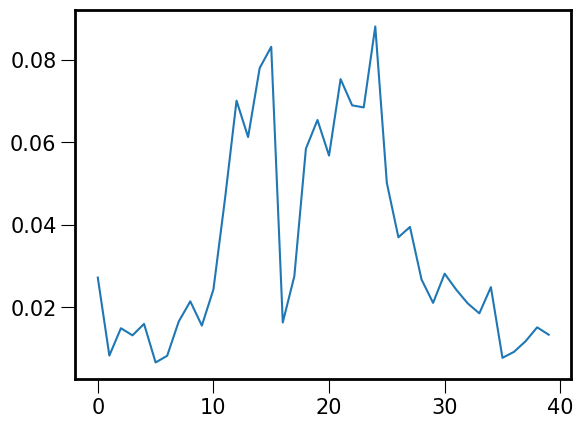

Epoch [500/5000], Loss: 7.6174560185464815
Epoch [1000/5000], Loss: 1.2719697258150635
Epoch [1500/5000], Loss: 0.2784824883785532
Epoch [2000/5000], Loss: 0.1446029248191662
Epoch [2500/5000], Loss: 0.10323963879137119
Epoch [3000/5000], Loss: 0.09179313992614535
Epoch [3500/5000], Loss: 0.08835666743625509
Epoch [4000/5000], Loss: 0.0875161306399803
Epoch [4500/5000], Loss: 0.0876462074894578
Epoch [5000/5000], Loss: 0.08793604396774615
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.990 auc: nan
task 3 test accuracy: 0.990 auc: nan
Epoch [500/5000], Loss: 3.6082980953769863
Epoch [1000/5000], Loss: 0.3705877804816387
Epoch [1500/5000], Loss: 0.14191547224820206
Epoch [2000/5000], Loss: 0.10924294125627629
Epoch [2500/5000], Loss: 0.1014705580090027
Epoch [3000/5000], Loss: 0.096379196

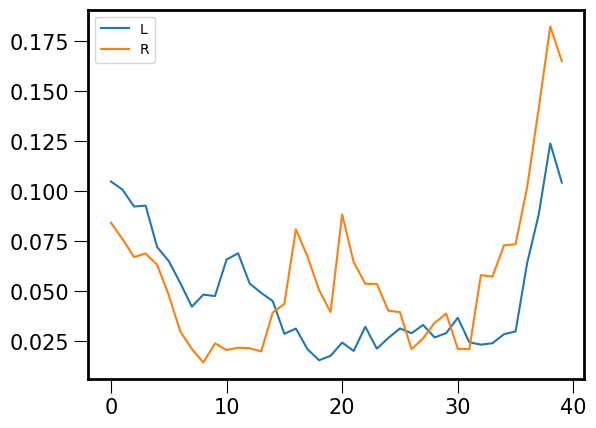

Epoch [500/5000], Loss: 3.046049549118807
Epoch [1000/5000], Loss: 0.49419173641551273
Epoch [1500/5000], Loss: 0.16294198265660267
Epoch [2000/5000], Loss: 0.13369262299306237
Epoch [2500/5000], Loss: 0.13478516969076093
Epoch [3000/5000], Loss: 0.1365884119016979
Epoch [3500/5000], Loss: 0.12959142308994004
Epoch [4000/5000], Loss: 0.12079340279683867
Epoch [4500/5000], Loss: 0.11631969733803549
Epoch [5000/5000], Loss: 0.11547073891336916
task 0 train accuracy: 0.957 auc: 1.000
task 0 test accuracy: 0.957 auc: 1.000
task 1 train accuracy: 0.978 auc: 0.994
task 1 test accuracy: 0.978 auc: 0.994
task 2 train accuracy: 1.000 auc: 1.000
task 2 test accuracy: 1.000 auc: 1.000
task 3 train accuracy: 0.985 auc: 0.992
task 3 test accuracy: 0.985 auc: 0.992
Epoch [500/5000], Loss: 8.420188423404378
Epoch [1000/5000], Loss: 1.2520192587126202
Epoch [1500/5000], Loss: 0.17085288677783236
Epoch [2000/5000], Loss: 0.11711236334945363
Epoch [2500/5000], Loss: 0.12026802081788346
Epoch [3000/5000]

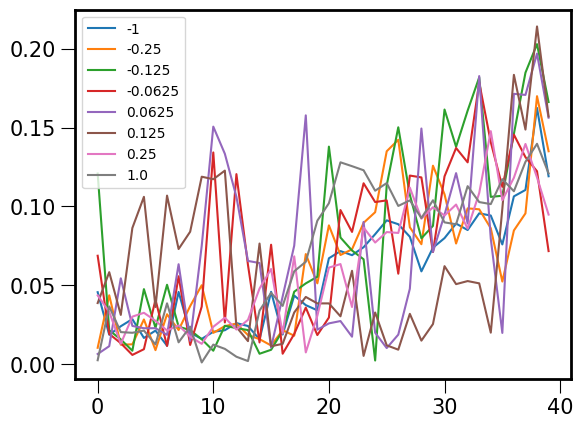

1/5 folds remaining ...
'4e6dfe08-cab0-4a05-903b-94283cb9f8e7'
7/23 regions remaining ...
PB: 28 PIDs
pulling data from ibl database ..
eid: a7eba2cf-427f-4df9-879b-e53e962eae18
pid: a759e857-fd8f-4653-a397-c48547230427
number of trials found: 680
found 680 trials from 14.51 to 3950.23 sec.
found 42 Kilosort units in region pb


Compute spike count: 100%|███████████████████| 680/680 [00:02<00:00, 268.64it/s]


pulling data from ibl database ..
eid: a1782f4f-86b0-480c-a7f2-3d8f1ab482ab
pid: 38e9e5b8-db29-4158-a09d-cc1de4a1365a
number of trials found: 650
found 650 trials from 13.07 to 3575.32 sec.
found 55 Kilosort units in region pb


Compute spike count: 100%|██████████████████| 650/650 [00:00<00:00, 1975.98it/s]


pulling data from ibl database ..
eid: 7dd27c2f-9544-448d-918d-be0f9837b0e0
pid: d3507787-60c8-4cea-a61e-0c708b4361d8
number of trials found: 465
found 465 trials from 23.59 to 3633.40 sec.
found 143 Kilosort units in region pb


Compute spike count: 100%|████████████████████| 465/465 [00:04<00:00, 93.53it/s]


pulling data from ibl database ..
eid: 1dbba733-24a4-4400-9436-53f1bd8428e8
pid: ec1e2af7-c107-4a18-ab05-cefb9174d516
number of trials found: 557
found 557 trials from 97.94 to 2721.38 sec.
found 17 Kilosort units in region pb


Compute spike count: 100%|██████████████████| 557/557 [00:00<00:00, 1780.61it/s]


pulling data from ibl database ..
eid: e6de6c35-1508-4471-b7c3-f12a5c7a6d39
pid: 7cb5128d-aaf5-4859-a236-527bff0f3c76
number of trials found: 471
found 471 trials from 93.68 to 2712.77 sec.
found 75 Kilosort units in region pb


Compute spike count: 100%|██████████████████| 471/471 [00:00<00:00, 1636.73it/s]


pulling data from ibl database ..
eid: 98e0074c-706a-40e5-bbb5-223f97585a99
pid: 0566938b-245d-4e5f-89ee-59d53a44f065
number of trials found: 657
found 657 trials from 113.30 to 2844.56 sec.
found 18 Kilosort units in region pb


Compute spike count: 100%|██████████████████| 657/657 [00:00<00:00, 1822.29it/s]


pulling data from ibl database ..
eid: c02e5155-8e8f-427e-873d-d61490bbb9c3
pid: e089d4d9-0a74-4ebc-951d-67098305e06b
number of trials found: 816
found 816 trials from 57.32 to 3466.49 sec.
found 28 Kilosort units in region pb


Compute spike count: 100%|██████████████████| 816/816 [00:00<00:00, 1388.05it/s]


pulling data from ibl database ..
eid: 1b9e349e-93f2-41cc-a4b5-b212d7ddc8df
pid: 1c4e2ebd-59da-4527-9700-b4b2dad6dfb2
number of trials found: 1006
found 1006 trials from 195.98 to 5274.35 sec.
found 23 Kilosort units in region pb


Compute spike count: 100%|█████████████████| 1006/1006 [00:03<00:00, 252.30it/s]


pulling data from ibl database ..
eid: 32d27583-56aa-4510-bc03-669036edad20
pid: 2e720cee-05cc-440e-a24b-13794b1ac01d
number of trials found: 682
found 682 trials from 28.94 to 3431.07 sec.
found 19 Kilosort units in region pb


Compute spike count: 100%|█████████████████| 682/682 [00:00<00:00, 10478.85it/s]


pulling data from ibl database ..
eid: 5bcafa14-71cb-42fa-8265-ce5cda1b89e0
pid: e4632651-5ba7-48a7-86db-5298b45a5bac
number of trials found: 368
found 368 trials from 32.50 to 3117.99 sec.
found 28 Kilosort units in region pb


Compute spike count: 100%|██████████████████| 368/368 [00:00<00:00, 4162.79it/s]


pulling data from ibl database ..
eid: a7eba2cf-427f-4df9-879b-e53e962eae18
pid: a759e857-fd8f-4653-a397-c48547230427
number of trials found: 680
found 680 trials from 14.51 to 3950.23 sec.
found 11 good units in region pb


Compute spike count: 100%|██████████████████| 680/680 [00:00<00:00, 1460.32it/s]


pulling data from ibl database ..
eid: a1782f4f-86b0-480c-a7f2-3d8f1ab482ab
pid: 38e9e5b8-db29-4158-a09d-cc1de4a1365a
number of trials found: 650
found 650 trials from 13.07 to 3575.32 sec.
found 1 good units in region pb


Compute spike count: 100%|█████████████████| 650/650 [00:00<00:00, 16628.43it/s]


pulling data from ibl database ..
eid: 7dd27c2f-9544-448d-918d-be0f9837b0e0
pid: d3507787-60c8-4cea-a61e-0c708b4361d8
number of trials found: 465
found 465 trials from 23.59 to 3633.40 sec.
found 12 good units in region pb


Compute spike count: 100%|██████████████████| 465/465 [00:00<00:00, 1366.50it/s]


pulling data from ibl database ..
eid: 1dbba733-24a4-4400-9436-53f1bd8428e8
pid: ec1e2af7-c107-4a18-ab05-cefb9174d516
number of trials found: 557
found 557 trials from 97.94 to 2721.38 sec.
found 0 good units in region pb


Compute spike count: 100%|█████████████████| 557/557 [00:00<00:00, 82267.32it/s]


pulling data from ibl database ..
eid: e6de6c35-1508-4471-b7c3-f12a5c7a6d39
pid: 7cb5128d-aaf5-4859-a236-527bff0f3c76
number of trials found: 471
found 471 trials from 93.68 to 2712.77 sec.
found 2 good units in region pb


Compute spike count: 100%|█████████████████| 471/471 [00:00<00:00, 31125.21it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 98e0074c-706a-40e5-bbb5-223f97585a99
pid: 0566938b-245d-4e5f-89ee-59d53a44f065
number of trials found: 657
found 657 trials from 113.30 to 2844.56 sec.
found 0 good units in region pb


Compute spike count: 100%|█████████████████| 657/657 [00:00<00:00, 92546.27it/s]


pulling data from ibl database ..
eid: c02e5155-8e8f-427e-873d-d61490bbb9c3
pid: e089d4d9-0a74-4ebc-951d-67098305e06b
number of trials found: 816
found 816 trials from 57.32 to 3466.49 sec.
found 0 good units in region pb


Compute spike count: 100%|█████████████████| 816/816 [00:00<00:00, 92571.46it/s]


pulling data from ibl database ..
eid: 1b9e349e-93f2-41cc-a4b5-b212d7ddc8df
pid: 1c4e2ebd-59da-4527-9700-b4b2dad6dfb2
number of trials found: 1006
found 1006 trials from 195.98 to 5274.35 sec.
found 1 good units in region pb


Compute spike count: 100%|████████████████| 1006/1006 [00:00<00:00, 2876.42it/s]


pulling data from ibl database ..
eid: 32d27583-56aa-4510-bc03-669036edad20
pid: 2e720cee-05cc-440e-a24b-13794b1ac01d
number of trials found: 682
found 682 trials from 28.94 to 3431.07 sec.
found 1 good units in region pb


Compute spike count: 100%|█████████████████| 682/682 [00:00<00:00, 78036.76it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 5bcafa14-71cb-42fa-8265-ce5cda1b89e0
pid: e4632651-5ba7-48a7-86db-5298b45a5bac
number of trials found: 368
found 368 trials from 32.50 to 3117.99 sec.
found 4 good units in region pb


Compute spike count: 100%|█████████████████| 368/368 [00:00<00:00, 15076.52it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 7.722020353084747
Epoch [1000/5000], Loss: 2.375890904779817
Epoch [1500/5000], Loss: 1.1497810729313698
Epoch [2000/5000], Loss: 0.7756904279444046
Epoch [2500/5000], Loss: 0.6569237457934947
Epoch [3000/5000], Loss: 0.613257635578997
Epoch [3500/5000], Loss: 0.5938982730857011
Epoch [4000/5000], Loss: 0.5828155003705207
Epoch [4500/5000], Loss: 0.5756410107867892
Epoch [5000/5000], Loss: 0.5719136341507154


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


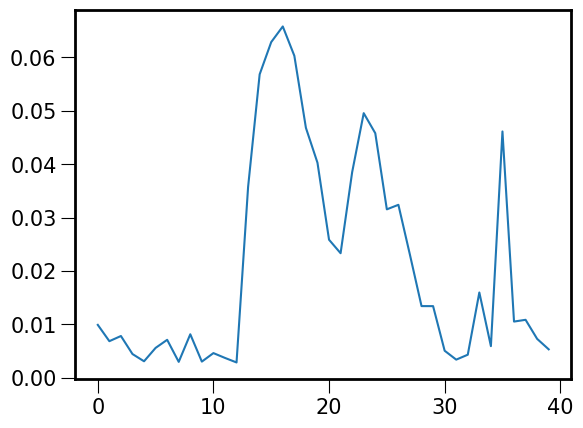

Epoch [500/5000], Loss: 7.187230772109305
Epoch [1000/5000], Loss: 1.5755366733024176
Epoch [1500/5000], Loss: 0.4711846565856275
Epoch [2000/5000], Loss: 0.2278057903147877
Epoch [2500/5000], Loss: 0.1663809052410917
Epoch [3000/5000], Loss: 0.14398543875227146
Epoch [3500/5000], Loss: 0.13357443240818573
Epoch [4000/5000], Loss: 0.12866049430893015
Epoch [4500/5000], Loss: 0.126311526935025
Epoch [5000/5000], Loss: 0.12517009552057906
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.992 auc: nan
task 3 test accuracy: 0.992 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 0.974 auc: nan
task 5 test accuracy: 0.974 auc: nan
task 6 train accuracy: 0.997 auc: nan
task 6 test accuracy: 0.997 auc: nan
task 7 train accuracy: 1.000 auc: 

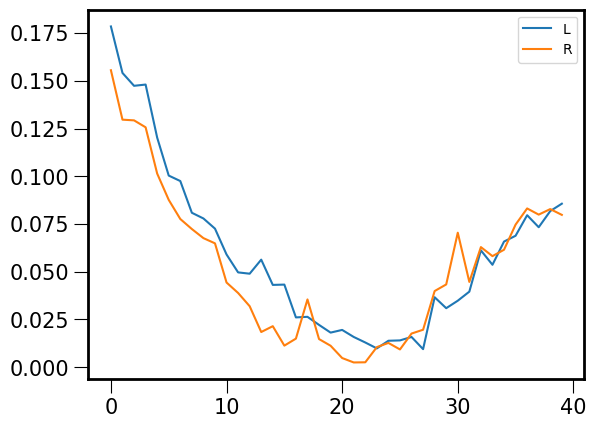

Epoch [500/5000], Loss: 5.370155828023451
Epoch [1000/5000], Loss: 1.2112031917024315
Epoch [1500/5000], Loss: 0.3086654464060068
Epoch [2000/5000], Loss: 0.19391967772328603
Epoch [2500/5000], Loss: 0.17806847809299126
Epoch [3000/5000], Loss: 0.16895255959398742
Epoch [3500/5000], Loss: 0.16200112729891827
Epoch [4000/5000], Loss: 0.15533998238683364
Epoch [4500/5000], Loss: 0.1489361446349077
Epoch [5000/5000], Loss: 0.1458628993800462
task 0 train accuracy: 0.978 auc: 1.000
task 0 test accuracy: 0.978 auc: 1.000
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 0.984 auc: 1.000
task 2 test accuracy: 0.984 auc: 1.000
task 3 train accuracy: 0.988 auc: 0.864
task 3 test accuracy: 0.988 auc: 0.864
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 0.986 auc: 0.899
task 5 test accuracy: 0.986 auc: 0.899
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train acc

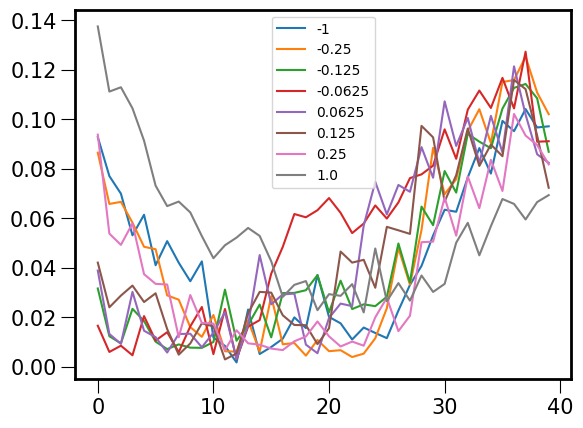

1/5 folds remaining ...
Epoch [500/5000], Loss: 9.404331462501666
Epoch [1000/5000], Loss: 2.9825281698798145
Epoch [1500/5000], Loss: 1.2395996126153066
Epoch [2000/5000], Loss: 0.7773919670022208
Epoch [2500/5000], Loss: 0.6711405663177086
Epoch [3000/5000], Loss: 0.6298130764134919
Epoch [3500/5000], Loss: 0.5989031610324387
Epoch [4000/5000], Loss: 0.5799116960894078
Epoch [4500/5000], Loss: 0.5706034863657466
Epoch [5000/5000], Loss: 0.5670096449527842
task 0 train accuracy: 0.660 auc: 0.694
task 0 test accuracy: 0.574 auc: 0.616
task 1 train accuracy: 0.688 auc: 0.806
task 1 test accuracy: 0.654 auc: 0.795
task 2 train accuracy: 0.882 auc: 0.956
task 2 test accuracy: 0.903 auc: 0.966
task 3 train accuracy: 0.703 auc: 0.755
task 3 test accuracy: 0.652 auc: 0.692
task 4 train accuracy: 0.902 auc: 0.965
task 4 test accuracy: 0.905 auc: 0.970
task 5 train accuracy: 0.773 auc: 0.829
task 5 test accuracy: 0.750 auc: 0.811
task 6 train accuracy: 0.781 auc: 0.875
task 6 test accuracy: 0.

Compute spike count: 100%|███████████████████| 518/518 [00:01<00:00, 469.09it/s]


pulling data from ibl database ..
eid: 36573e0b-ddd6-4504-94ec-9a23c877486c
pid: f72e60c3-3593-466a-afaf-91145c44fb2b
number of trials found: 453
found 453 trials from 77.15 to 2772.71 sec.
found 0 Kilosort units in region pag


Compute spike count: 100%|█████████████████| 453/453 [00:00<00:00, 81717.76it/s]


pulling data from ibl database ..
eid: 5437ec1f-6535-470c-80b8-4c8806ee085d
pid: b9faf068-fd1c-4568-8a1a-f503eed6f726
number of trials found: 458
found 458 trials from 70.85 to 2758.87 sec.
found 0 Kilosort units in region pag


Compute spike count: 100%|█████████████████| 458/458 [00:00<00:00, 79547.44it/s]


pulling data from ibl database ..
eid: fd03d365-91df-41e2-ad81-9e0e4b9f5c7b
pid: e033ef96-3590-4e52-bb01-6c6d75bab083
number of trials found: 521
found 521 trials from 60.82 to 2724.10 sec.
found 12 Kilosort units in region pag


Compute spike count: 100%|██████████████████| 521/521 [00:00<00:00, 1847.84it/s]


pulling data from ibl database ..
eid: c958919c-2e75-435d-845d-5b62190b520e
pid: cc72fdb7-92e8-47e6-9cea-94f27c0da2d8
number of trials found: 705
found 705 trials from 79.14 to 3939.10 sec.
found 57 Kilosort units in region pag


Compute spike count: 100%|██████████████████| 705/705 [00:00<00:00, 3133.65it/s]


pulling data from ibl database ..
eid: f56194bc-8215-4ae8-bc6a-89781ad8e050
pid: f0c390da-d8e3-4b5f-8df7-bd2f153ed01b
number of trials found: 612
found 612 trials from 175.19 to 3798.77 sec.
found 232 Kilosort units in region pag


Compute spike count: 100%|███████████████████| 612/612 [00:02<00:00, 271.25it/s]


pulling data from ibl database ..
eid: 28338153-4113-485b-835b-91cb96d984f2
pid: 697d9e03-edc6-430a-ae76-94628c510161
number of trials found: 780
found 780 trials from 86.95 to 4094.71 sec.
found 330 Kilosort units in region pag


Compute spike count: 100%|███████████████████| 780/780 [00:02<00:00, 276.92it/s]


pulling data from ibl database ..
eid: f819d499-8bf7-4da0-a431-15377a8319d5
pid: d4291925-ad00-47fe-baaf-3fdff0991e86
number of trials found: 384
found 384 trials from 146.45 to 3112.39 sec.
found 36 Kilosort units in region pag


Compute spike count: 100%|██████████████████| 384/384 [00:00<00:00, 3007.13it/s]


pulling data from ibl database ..
eid: 1b9e349e-93f2-41cc-a4b5-b212d7ddc8df
pid: 3c283107-7012-48fc-a6c2-ed096b23974f
number of trials found: 1006
found 1006 trials from 195.98 to 5274.35 sec.
found 33 Kilosort units in region pag


Compute spike count: 100%|████████████████| 1006/1006 [00:00<00:00, 1257.39it/s]


pulling data from ibl database ..
eid: eacc49a9-f3a1-49f1-b87f-0972f90ee837
pid: dac5defe-62b8-4cc0-96cb-b9f923957c7f
number of trials found: 719
found 719 trials from 132.71 to 3274.45 sec.
found 88 Kilosort units in region pag


Compute spike count: 100%|██████████████████| 719/719 [00:00<00:00, 1405.95it/s]


pulling data from ibl database ..
eid: 04749a70-ac63-477d-8392-d4d529184fab
pid: a44a9942-0667-4d49-9047-40d2256c9854
number of trials found: 518
found 518 trials from 60.47 to 3145.55 sec.
found 0 good units in region pag


Compute spike count: 100%|█████████████████| 518/518 [00:00<00:00, 85537.38it/s]


pulling data from ibl database ..
eid: 36573e0b-ddd6-4504-94ec-9a23c877486c
pid: f72e60c3-3593-466a-afaf-91145c44fb2b
number of trials found: 453
found 453 trials from 77.15 to 2772.71 sec.
found 0 good units in region pag


Compute spike count: 100%|█████████████████| 453/453 [00:00<00:00, 91058.17it/s]


pulling data from ibl database ..
eid: 5437ec1f-6535-470c-80b8-4c8806ee085d
pid: b9faf068-fd1c-4568-8a1a-f503eed6f726
number of trials found: 458
found 458 trials from 70.85 to 2758.87 sec.
found 0 good units in region pag


Compute spike count: 100%|█████████████████| 458/458 [00:00<00:00, 88374.26it/s]


pulling data from ibl database ..
eid: fd03d365-91df-41e2-ad81-9e0e4b9f5c7b
pid: e033ef96-3590-4e52-bb01-6c6d75bab083
number of trials found: 521
found 521 trials from 60.82 to 2724.10 sec.
found 0 good units in region pag


Compute spike count: 100%|█████████████████| 521/521 [00:00<00:00, 85971.85it/s]


pulling data from ibl database ..
eid: c958919c-2e75-435d-845d-5b62190b520e
pid: cc72fdb7-92e8-47e6-9cea-94f27c0da2d8
number of trials found: 705
found 705 trials from 79.14 to 3939.10 sec.
found 1 good units in region pag


Compute spike count: 100%|█████████████████| 705/705 [00:00<00:00, 31922.53it/s]


pulling data from ibl database ..
eid: f56194bc-8215-4ae8-bc6a-89781ad8e050
pid: f0c390da-d8e3-4b5f-8df7-bd2f153ed01b
number of trials found: 612
found 612 trials from 175.19 to 3798.77 sec.
found 6 good units in region pag


Compute spike count: 100%|█████████████████| 612/612 [00:00<00:00, 10977.27it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 28338153-4113-485b-835b-91cb96d984f2
pid: 697d9e03-edc6-430a-ae76-94628c510161
number of trials found: 780
found 780 trials from 86.95 to 4094.71 sec.
found 23 good units in region pag


Compute spike count: 100%|██████████████████| 780/780 [00:00<00:00, 3631.94it/s]


pulling data from ibl database ..
eid: f819d499-8bf7-4da0-a431-15377a8319d5
pid: d4291925-ad00-47fe-baaf-3fdff0991e86
number of trials found: 384
found 384 trials from 146.45 to 3112.39 sec.
found 5 good units in region pag


Compute spike count: 100%|█████████████████| 384/384 [00:00<00:00, 12934.36it/s]


pulling data from ibl database ..
eid: 1b9e349e-93f2-41cc-a4b5-b212d7ddc8df
pid: 3c283107-7012-48fc-a6c2-ed096b23974f
number of trials found: 1006
found 1006 trials from 195.98 to 5274.35 sec.
found 2 good units in region pag


Compute spike count: 100%|███████████████| 1006/1006 [00:00<00:00, 11630.71it/s]


pulling data from ibl database ..
eid: eacc49a9-f3a1-49f1-b87f-0972f90ee837
pid: dac5defe-62b8-4cc0-96cb-b9f923957c7f
number of trials found: 719
found 719 trials from 132.71 to 3274.45 sec.
found 14 good units in region pag


Compute spike count: 100%|██████████████████| 719/719 [00:00<00:00, 3441.37it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 13.454781736693493
Epoch [1000/5000], Loss: 4.269195050018885
Epoch [1500/5000], Loss: 1.404151778032894
Epoch [2000/5000], Loss: 0.7691419923846159
Epoch [2500/5000], Loss: 0.6665664462773654
Epoch [3000/5000], Loss: 0.6395545747469558
Epoch [3500/5000], Loss: 0.5963665266113859
Epoch [4000/5000], Loss: 0.5563031211899216
Epoch [4500/5000], Loss: 0.5332640602639646
Epoch [5000/5000], Loss: 0.5224291801988478


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


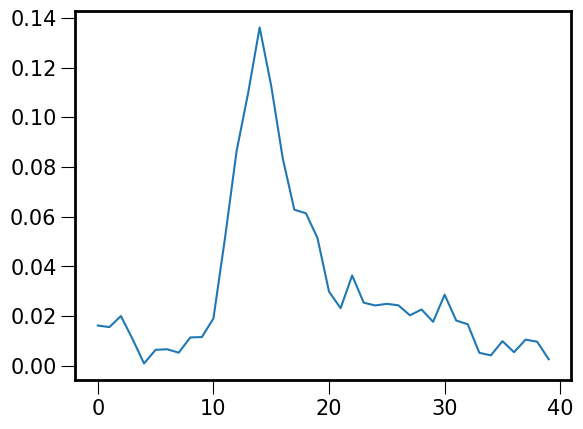

Epoch [500/5000], Loss: 10.503535077764273
Epoch [1000/5000], Loss: 1.1040546714795556
Epoch [1500/5000], Loss: 0.18332090784885163
Epoch [2000/5000], Loss: 0.1091768343736038
Epoch [2500/5000], Loss: 0.10446587659717738
Epoch [3000/5000], Loss: 0.08689000328610078
Epoch [3500/5000], Loss: 0.08634399021169556
Epoch [4000/5000], Loss: 0.08533676778898741
Epoch [4500/5000], Loss: 0.08429838860581138
Epoch [5000/5000], Loss: 0.08355691766261057
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 0.961 auc: nan
task 1 test accuracy: 0.961 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 0.998 auc: nan
task 4 test accuracy: 0.998 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 1.000 

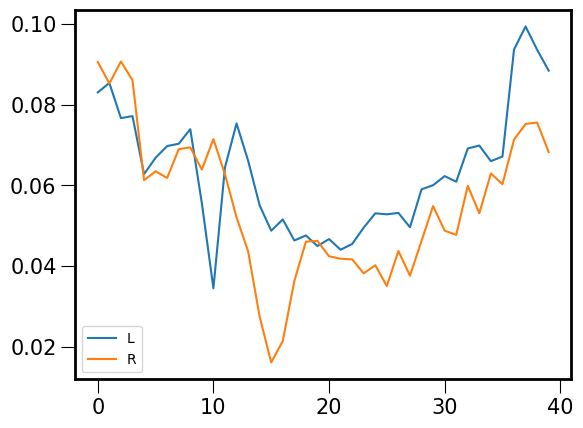

Epoch [500/5000], Loss: 7.005753395505984
Epoch [1000/5000], Loss: 1.582983652829876
Epoch [1500/5000], Loss: 0.2339563028625766
Epoch [2000/5000], Loss: 0.16992909845281587
Epoch [2500/5000], Loss: 0.14611291345883973
Epoch [3000/5000], Loss: 0.12402184147201525
Epoch [3500/5000], Loss: 0.11695443841834155
Epoch [4000/5000], Loss: 0.11670787447713117
Epoch [4500/5000], Loss: 0.1178158307345405
Epoch [5000/5000], Loss: 0.11869297225083254
task 0 train accuracy: 0.981 auc: 1.000
task 0 test accuracy: 0.981 auc: 1.000
task 1 train accuracy: 0.985 auc: 1.000
task 1 test accuracy: 0.985 auc: 1.000
task 2 train accuracy: 0.936 auc: 0.956
task 2 test accuracy: 0.936 auc: 0.956
task 3 train accuracy: 1.000 auc: 1.000
task 3 test accuracy: 1.000 auc: 1.000
task 4 train accuracy: 0.970 auc: 1.000
task 4 test accuracy: 0.970 auc: 1.000
task 5 train accuracy: 0.956 auc: 0.977
task 5 test accuracy: 0.956 auc: 0.977
task 6 train accuracy: 0.971 auc: 0.987
task 6 test accuracy: 0.971 auc: 0.987
task

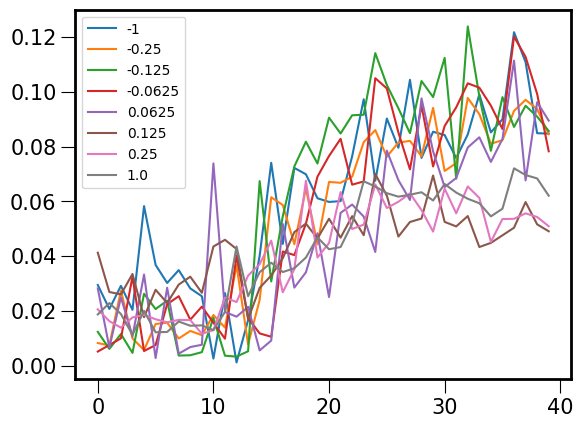

1/5 folds remaining ...
'f72e60c3-3593-466a-afaf-91145c44fb2b'
9/23 regions remaining ...
SCm: 78 PIDs
pulling data from ibl database ..
eid: e6594a5b-552c-421a-b376-1a1baa9dc4fd
pid: 9b5fec96-9f19-4ddf-ba1c-3175e15245e9
number of trials found: 353
found 353 trials from 66.19 to 3273.68 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 353/353 [00:00<00:00, 90125.96it/s]


pulling data from ibl database ..
eid: 35eeb752-8f4f-4040-9714-ba0f5b7ccdfe
pid: 069c2674-80b0-44b4-a3d9-28337512967f
number of trials found: 659
found 659 trials from 14.35 to 3534.60 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 659/659 [00:00<00:00, 92650.63it/s]


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 81497.31it/s]


pulling data from ibl database ..
eid: 98e0074c-706a-40e5-bbb5-223f97585a99
pid: 47403ac7-6635-4477-9477-18ff605ff5d4
number of trials found: 657
found 657 trials from 113.30 to 2844.56 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 657/657 [00:00<00:00, 93857.55it/s]


pulling data from ibl database ..
eid: 6ab9d98c-b1e9-4574-b8fe-b9eec88097e0
pid: e4ce2e94-6fb9-4afe-acbf-6f5a3498602e
number of trials found: 756
found 756 trials from 78.70 to 3335.25 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 756/756 [00:00<00:00, 86669.60it/s]


pulling data from ibl database ..
eid: 7eeb8423-49e6-4d40-ab6f-703d17af231a
pid: 88e148d2-d554-42c2-9c41-cc6369f98c45
number of trials found: 553
found 553 trials from 54.37 to 2955.39 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 553/553 [00:00<00:00, 86627.46it/s]


pulling data from ibl database ..
eid: 36573e0b-ddd6-4504-94ec-9a23c877486c
pid: f72e60c3-3593-466a-afaf-91145c44fb2b
number of trials found: 453
found 453 trials from 77.15 to 2772.71 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 453/453 [00:00<00:00, 91093.09it/s]


pulling data from ibl database ..
eid: 14127fdb-2e66-4823-b124-f49c128ba94d
pid: 0a45a464-a909-4b7c-a3e0-cd6cfb4262e4
number of trials found: 563
found 563 trials from 74.94 to 3699.00 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 563/563 [00:00<00:00, 87705.88it/s]


pulling data from ibl database ..
eid: 62ff920c-2fdd-4feb-9d9f-0d66f2e595a1
pid: 31258665-fbe8-4599-9c5f-dbc0eeee9c51
number of trials found: 546
found 546 trials from 75.28 to 2748.05 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 546/546 [00:00<00:00, 88970.08it/s]


pulling data from ibl database ..
eid: fd03d365-91df-41e2-ad81-9e0e4b9f5c7b
pid: e033ef96-3590-4e52-bb01-6c6d75bab083
number of trials found: 521
found 521 trials from 60.82 to 2724.10 sec.
found 0 Kilosort units in region scm


Compute spike count: 100%|█████████████████| 521/521 [00:00<00:00, 86832.73it/s]


pulling data from ibl database ..
eid: e6594a5b-552c-421a-b376-1a1baa9dc4fd
pid: 9b5fec96-9f19-4ddf-ba1c-3175e15245e9
number of trials found: 353
found 353 trials from 66.19 to 3273.68 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 353/353 [00:00<00:00, 50209.89it/s]


pulling data from ibl database ..
eid: 35eeb752-8f4f-4040-9714-ba0f5b7ccdfe
pid: 069c2674-80b0-44b4-a3d9-28337512967f
number of trials found: 659
found 659 trials from 14.35 to 3534.60 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 659/659 [00:00<00:00, 87386.86it/s]


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 84291.05it/s]


pulling data from ibl database ..
eid: 98e0074c-706a-40e5-bbb5-223f97585a99
pid: 47403ac7-6635-4477-9477-18ff605ff5d4
number of trials found: 657
found 657 trials from 113.30 to 2844.56 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 657/657 [00:00<00:00, 88313.87it/s]


pulling data from ibl database ..
eid: 6ab9d98c-b1e9-4574-b8fe-b9eec88097e0
pid: e4ce2e94-6fb9-4afe-acbf-6f5a3498602e
number of trials found: 756
found 756 trials from 78.70 to 3335.25 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 756/756 [00:00<00:00, 92537.61it/s]


pulling data from ibl database ..
eid: 7eeb8423-49e6-4d40-ab6f-703d17af231a
pid: 88e148d2-d554-42c2-9c41-cc6369f98c45
number of trials found: 553
found 553 trials from 54.37 to 2955.39 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 553/553 [00:00<00:00, 87937.90it/s]


pulling data from ibl database ..
eid: 36573e0b-ddd6-4504-94ec-9a23c877486c
pid: f72e60c3-3593-466a-afaf-91145c44fb2b
number of trials found: 453
found 453 trials from 77.15 to 2772.71 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 453/453 [00:00<00:00, 93110.84it/s]


pulling data from ibl database ..
eid: 14127fdb-2e66-4823-b124-f49c128ba94d
pid: 0a45a464-a909-4b7c-a3e0-cd6cfb4262e4
number of trials found: 563
found 563 trials from 74.94 to 3699.00 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 563/563 [00:00<00:00, 89025.19it/s]


pulling data from ibl database ..
eid: 62ff920c-2fdd-4feb-9d9f-0d66f2e595a1
pid: 31258665-fbe8-4599-9c5f-dbc0eeee9c51
number of trials found: 546
found 546 trials from 75.28 to 2748.05 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 546/546 [00:00<00:00, 89460.13it/s]


pulling data from ibl database ..
eid: fd03d365-91df-41e2-ad81-9e0e4b9f5c7b
pid: e033ef96-3590-4e52-bb01-6c6d75bab083
number of trials found: 521
found 521 trials from 60.82 to 2724.10 sec.
found 0 good units in region scm


Compute spike count: 100%|█████████████████| 521/521 [00:00<00:00, 91489.74it/s]


Start extracting V from trials with different contrasts ...
element 0 of tensors does not require grad and does not have a grad_fn
10/23 regions remaining ...
SNr: 22 PIDs
pulling data from ibl database ..
eid: de905562-31c6-4c31-9ece-3ee87b97eab4
pid: 6a7544a8-d3d4-44a1-a9c6-7f4d460feaac
number of trials found: 350
found 350 trials from 86.10 to 2662.23 sec.
found 224 Kilosort units in region snr


Compute spike count: 100%|██████████████████| 350/350 [00:00<00:00, 1072.02it/s]


pulling data from ibl database ..
eid: 4e560423-5caf-4cda-8511-d1ab4cd2bf7d
pid: 703f2cd2-377a-48ec-979a-135863169671
number of trials found: 505
found 505 trials from 84.96 to 3099.80 sec.
found 50 Kilosort units in region snr


Compute spike count: 100%|███████████████████| 505/505 [00:01<00:00, 371.10it/s]


pulling data from ibl database ..
eid: c8e11fd8-d130-4f06-abba-9aa20240ce7c
pid: 623bb859-eb7c-4739-ba18-28ecad1d9fbb
number of trials found: 559
found 559 trials from 67.88 to 3055.18 sec.
found 72 Kilosort units in region snr


Compute spike count: 100%|███████████████████| 559/559 [00:02<00:00, 276.29it/s]


pulling data from ibl database ..
eid: d901aff5-2250-467a-b4a1-0cb9729df9e2
pid: 96c816ad-9a48-46a4-8a84-9a73cc153d69
number of trials found: 402
found 402 trials from 118.41 to 2485.68 sec.
found 33 Kilosort units in region snr


Compute spike count: 100%|██████████████████| 402/402 [00:00<00:00, 1053.91it/s]


pulling data from ibl database ..
eid: 8a3a0197-b40a-449f-be55-c00b23253bbf
pid: f9d8aacd-b2a0-49f2-bd71-c2f5aadcfdd1
number of trials found: 340
found 340 trials from 24.71 to 3696.82 sec.
found 14 Kilosort units in region snr


Compute spike count: 100%|██████████████████| 340/340 [00:00<00:00, 4509.56it/s]


pulling data from ibl database ..
eid: f27e6cd6-cdd3-4524-b8e3-8146046e2a7d
pid: e8901184-9f60-4309-bee5-c3c95030550a
number of trials found: 351
found 351 trials from 91.93 to 2537.79 sec.
found 28 Kilosort units in region snr


Compute spike count: 100%|██████████████████| 351/351 [00:00<00:00, 2522.52it/s]


pulling data from ibl database ..
eid: 68775ca0-b056-48d5-b6ae-a4c2a76ae48f
pid: a6bcfe32-69ce-414f-80bc-495d1b4906af
number of trials found: 668
found 668 trials from 68.16 to 3494.80 sec.
found 35 Kilosort units in region snr


Compute spike count: 100%|█████████████████| 668/668 [00:00<00:00, 24929.89it/s]


pulling data from ibl database ..
eid: 51e53aff-1d5d-4182-a684-aba783d50ae5
pid: 18be19f9-6ca5-4fc8-9220-ba43c3e75905
number of trials found: 450
found 450 trials from 20.56 to 2612.19 sec.
found 47 Kilosort units in region snr


Compute spike count: 100%|███████████████████| 450/450 [00:02<00:00, 218.74it/s]


pulling data from ibl database ..
eid: 1a507308-c63a-4e02-8f32-3239a07dc578
pid: 834fca72-0b69-44e4-b77e-95a61290b50d
number of trials found: 651
found 651 trials from 31.50 to 4021.59 sec.
found 42 Kilosort units in region snr


Compute spike count: 100%|██████████████████| 651/651 [00:00<00:00, 1633.61it/s]


pulling data from ibl database ..
eid: 22e04698-b974-4805-b241-3b547dbf37bf
pid: 0143d3fe-79c2-4922-8332-62c3e4e0ba85
number of trials found: 453
found 453 trials from 102.73 to 2577.27 sec.
found 12 Kilosort units in region snr


Compute spike count: 100%|██████████████████| 453/453 [00:00<00:00, 3893.01it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: de905562-31c6-4c31-9ece-3ee87b97eab4
pid: 6a7544a8-d3d4-44a1-a9c6-7f4d460feaac
number of trials found: 350
found 350 trials from 86.10 to 2662.23 sec.
found 6 good units in region snr


Compute spike count: 100%|██████████████████| 350/350 [00:00<00:00, 3113.11it/s]


pulling data from ibl database ..
eid: 4e560423-5caf-4cda-8511-d1ab4cd2bf7d
pid: 703f2cd2-377a-48ec-979a-135863169671
number of trials found: 505
found 505 trials from 84.96 to 3099.80 sec.
found 0 good units in region snr


Compute spike count: 100%|█████████████████| 505/505 [00:00<00:00, 86092.08it/s]


pulling data from ibl database ..
eid: c8e11fd8-d130-4f06-abba-9aa20240ce7c
pid: 623bb859-eb7c-4739-ba18-28ecad1d9fbb
number of trials found: 559
found 559 trials from 67.88 to 3055.18 sec.
found 1 good units in region snr


Compute spike count: 100%|█████████████████| 559/559 [00:00<00:00, 88969.60it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: d901aff5-2250-467a-b4a1-0cb9729df9e2
pid: 96c816ad-9a48-46a4-8a84-9a73cc153d69
number of trials found: 402
found 402 trials from 118.41 to 2485.68 sec.
found 1 good units in region snr


Compute spike count: 100%|██████████████████| 402/402 [00:00<00:00, 4632.30it/s]


pulling data from ibl database ..
eid: 8a3a0197-b40a-449f-be55-c00b23253bbf
pid: f9d8aacd-b2a0-49f2-bd71-c2f5aadcfdd1
number of trials found: 340
found 340 trials from 24.71 to 3696.82 sec.
found 0 good units in region snr


Compute spike count: 100%|█████████████████| 340/340 [00:00<00:00, 86902.09it/s]


pulling data from ibl database ..
eid: f27e6cd6-cdd3-4524-b8e3-8146046e2a7d
pid: e8901184-9f60-4309-bee5-c3c95030550a
number of trials found: 351
found 351 trials from 91.93 to 2537.79 sec.
found 4 good units in region snr


Compute spike count: 100%|█████████████████| 351/351 [00:00<00:00, 10509.11it/s]


pulling data from ibl database ..
eid: 68775ca0-b056-48d5-b6ae-a4c2a76ae48f
pid: a6bcfe32-69ce-414f-80bc-495d1b4906af
number of trials found: 668
found 668 trials from 68.16 to 3494.80 sec.
found 3 good units in region snr


Compute spike count: 100%|█████████████████| 668/668 [00:00<00:00, 81646.90it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 51e53aff-1d5d-4182-a684-aba783d50ae5
pid: 18be19f9-6ca5-4fc8-9220-ba43c3e75905
number of trials found: 450
found 450 trials from 20.56 to 2612.19 sec.
found 13 good units in region snr


Compute spike count: 100%|███████████████████| 450/450 [00:00<00:00, 750.27it/s]


pulling data from ibl database ..
eid: 1a507308-c63a-4e02-8f32-3239a07dc578
pid: 834fca72-0b69-44e4-b77e-95a61290b50d
number of trials found: 651
found 651 trials from 31.50 to 4021.59 sec.
found 1 good units in region snr


Compute spike count: 100%|█████████████████| 651/651 [00:00<00:00, 27159.07it/s]


pulling data from ibl database ..
eid: 22e04698-b974-4805-b241-3b547dbf37bf
pid: 0143d3fe-79c2-4922-8332-62c3e4e0ba85
number of trials found: 453
found 453 trials from 102.73 to 2577.27 sec.
found 2 good units in region snr


Compute spike count: 100%|█████████████████| 453/453 [00:00<00:00, 27331.73it/s]

Start extracting V from trials with different contrasts ...



/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


Epoch [500/5000], Loss: 7.189838212707865
Epoch [1000/5000], Loss: 2.176198991025063
Epoch [1500/5000], Loss: 0.9039085266524983
Epoch [2000/5000], Loss: 0.6811333609917961
Epoch [2500/5000], Loss: 0.613830310220213
Epoch [3000/5000], Loss: 0.5434543418921042
Epoch [3500/5000], Loss: 0.512935050952904
Epoch [4000/5000], Loss: 0.49689951955534317
Epoch [4500/5000], Loss: 0.4884643285982612
Epoch [5000/5000], Loss: 0.4853031470333632


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


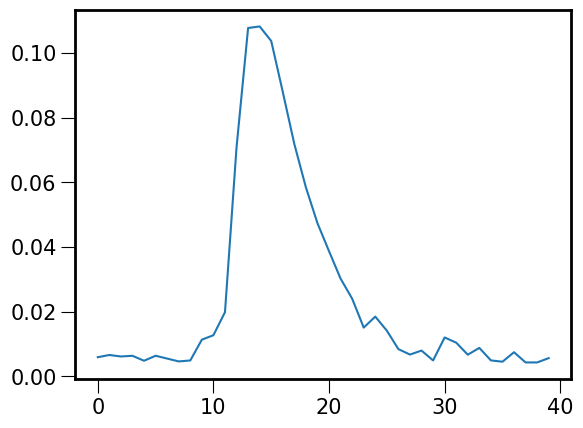

Epoch [500/5000], Loss: 5.926760287411753
Epoch [1000/5000], Loss: 1.3052309279417966
Epoch [1500/5000], Loss: 0.4149243681966744
Epoch [2000/5000], Loss: 0.19692805891403328
Epoch [2500/5000], Loss: 0.15962041778651298
Epoch [3000/5000], Loss: 0.14494042584581143
Epoch [3500/5000], Loss: 0.13544430080734574
Epoch [4000/5000], Loss: 0.12942410504924767
Epoch [4500/5000], Loss: 0.127698074467225
Epoch [5000/5000], Loss: 0.12778718984236412
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 0.982 auc: nan
task 4 test accuracy: 0.982 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 0.867 auc: nan
task 6 test accuracy: 0.867 auc: nan
task 7 train accuracy: 1.000 auc

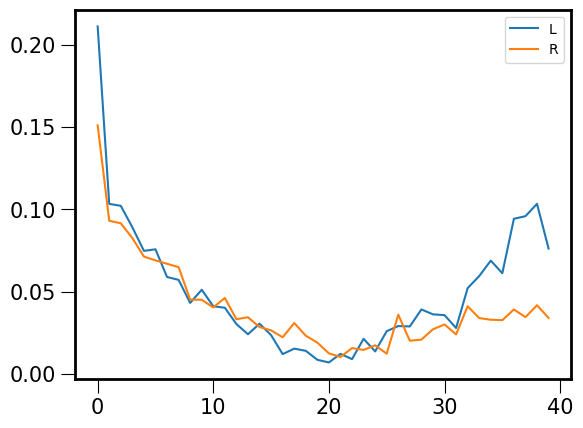

Epoch [500/5000], Loss: 5.5648977031598665
Epoch [1000/5000], Loss: 1.0548702357371176
Epoch [1500/5000], Loss: 0.29967418532110807
Epoch [2000/5000], Loss: 0.16724132186605667
Epoch [2500/5000], Loss: 0.15157776784244803
Epoch [3000/5000], Loss: 0.15769674921960036
Epoch [3500/5000], Loss: 0.15610464099783042
Epoch [4000/5000], Loss: 0.1506615809450647
Epoch [4500/5000], Loss: 0.14973059748566236
Epoch [5000/5000], Loss: 0.1499900300077611
task 0 train accuracy: 0.944 auc: 1.000
task 0 test accuracy: 0.944 auc: 1.000
task 1 train accuracy: 0.986 auc: 1.000
task 1 test accuracy: 0.986 auc: 1.000
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.930 auc: 1.000
task 3 test accuracy: 0.930 auc: 1.000
task 4 train accuracy: 0.906 auc: nan
task 4 test accuracy: 0.906 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accur

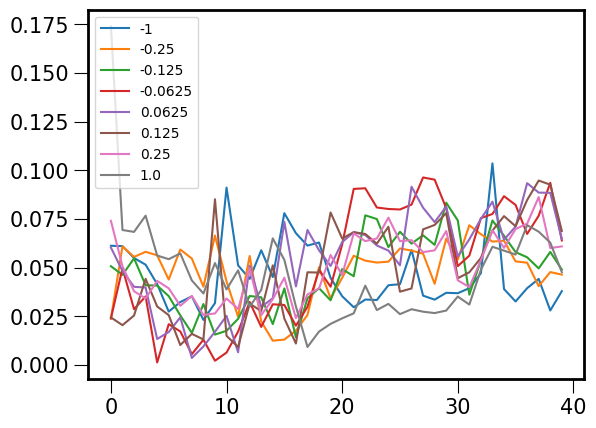

1/5 folds remaining ...
Epoch [500/5000], Loss: 6.639030881869891
Epoch [1000/5000], Loss: 2.108560077963797
Epoch [1500/5000], Loss: 1.023651508571659
Epoch [2000/5000], Loss: 0.6704942867291098
Epoch [2500/5000], Loss: 0.564896218417492
Epoch [3000/5000], Loss: 0.5180365146091226
Epoch [3500/5000], Loss: 0.4986724627229725
Epoch [4000/5000], Loss: 0.4915746591274587
Epoch [4500/5000], Loss: 0.48837689458076045
Epoch [5000/5000], Loss: 0.4861384679341141
task 0 train accuracy: 0.846 auc: 0.916
task 0 test accuracy: 0.829 auc: 0.900
task 1 train accuracy: 0.866 auc: 0.945
task 1 test accuracy: 0.802 auc: 0.890
task 2 train accuracy: 0.906 auc: 0.965
task 2 test accuracy: 0.911 auc: 0.951
task 3 train accuracy: 0.910 auc: 0.959
task 3 test accuracy: 0.938 auc: 0.975
task 4 train accuracy: 0.665 auc: 0.733
task 4 test accuracy: 0.750 auc: 0.813
task 5 train accuracy: 0.779 auc: 0.889
task 5 test accuracy: 0.676 auc: 0.819
task 6 train accuracy: 0.620 auc: 0.608
task 6 test accuracy: 0.59

Compute spike count: 100%|██████████████████| 680/680 [00:00<00:00, 3396.08it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: e6749a77-4b65-4186-a47e-63562386cecd
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 3 Kilosort units in region irn


Compute spike count: 100%|██████████████████| 445/445 [00:00<00:00, 7444.87it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: 79e56114-a12b-4571-bee3-a5cdd2145ea1
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 8 Kilosort units in region irn


Compute spike count: 100%|█████████████████| 445/445 [00:00<00:00, 10586.99it/s]


pulling data from ibl database ..
eid: 6bf810fd-fbeb-4eea-9ea7-b6791d002b22
pid: 234c9e15-79a4-4e8a-8263-8b06cfbcbe7d
number of trials found: 432
found 432 trials from 137.14 to 2774.18 sec.
found 15 Kilosort units in region irn


Compute spike count: 100%|██████████████████| 432/432 [00:00<00:00, 5184.79it/s]


pulling data from ibl database ..
eid: 283ecb4c-e529-409c-9f0a-8ea5191dcf50
pid: 80c7f589-733c-4f23-abf3-ade8c79f0a3b
number of trials found: 430
found 430 trials from 206.94 to 2927.19 sec.
found 19 Kilosort units in region irn


Compute spike count: 100%|██████████████████| 430/430 [00:00<00:00, 5009.65it/s]


pulling data from ibl database ..
eid: 32d27583-56aa-4510-bc03-669036edad20
pid: 2e720cee-05cc-440e-a24b-13794b1ac01d
number of trials found: 682
found 682 trials from 28.94 to 3431.07 sec.
found 160 Kilosort units in region irn


Compute spike count: 100%|███████████████████| 682/682 [00:04<00:00, 151.66it/s]


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 9 Kilosort units in region irn


Compute spike count: 100%|█████████████████| 515/515 [00:00<00:00, 19377.83it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 09394481-8dd2-4d5c-9327-f2753ede92d7
pid: 0fcb5f66-4d56-4247-8413-aef51e484e67
number of trials found: 803
found 803 trials from 75.15 to 4099.90 sec.
found 76 Kilosort units in region irn


Compute spike count: 100%|███████████████████| 803/803 [00:02<00:00, 302.87it/s]


pulling data from ibl database ..
eid: c728f6fd-58e2-448d-aefb-a72c637b604c
pid: 4037a618-e6ba-4142-a6d2-3e32ef25fd1b
number of trials found: 570
found 570 trials from 36.54 to 2639.72 sec.
found 53 Kilosort units in region irn


Compute spike count: 100%|██████████████████| 570/570 [00:00<00:00, 2380.15it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 25e75514-43e1-4c07-9fea-581bd203b55c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 44 Kilosort units in region irn


Compute spike count: 100%|██████████████████| 427/427 [00:00<00:00, 2269.06it/s]


pulling data from ibl database ..
eid: a7eba2cf-427f-4df9-879b-e53e962eae18
pid: a759e857-fd8f-4653-a397-c48547230427
number of trials found: 680
found 680 trials from 14.51 to 3950.23 sec.
found 2 good units in region irn


Compute spike count: 100%|█████████████████| 680/680 [00:00<00:00, 24744.51it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: e6749a77-4b65-4186-a47e-63562386cecd
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 0 good units in region irn


Compute spike count: 100%|█████████████████| 445/445 [00:00<00:00, 91695.67it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: 79e56114-a12b-4571-bee3-a5cdd2145ea1
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 0 good units in region irn


Compute spike count: 100%|█████████████████| 445/445 [00:00<00:00, 91844.57it/s]


pulling data from ibl database ..
eid: 6bf810fd-fbeb-4eea-9ea7-b6791d002b22
pid: 234c9e15-79a4-4e8a-8263-8b06cfbcbe7d
number of trials found: 432
found 432 trials from 137.14 to 2774.18 sec.
found 0 good units in region irn


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 90624.15it/s]


pulling data from ibl database ..
eid: 283ecb4c-e529-409c-9f0a-8ea5191dcf50
pid: 80c7f589-733c-4f23-abf3-ade8c79f0a3b
number of trials found: 430
found 430 trials from 206.94 to 2927.19 sec.
found 0 good units in region irn


Compute spike count: 100%|█████████████████| 430/430 [00:00<00:00, 91194.35it/s]


pulling data from ibl database ..
eid: 32d27583-56aa-4510-bc03-669036edad20
pid: 2e720cee-05cc-440e-a24b-13794b1ac01d
number of trials found: 682
found 682 trials from 28.94 to 3431.07 sec.
found 8 good units in region irn


Compute spike count: 100%|██████████████████| 682/682 [00:00<00:00, 1046.97it/s]


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 0 good units in region irn


Compute spike count: 100%|█████████████████| 515/515 [00:00<00:00, 91648.63it/s]


pulling data from ibl database ..
eid: 09394481-8dd2-4d5c-9327-f2753ede92d7
pid: 0fcb5f66-4d56-4247-8413-aef51e484e67
number of trials found: 803
found 803 trials from 75.15 to 4099.90 sec.
found 11 good units in region irn


Compute spike count: 100%|██████████████████| 803/803 [00:00<00:00, 1347.45it/s]


pulling data from ibl database ..
eid: c728f6fd-58e2-448d-aefb-a72c637b604c
pid: 4037a618-e6ba-4142-a6d2-3e32ef25fd1b
number of trials found: 570
found 570 trials from 36.54 to 2639.72 sec.
found 0 good units in region irn


Compute spike count: 100%|█████████████████| 570/570 [00:00<00:00, 85951.94it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 25e75514-43e1-4c07-9fea-581bd203b55c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 0 good units in region irn


Compute spike count: 100%|█████████████████| 427/427 [00:00<00:00, 90921.30it/s]

Start extracting V from trials with different contrasts ...


Epoch [500/5000], Loss: 9.582305344274454
Epoch [1000/5000], Loss: 2.5997860438201816
Epoch [1500/5000], Loss: 1.020599998837749
Epoch [2000/5000], Loss: 0.6267779312198541
Epoch [2500/5000], Loss: 0.5376318549676313
Epoch [3000/5000], Loss: 0.5098965753175476
Epoch [3500/5000], Loss: 0.4989215932870385
Epoch [4000/5000], Loss: 0.4904115128078436
Epoch [4500/5000], Loss: 0.484162739734816
Epoch [5000/5000], Loss: 0.48241393726869697


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


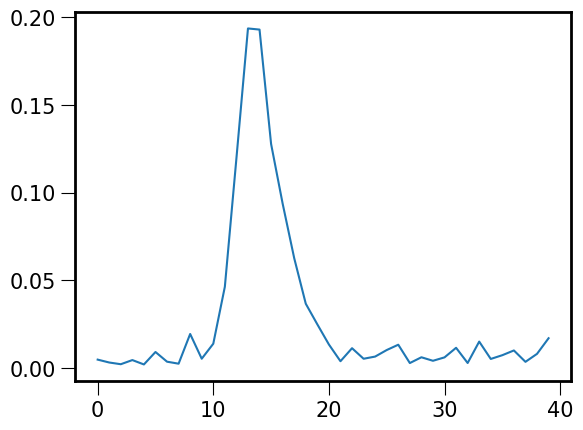

Epoch [500/5000], Loss: 4.755194411299935
Epoch [1000/5000], Loss: 1.3444930944729059
Epoch [1500/5000], Loss: 0.4919458909128202
Epoch [2000/5000], Loss: 0.22537371437527054
Epoch [2500/5000], Loss: 0.16585566494185167
Epoch [3000/5000], Loss: 0.14527179961863915
Epoch [3500/5000], Loss: 0.13814332371465057
Epoch [4000/5000], Loss: 0.1357245440855522
Epoch [4500/5000], Loss: 0.13440391236022736
Epoch [5000/5000], Loss: 0.13310236783474164
task 0 train accuracy: 0.983 auc: nan
task 0 test accuracy: 0.983 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 0.986 auc: nan
task 2 test accuracy: 0.986 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
Epoch [500/5000], Loss: 4.02763

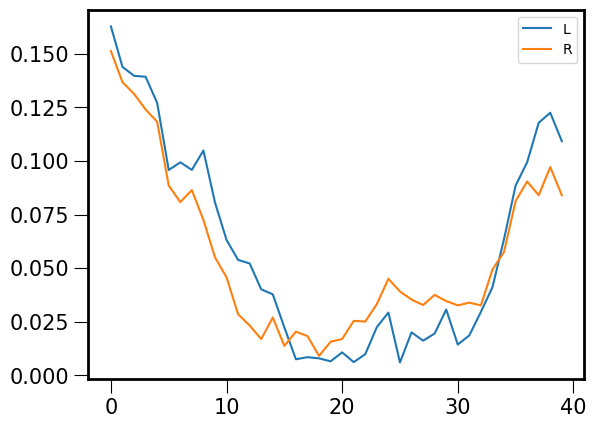

Epoch [500/5000], Loss: 7.119578847976266
Epoch [1000/5000], Loss: 1.9891256337664258
Epoch [1500/5000], Loss: 0.6290096305186437
Epoch [2000/5000], Loss: 0.28004942738430555
Epoch [2500/5000], Loss: 0.18181248083730323
Epoch [3000/5000], Loss: 0.15174214099907757
Epoch [3500/5000], Loss: 0.13530062154657158
Epoch [4000/5000], Loss: 0.1303353942282828
Epoch [4500/5000], Loss: 0.12818956072364218
Epoch [5000/5000], Loss: 0.12740108645954198
task 0 train accuracy: 0.978 auc: 0.994
task 0 test accuracy: 0.978 auc: 0.994
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 0.989 auc: 1.000
task 4 test accuracy: 0.989 auc: 1.000
task 5 train accuracy: 0.974 auc: 0.986
task 5 test accuracy: 0.974 auc: 0.986
task 6 train accuracy: 1.000 auc: 1.000
task 6 test accuracy: 1.000 auc: 1.000
Epoch [500/5000

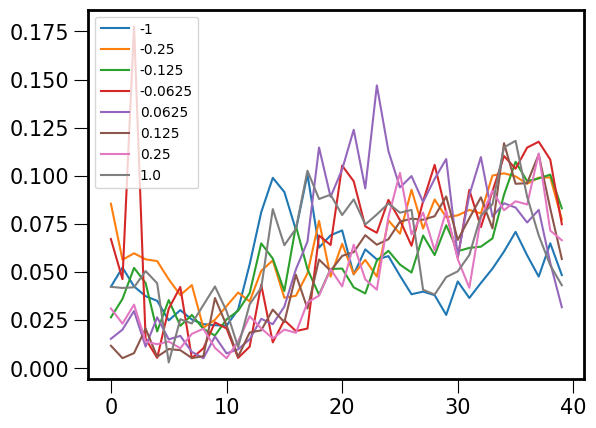

1/5 folds remaining ...
'e6749a77-4b65-4186-a47e-63562386cecd'
12/23 regions remaining ...
SPIV: 19 PIDs
pulling data from ibl database ..
eid: 004d8fd5-41e7-4f1b-a45b-0d4ad76fe446
pid: d65ab768-bd77-4719-acb9-677abca4e9d8
number of trials found: 619
found 619 trials from 29.38 to 3604.77 sec.
found 52 Kilosort units in region spiv


Compute spike count: 100%|██████████████████| 619/619 [00:00<00:00, 1664.76it/s]


pulling data from ibl database ..
eid: 6bf810fd-fbeb-4eea-9ea7-b6791d002b22
pid: 234c9e15-79a4-4e8a-8263-8b06cfbcbe7d
number of trials found: 432
found 432 trials from 137.14 to 2774.18 sec.
found 60 Kilosort units in region spiv


Compute spike count: 100%|███████████████████| 432/432 [00:01<00:00, 278.08it/s]


pulling data from ibl database ..
eid: 15948667-747b-4702-9d53-354ac70e9119
pid: 7587e3bb-dd11-4853-b48b-feab0b56ae05
number of trials found: 375
found 375 trials from 75.70 to 2809.96 sec.
found 8 Kilosort units in region spiv


Compute spike count: 100%|██████████████████| 375/375 [00:00<00:00, 4244.33it/s]


pulling data from ibl database ..
eid: 09394481-8dd2-4d5c-9327-f2753ede92d7
pid: 0fcb5f66-4d56-4247-8413-aef51e484e67
number of trials found: 803
found 803 trials from 75.15 to 4099.90 sec.
found 94 Kilosort units in region spiv


Compute spike count: 100%|███████████████████| 803/803 [00:02<00:00, 385.87it/s]


pulling data from ibl database ..
eid: c728f6fd-58e2-448d-aefb-a72c637b604c
pid: 4037a618-e6ba-4142-a6d2-3e32ef25fd1b
number of trials found: 570
found 570 trials from 36.54 to 2639.72 sec.
found 61 Kilosort units in region spiv


Compute spike count: 100%|███████████████████| 570/570 [00:00<00:00, 966.08it/s]


pulling data from ibl database ..
eid: 25d1920e-a2af-4b6c-9f2e-fc6c65576544
pid: 76c5c1a1-3617-4727-9f75-d975c9a08203
number of trials found: 358
found 358 trials from 9.42 to 2224.60 sec.
found 132 Kilosort units in region spiv


Compute spike count: 100%|███████████████████| 358/358 [00:01<00:00, 200.36it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: ffb1b072-2de7-44a4-8115-5799b9866382
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 2 Kilosort units in region spiv


Compute spike count: 100%|█████████████████| 834/834 [00:00<00:00, 15123.17it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: f1db6257-85ef-4385-b415-2d078ec75df2
pid: 72c095b0-c7ab-4e22-a4aa-4163102de553
number of trials found: 648
found 648 trials from 36.47 to 4062.93 sec.
found 26 Kilosort units in region spiv


Compute spike count: 100%|███████████████████| 648/648 [00:01<00:00, 384.50it/s]


pulling data from ibl database ..
eid: c4432264-e1ae-446f-8a07-6280abade813
pid: dce4e63f-7ece-4dae-bd6e-5b116c2fbe37
number of trials found: 736
found 736 trials from 35.96 to 4044.76 sec.
found 11 Kilosort units in region spiv


Compute spike count: 100%|███████████████████| 736/736 [00:00<00:00, 774.84it/s]


pulling data from ibl database ..
eid: 56bc129c-6265-407a-a208-cc16d20a6c01
pid: 64aadf54-d662-4934-8c08-cad14ee5b69f
number of trials found: 934
found 934 trials from 31.63 to 5244.90 sec.
found 47 Kilosort units in region spiv


Compute spike count: 100%|███████████████████| 934/934 [00:04<00:00, 204.19it/s]


pulling data from ibl database ..
eid: 004d8fd5-41e7-4f1b-a45b-0d4ad76fe446
pid: d65ab768-bd77-4719-acb9-677abca4e9d8
number of trials found: 619
found 619 trials from 29.38 to 3604.77 sec.
found 5 good units in region spiv


Compute spike count: 100%|█████████████████| 619/619 [00:00<00:00, 12283.14it/s]


pulling data from ibl database ..
eid: 6bf810fd-fbeb-4eea-9ea7-b6791d002b22
pid: 234c9e15-79a4-4e8a-8263-8b06cfbcbe7d
number of trials found: 432
found 432 trials from 137.14 to 2774.18 sec.
found 4 good units in region spiv


Compute spike count: 100%|██████████████████| 432/432 [00:00<00:00, 8265.35it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 15948667-747b-4702-9d53-354ac70e9119
pid: 7587e3bb-dd11-4853-b48b-feab0b56ae05
number of trials found: 375
found 375 trials from 75.70 to 2809.96 sec.
found 0 good units in region spiv


Compute spike count: 100%|█████████████████| 375/375 [00:00<00:00, 85607.36it/s]


pulling data from ibl database ..
eid: 09394481-8dd2-4d5c-9327-f2753ede92d7
pid: 0fcb5f66-4d56-4247-8413-aef51e484e67
number of trials found: 803
found 803 trials from 75.15 to 4099.90 sec.
found 9 good units in region spiv


Compute spike count: 100%|██████████████████| 803/803 [00:00<00:00, 2279.92it/s]


pulling data from ibl database ..
eid: c728f6fd-58e2-448d-aefb-a72c637b604c
pid: 4037a618-e6ba-4142-a6d2-3e32ef25fd1b
number of trials found: 570
found 570 trials from 36.54 to 2639.72 sec.
found 4 good units in region spiv


Compute spike count: 100%|██████████████████| 570/570 [00:00<00:00, 6734.02it/s]


pulling data from ibl database ..
eid: 25d1920e-a2af-4b6c-9f2e-fc6c65576544
pid: 76c5c1a1-3617-4727-9f75-d975c9a08203
number of trials found: 358
found 358 trials from 9.42 to 2224.60 sec.
found 13 good units in region spiv


Compute spike count: 100%|██████████████████| 358/358 [00:00<00:00, 1653.77it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: ffb1b072-2de7-44a4-8115-5799b9866382
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 0 good units in region spiv


Compute spike count: 100%|█████████████████| 834/834 [00:00<00:00, 87133.20it/s]


pulling data from ibl database ..
eid: f1db6257-85ef-4385-b415-2d078ec75df2
pid: 72c095b0-c7ab-4e22-a4aa-4163102de553
number of trials found: 648
found 648 trials from 36.47 to 4062.93 sec.
found 2 good units in region spiv


Compute spike count: 100%|██████████████████| 648/648 [00:00<00:00, 2717.93it/s]


pulling data from ibl database ..
eid: c4432264-e1ae-446f-8a07-6280abade813
pid: dce4e63f-7ece-4dae-bd6e-5b116c2fbe37
number of trials found: 736
found 736 trials from 35.96 to 4044.76 sec.
found 0 good units in region spiv


Compute spike count: 100%|█████████████████| 736/736 [00:00<00:00, 90968.26it/s]


pulling data from ibl database ..
eid: 56bc129c-6265-407a-a208-cc16d20a6c01
pid: 64aadf54-d662-4934-8c08-cad14ee5b69f
number of trials found: 934
found 934 trials from 31.63 to 5244.90 sec.
found 5 good units in region spiv


Compute spike count: 100%|██████████████████| 934/934 [00:00<00:00, 2028.46it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 9.190572401257608
Epoch [1000/5000], Loss: 2.7904618021345073
Epoch [1500/5000], Loss: 1.0773032925313153
Epoch [2000/5000], Loss: 0.6640544643151303
Epoch [2500/5000], Loss: 0.5655105363867934
Epoch [3000/5000], Loss: 0.5169108855700557
Epoch [3500/5000], Loss: 0.4748246177137127
Epoch [4000/5000], Loss: 0.463051672200004
Epoch [4500/5000], Loss: 0.4598972315190995
Epoch [5000/5000], Loss: 0.4585630758593704


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


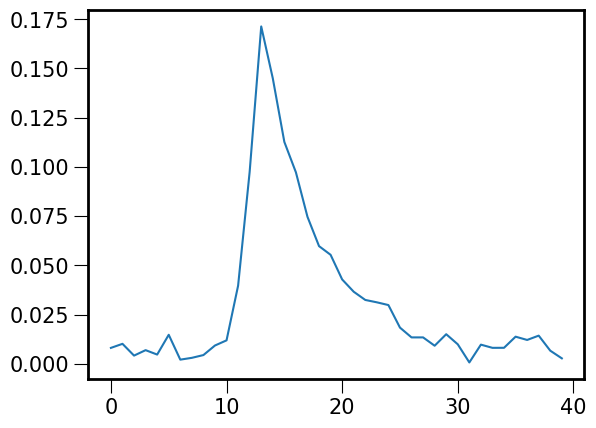

Epoch [500/5000], Loss: 3.375092451878006
Epoch [1000/5000], Loss: 0.9160099752138074
Epoch [1500/5000], Loss: 0.3358627655105171
Epoch [2000/5000], Loss: 0.1987880123791738
Epoch [2500/5000], Loss: 0.1536188950471152
Epoch [3000/5000], Loss: 0.12368327613646446
Epoch [3500/5000], Loss: 0.10623623547342143
Epoch [4000/5000], Loss: 0.0967165850894091
Epoch [4500/5000], Loss: 0.09123114111731223
Epoch [5000/5000], Loss: 0.08853328563494009
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 0.992 auc: nan
task 4 test accuracy: 0.992 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 0.948 auc: nan
task 6 test accuracy: 0.948 auc: nan
task 7 train accuracy: 0.998 auc:

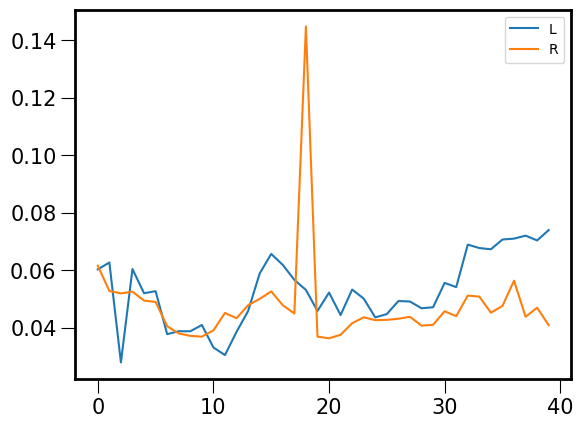

Epoch [500/5000], Loss: 3.570014345157132
Epoch [1000/5000], Loss: 0.6269004851458018
Epoch [1500/5000], Loss: 0.20058650248247697
Epoch [2000/5000], Loss: 0.14919262342448333
Epoch [2500/5000], Loss: 0.1351033865677558
Epoch [3000/5000], Loss: 0.12786840995936827
Epoch [3500/5000], Loss: 0.1130917117020159
Epoch [4000/5000], Loss: 0.10966609032813557
Epoch [4500/5000], Loss: 0.11085578805023144
Epoch [5000/5000], Loss: 0.11234668747893498
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 0.989 auc: 0.990
task 2 test accuracy: 0.989 auc: 0.990
task 3 train accuracy: 0.974 auc: 1.000
task 3 test accuracy: 0.974 auc: 1.000
task 4 train accuracy: 1.000 auc: 1.000
task 4 test accuracy: 1.000 auc: 1.000
task 5 train accuracy: 0.968 auc: 0.974
task 5 test accuracy: 0.968 auc: 0.974
task 6 train accuracy: 0.969 auc: 0.962
task 6 test accuracy: 0.969 auc: 0.962
task 7 trai

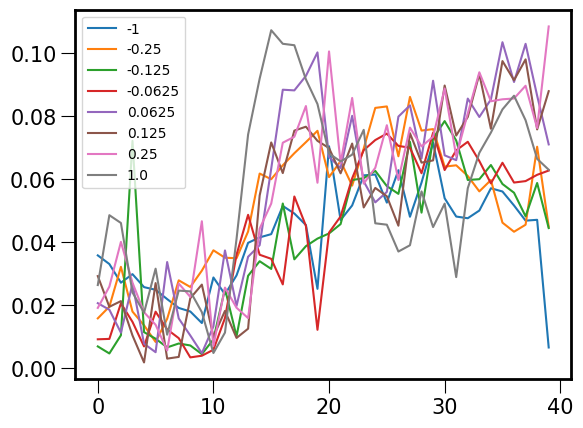

1/5 folds remaining ...
'7587e3bb-dd11-4853-b48b-feab0b56ae05'
13/23 regions remaining ...
LGv: 10 PIDs
pulling data from ibl database ..
eid: 2ab7d2c2-bcb7-4ae6-9626-f3786c22d970
pid: c44adf4f-3d1c-491f-88e4-c516cc910bd8
number of trials found: 524
found 524 trials from 67.17 to 2880.45 sec.
found 3 Kilosort units in region lgv


Compute spike count: 100%|█████████████████| 524/524 [00:00<00:00, 20698.18it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 233617ec-c5cf-4eda-afc8-3b1d94f36d73
pid: 5bfcf68f-4e0b-46f8-a9e3-8e919d5ddd1c
number of trials found: 382
found 382 trials from 57.06 to 2752.48 sec.
found 89 Kilosort units in region lgv


Compute spike count: 100%|██████████████████| 382/382 [00:00<00:00, 1403.31it/s]


pulling data from ibl database ..
eid: 196a2adf-ff83-49b2-823a-33f990049c2e
pid: 0259543e-1ca3-48e7-95c9-53f9e4c9bfcc
number of trials found: 526
found 526 trials from 126.81 to 2708.15 sec.
found 42 Kilosort units in region lgv


Compute spike count: 100%|██████████████████| 526/526 [00:00<00:00, 1008.89it/s]


pulling data from ibl database ..
eid: 78b4fff5-c5ec-44d9-b5f9-d59493063f00
pid: 1ca6cd06-1ed5-45af-b73a-017d5e7cff48
number of trials found: 770
found 770 trials from 114.73 to 4142.50 sec.
found 76 Kilosort units in region lgv


Compute spike count: 100%|███████████████████| 770/770 [00:01<00:00, 692.17it/s]


pulling data from ibl database ..
eid: 3537d970-f515-4786-853f-23de525e110f
pid: 501ab543-9d02-4085-956d-22b9b3eeb543
number of trials found: 437
found 437 trials from 25.72 to 2599.84 sec.
found 6 Kilosort units in region lgv


Compute spike count: 100%|█████████████████| 437/437 [00:00<00:00, 11782.13it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: a9138924-4395-4981-83d1-530f6ff7c8fc
pid: 9338f8bb-e097-46d8-81b4-7f37beb4d308
number of trials found: 766
found 766 trials from 45.40 to 4420.74 sec.
found 49 Kilosort units in region lgv


Compute spike count: 100%|███████████████████| 766/766 [00:01<00:00, 736.39it/s]


pulling data from ibl database ..
eid: eebacd5a-7dcd-4ba6-9dff-ec2a4d2f19e0
pid: 099c0519-640b-4eb7-867c-998dc337579d
number of trials found: 554
found 554 trials from 56.17 to 2721.08 sec.
found 4 Kilosort units in region lgv


Compute spike count: 100%|█████████████████| 554/554 [00:00<00:00, 26078.48it/s]


pulling data from ibl database ..
eid: f9860a11-24d3-452e-ab95-39e199f20a93
pid: df7d2ca7-068b-4df2-9782-8f6bb7d67f18
number of trials found: 402
found 402 trials from 165.19 to 4373.96 sec.
found 90 Kilosort units in region lgv


Compute spike count: 100%|███████████████████| 402/402 [00:00<00:00, 954.33it/s]


pulling data from ibl database ..
eid: 66d98e6e-bcd9-4e78-8fbb-636f7e808b29
pid: 4f10fbb7-57be-427b-bb1d-a19bd31dc27b
number of trials found: 496
found 496 trials from 653.03 to 4476.79 sec.
found 132 Kilosort units in region lgv


Compute spike count: 100%|███████████████████| 496/496 [00:00<00:00, 851.36it/s]


pulling data from ibl database ..
eid: d16a9a8d-5f42-4b49-ba58-1746f807fcc1
pid: 5a9f8899-556a-43ea-892d-5e35b969ff38
number of trials found: 402
found 402 trials from 16.21 to 2281.70 sec.
found 3 Kilosort units in region lgv


Compute spike count: 100%|█████████████████| 402/402 [00:00<00:00, 13980.78it/s]


pulling data from ibl database ..
eid: 2ab7d2c2-bcb7-4ae6-9626-f3786c22d970
pid: c44adf4f-3d1c-491f-88e4-c516cc910bd8
number of trials found: 524
found 524 trials from 67.17 to 2880.45 sec.
found 0 good units in region lgv


Compute spike count: 100%|█████████████████| 524/524 [00:00<00:00, 88304.68it/s]


pulling data from ibl database ..
eid: 233617ec-c5cf-4eda-afc8-3b1d94f36d73
pid: 5bfcf68f-4e0b-46f8-a9e3-8e919d5ddd1c
number of trials found: 382
found 382 trials from 57.06 to 2752.48 sec.
found 5 good units in region lgv


Compute spike count: 100%|██████████████████| 382/382 [00:00<00:00, 8310.89it/s]


pulling data from ibl database ..
eid: 196a2adf-ff83-49b2-823a-33f990049c2e
pid: 0259543e-1ca3-48e7-95c9-53f9e4c9bfcc
number of trials found: 526
found 526 trials from 126.81 to 2708.15 sec.
found 7 good units in region lgv


Compute spike count: 100%|██████████████████| 526/526 [00:00<00:00, 2804.55it/s]


pulling data from ibl database ..
eid: 78b4fff5-c5ec-44d9-b5f9-d59493063f00
pid: 1ca6cd06-1ed5-45af-b73a-017d5e7cff48
number of trials found: 770
found 770 trials from 114.73 to 4142.50 sec.
found 2 good units in region lgv


Compute spike count: 100%|█████████████████| 770/770 [00:00<00:00, 18545.76it/s]


pulling data from ibl database ..
eid: 3537d970-f515-4786-853f-23de525e110f
pid: 501ab543-9d02-4085-956d-22b9b3eeb543
number of trials found: 437
found 437 trials from 25.72 to 2599.84 sec.
found 2 good units in region lgv


Compute spike count: 100%|█████████████████| 437/437 [00:00<00:00, 19415.19it/s]


pulling data from ibl database ..
eid: a9138924-4395-4981-83d1-530f6ff7c8fc
pid: 9338f8bb-e097-46d8-81b4-7f37beb4d308
number of trials found: 766
found 766 trials from 45.40 to 4420.74 sec.
found 11 good units in region lgv


Compute spike count: 100%|██████████████████| 766/766 [00:00<00:00, 1540.55it/s]


pulling data from ibl database ..
eid: eebacd5a-7dcd-4ba6-9dff-ec2a4d2f19e0
pid: 099c0519-640b-4eb7-867c-998dc337579d
number of trials found: 554
found 554 trials from 56.17 to 2721.08 sec.
found 1 good units in region lgv


Compute spike count: 100%|█████████████████| 554/554 [00:00<00:00, 54097.37it/s]


pulling data from ibl database ..
eid: f9860a11-24d3-452e-ab95-39e199f20a93
pid: df7d2ca7-068b-4df2-9782-8f6bb7d67f18
number of trials found: 402
found 402 trials from 165.19 to 4373.96 sec.
found 24 good units in region lgv


Compute spike count: 100%|██████████████████| 402/402 [00:00<00:00, 1773.46it/s]


pulling data from ibl database ..
eid: 66d98e6e-bcd9-4e78-8fbb-636f7e808b29
pid: 4f10fbb7-57be-427b-bb1d-a19bd31dc27b
number of trials found: 496
found 496 trials from 653.03 to 4476.79 sec.
found 14 good units in region lgv


Compute spike count: 100%|██████████████████| 496/496 [00:00<00:00, 2958.07it/s]


pulling data from ibl database ..
eid: d16a9a8d-5f42-4b49-ba58-1746f807fcc1
pid: 5a9f8899-556a-43ea-892d-5e35b969ff38
number of trials found: 402
found 402 trials from 16.21 to 2281.70 sec.
found 0 good units in region lgv


Compute spike count: 100%|█████████████████| 402/402 [00:00<00:00, 91522.02it/s]

Start extracting V from trials with different contrasts ...


Epoch [500/5000], Loss: 11.105618893270815
Epoch [1000/5000], Loss: 3.2856543005707777
Epoch [1500/5000], Loss: 1.351510190216211
Epoch [2000/5000], Loss: 0.8137517509320625
Epoch [2500/5000], Loss: 0.6455911361527688
Epoch [3000/5000], Loss: 0.5779496786888855
Epoch [3500/5000], Loss: 0.5404124311196125
Epoch [4000/5000], Loss: 0.5179667985862398
Epoch [4500/5000], Loss: 0.5075649375193511
Epoch [5000/5000], Loss: 0.5047045112132224


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


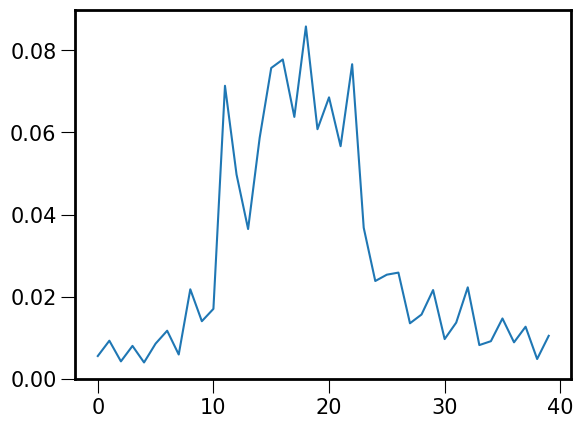

Epoch [500/5000], Loss: 2.5674903276915892
Epoch [1000/5000], Loss: 0.15778746628844229
Epoch [1500/5000], Loss: 0.05320534183502771
Epoch [2000/5000], Loss: 0.04178028870053999
Epoch [2500/5000], Loss: 0.03505381739533718
Epoch [3000/5000], Loss: 0.030178728016006323
Epoch [3500/5000], Loss: 0.027523052757900224
Epoch [4000/5000], Loss: 0.02635003067688813
Epoch [4500/5000], Loss: 0.025903923380871968
Epoch [5000/5000], Loss: 0.025754580047228096
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
Epoch [500/5000], Loss: 2.844814859194937
Epoch [1000/5000], Loss: 0.19956560859763864
Epoch [1500

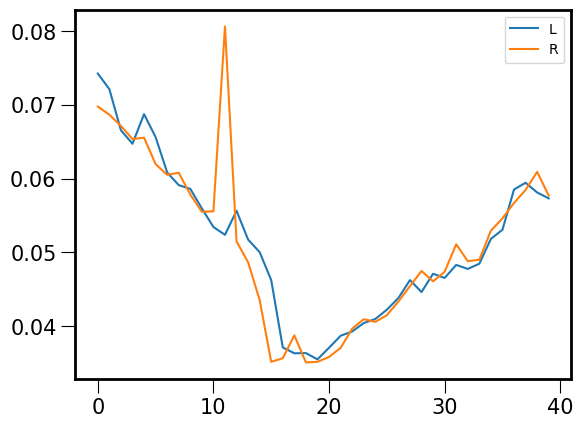

Epoch [500/5000], Loss: 5.928647728734611
Epoch [1000/5000], Loss: 0.44724085415777215
Epoch [1500/5000], Loss: 0.08328391029284639
Epoch [2000/5000], Loss: 0.06456528962583553
Epoch [2500/5000], Loss: 0.06518318837419557
Epoch [3000/5000], Loss: 0.06865535013369183
Epoch [3500/5000], Loss: 0.07161774810304684
Epoch [4000/5000], Loss: 0.07341641267091638
Epoch [4500/5000], Loss: 0.07433416689436001
Epoch [5000/5000], Loss: 0.0748659967452413
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 0.959 auc: 0.967
task 1 test accuracy: 0.959 auc: 0.967
task 2 train accuracy: 0.960 auc: 0.969
task 2 test accuracy: 0.960 auc: 0.969
task 3 train accuracy: 0.955 auc: 0.993
task 3 test accuracy: 0.955 auc: 0.993
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 0.986 auc: 1.000
task 5 test accuracy: 0.986 auc: 1.000
Epoch [500/5000], Loss: 10.58260299024128
Epoch [1000/5000], Loss: 1.9899948760915083
Ep

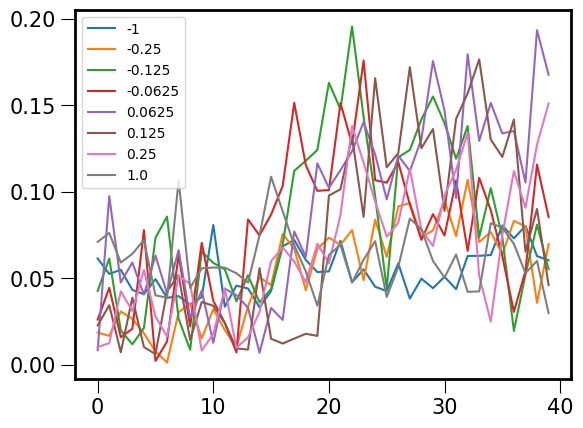

1/5 folds remaining ...
'c44adf4f-3d1c-491f-88e4-c516cc910bd8'
14/23 regions remaining ...
LIN: 1 PIDs
pulling data from ibl database ..
eid: 7939711b-8b4d-4251-b698-b97c1eaa846e
pid: e070023a-2a5d-4398-ad66-f9ed5d517ad1
number of trials found: 907
found 907 trials from 24.96 to 5434.44 sec.
found 35 Kilosort units in region lin


Compute spike count: 100%|██████████████████| 907/907 [00:00<00:00, 1056.49it/s]


pulling data from ibl database ..
eid: 7939711b-8b4d-4251-b698-b97c1eaa846e
pid: e070023a-2a5d-4398-ad66-f9ed5d517ad1
number of trials found: 907
found 907 trials from 24.96 to 5434.44 sec.
found 2 good units in region lin


Compute spike count: 100%|█████████████████| 907/907 [00:00<00:00, 10120.90it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 6.146370855452199
Epoch [1000/5000], Loss: 1.3806053924005892
Epoch [1500/5000], Loss: 0.6916605181806076
Epoch [2000/5000], Loss: 0.5426502101625441
Epoch [2500/5000], Loss: 0.4945185089672494
Epoch [3000/5000], Loss: 0.45829955754776813
Epoch [3500/5000], Loss: 0.43386958816750376
Epoch [4000/5000], Loss: 0.42292524113716473
Epoch [4500/5000], Loss: 0.41728507802489223
Epoch [5000/5000], Loss: 0.4135425907601524


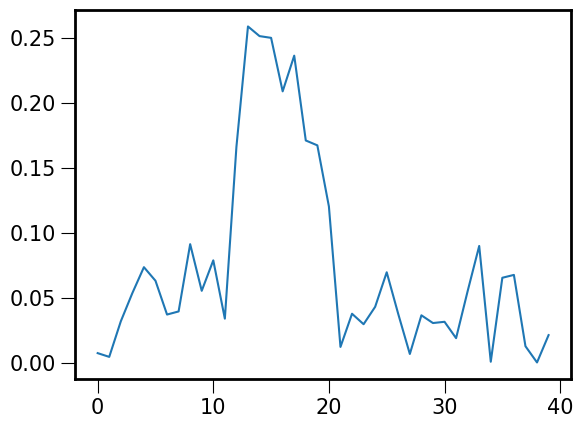

Epoch [500/5000], Loss: 1.170495251468291
Epoch [1000/5000], Loss: 0.045117487360746264
Epoch [1500/5000], Loss: 0.020120715988163278
Epoch [2000/5000], Loss: 0.025852237648360157
Epoch [2500/5000], Loss: 0.03007224177203085
Epoch [3000/5000], Loss: 0.030354334774480986
Epoch [3500/5000], Loss: 0.029611337292018727
Epoch [4000/5000], Loss: 0.029117567617628227
Epoch [4500/5000], Loss: 0.028893450995459025
Epoch [5000/5000], Loss: 0.028802015810750946
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
Epoch [500/5000], Loss: 2.509943059698504
Epoch [1000/5000], Loss: 0.31067083899841924
Epoch [1500/5000], Loss: 0.08062550806876741
Epoch [2000/5000], Loss: 0.03987500983549882
Epoch [2500/5000], Loss: 0.03842489361594758
Epoch [3000/5000], Loss: 0.03337627754113725
Epoch [3500/5000], Loss: 0.02981085335805536
Epoch [4000/5000], Loss: 0.029472441596571246
Epoch [4500/5000], Loss: 0.029387011071182682
Epoch [5000/5000], Loss: 0.029325390705845812
task 0 train accurac

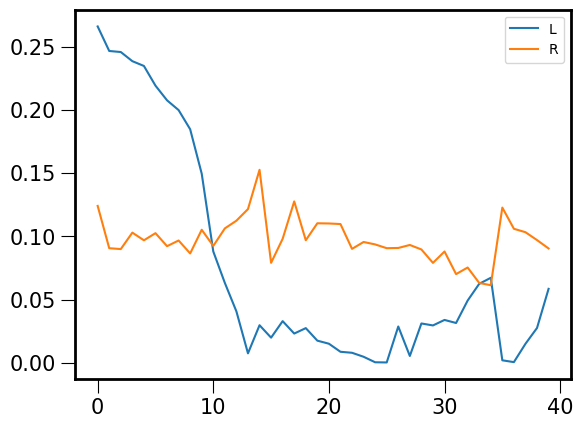

Epoch [500/5000], Loss: 2.059062856836151
Epoch [1000/5000], Loss: 0.17114179418085265
Epoch [1500/5000], Loss: 0.029531565612748664
Epoch [2000/5000], Loss: 0.03001943369520142
Epoch [2500/5000], Loss: 0.028990396164576982
Epoch [3000/5000], Loss: 0.02853907020491763
Epoch [3500/5000], Loss: 0.027180551098028582
Epoch [4000/5000], Loss: 0.0240552652987674
Epoch [4500/5000], Loss: 0.02221473418212923
Epoch [5000/5000], Loss: 0.021684123456117362
task 0 train accuracy: 1.000 auc: 1.000
task 0 test accuracy: 1.000 auc: 1.000
Epoch [500/5000], Loss: 2.665883168998203
Epoch [1000/5000], Loss: 0.1468095623335246
Epoch [1500/5000], Loss: 0.03664555592647336
Epoch [2000/5000], Loss: 0.03925475077606517
Epoch [2500/5000], Loss: 0.040640355388987665
Epoch [3000/5000], Loss: 0.03957005479719671
Epoch [3500/5000], Loss: 0.03795594435493043
Epoch [4000/5000], Loss: 0.03713473447386647
Epoch [4500/5000], Loss: 0.0368381009230774
Epoch [5000/5000], Loss: 0.03682231215095882
task 0 train accuracy: 1.

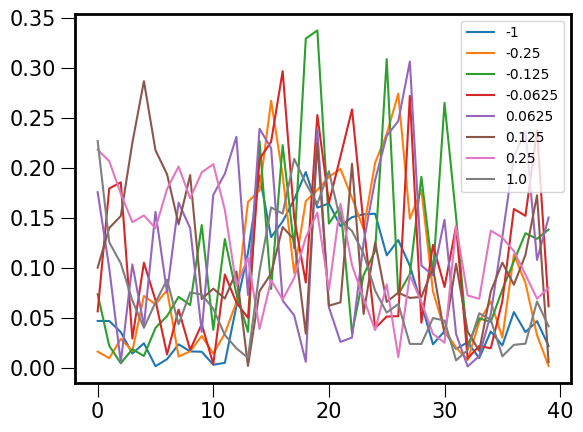

1/5 folds remaining ...
Epoch [500/5000], Loss: 5.053537124224441
Epoch [1000/5000], Loss: 1.302988303153017
Epoch [1500/5000], Loss: 0.6458480256341539
Epoch [2000/5000], Loss: 0.500808586472378
Epoch [2500/5000], Loss: 0.4529817347866437
Epoch [3000/5000], Loss: 0.43319550507953736
Epoch [3500/5000], Loss: 0.4205106292973603
Epoch [4000/5000], Loss: 0.4114553039982704
Epoch [4500/5000], Loss: 0.40763990303259656
Epoch [5000/5000], Loss: 0.4070353583709955
task 0 train accuracy: 0.823 auc: 0.913
task 0 test accuracy: 0.824 auc: 0.886
2/5 folds remaining ...
Epoch [500/5000], Loss: 5.114049038604999
Epoch [1000/5000], Loss: 1.349076277718104
Epoch [1500/5000], Loss: 0.6297900449527111
Epoch [2000/5000], Loss: 0.4820352478175483
Epoch [2500/5000], Loss: 0.4306567951026855
Epoch [3000/5000], Loss: 0.4041355387050541
Epoch [3500/5000], Loss: 0.3964893188161317
Epoch [4000/5000], Loss: 0.39578071061183207
Epoch [4500/5000], Loss: 0.39556304707378065
Epoch [5000/5000], Loss: 0.3949474885004

Compute spike count: 100%|███████████████████| 445/445 [00:00<00:00, 722.75it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: 79e56114-a12b-4571-bee3-a5cdd2145ea1
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 145 Kilosort units in region mdrn


Compute spike count: 100%|███████████████████| 445/445 [00:01<00:00, 246.54it/s]


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 5 Kilosort units in region mdrn


Compute spike count: 100%|█████████████████| 515/515 [00:00<00:00, 18975.25it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 25e75514-43e1-4c07-9fea-581bd203b55c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 187 Kilosort units in region mdrn


Compute spike count: 100%|███████████████████| 427/427 [00:01<00:00, 293.47it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: ffb1b072-2de7-44a4-8115-5799b9866382
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 43 Kilosort units in region mdrn


Compute spike count: 100%|██████████████████| 834/834 [00:00<00:00, 1506.96it/s]


pulling data from ibl database ..
eid: 1928bf72-2002-46a6-8930-728420402e01
pid: 68f06c5f-8566-4a4f-a4b1-ab8398724913
number of trials found: 584
found 584 trials from 50.05 to 4189.98 sec.
found 105 Kilosort units in region mdrn


Compute spike count: 100%|██████████████████| 584/584 [00:00<00:00, 1436.02it/s]


pulling data from ibl database ..
eid: fc14c0d6-51cf-48ba-b326-56ed5a9420c3
pid: cb1c4327-5f5e-4286-85ed-840c85e82792
number of trials found: 456
found 456 trials from 175.51 to 2516.00 sec.
found 73 Kilosort units in region mdrn


Compute spike count: 100%|██████████████████| 456/456 [00:00<00:00, 1034.99it/s]


pulling data from ibl database ..
eid: 45ef6691-7b80-4a43-bd1a-85fc00851ae8
pid: 3ccb2d59-9e94-48e6-9e72-0b7b96bd3f9b
number of trials found: 566
found 566 trials from 51.55 to 3384.17 sec.
found 142 Kilosort units in region mdrn


Compute spike count: 100%|███████████████████| 566/566 [00:00<00:00, 594.83it/s]


pulling data from ibl database ..
eid: f10efe41-0dc0-44d0-8f26-5ff68dca23e9
pid: 7bc16ab1-1b0d-4f52-9e4b-210106ea344c
number of trials found: 581
found 581 trials from 45.96 to 3963.21 sec.
found 27 Kilosort units in region mdrn


Compute spike count: 100%|██████████████████| 581/581 [00:00<00:00, 2032.33it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: e6749a77-4b65-4186-a47e-63562386cecd
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 3 good units in region mdrn


Compute spike count: 100%|█████████████████| 445/445 [00:00<00:00, 20155.12it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: 79e56114-a12b-4571-bee3-a5cdd2145ea1
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 4 good units in region mdrn


Compute spike count: 100%|█████████████████| 445/445 [00:00<00:00, 24019.89it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 0 good units in region mdrn


Compute spike count: 100%|█████████████████| 515/515 [00:00<00:00, 80623.57it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 25e75514-43e1-4c07-9fea-581bd203b55c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 5 good units in region mdrn


Compute spike count: 100%|█████████████████| 427/427 [00:00<00:00, 20528.73it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: ffb1b072-2de7-44a4-8115-5799b9866382
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 0 good units in region mdrn


Compute spike count: 100%|█████████████████| 834/834 [00:00<00:00, 85061.02it/s]


pulling data from ibl database ..
eid: 1928bf72-2002-46a6-8930-728420402e01
pid: 68f06c5f-8566-4a4f-a4b1-ab8398724913
number of trials found: 584
found 584 trials from 50.05 to 4189.98 sec.
found 10 good units in region mdrn


Compute spike count: 100%|██████████████████| 584/584 [00:00<00:00, 5089.27it/s]


pulling data from ibl database ..
eid: fc14c0d6-51cf-48ba-b326-56ed5a9420c3
pid: cb1c4327-5f5e-4286-85ed-840c85e82792
number of trials found: 456
found 456 trials from 175.51 to 2516.00 sec.
found 16 good units in region mdrn


Compute spike count: 100%|██████████████████| 456/456 [00:00<00:00, 3623.09it/s]


pulling data from ibl database ..
eid: 45ef6691-7b80-4a43-bd1a-85fc00851ae8
pid: 3ccb2d59-9e94-48e6-9e72-0b7b96bd3f9b
number of trials found: 566
found 566 trials from 51.55 to 3384.17 sec.
found 10 good units in region mdrn


Compute spike count: 100%|██████████████████| 566/566 [00:00<00:00, 5094.45it/s]


pulling data from ibl database ..
eid: f10efe41-0dc0-44d0-8f26-5ff68dca23e9
pid: 7bc16ab1-1b0d-4f52-9e4b-210106ea344c
number of trials found: 581
found 581 trials from 45.96 to 3963.21 sec.
found 0 good units in region mdrn


Compute spike count: 100%|█████████████████| 581/581 [00:00<00:00, 82595.26it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 13.13193881236119
Epoch [1000/5000], Loss: 3.7657501775824813
Epoch [1500/5000], Loss: 1.3577311883317966
Epoch [2000/5000], Loss: 0.7756272427056927
Epoch [2500/5000], Loss: 0.6116188537884155
Epoch [3000/5000], Loss: 0.5073299827368365
Epoch [3500/5000], Loss: 0.459873991418959
Epoch [4000/5000], Loss: 0.4369092340635209
Epoch [4500/5000], Loss: 0.42592927918696466
Epoch [5000/5000], Loss: 0.4212443923433491


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


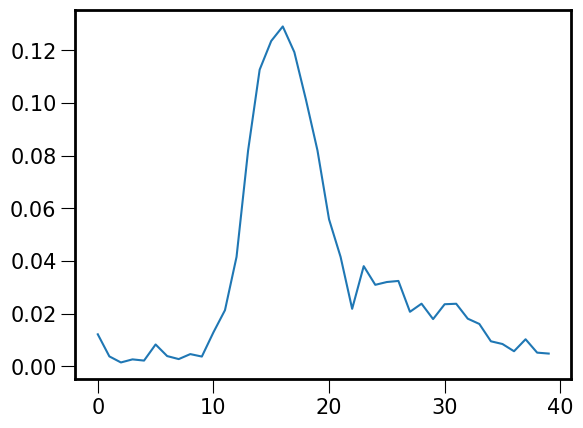

Epoch [500/5000], Loss: 7.524250061226324
Epoch [1000/5000], Loss: 1.7424718836079447
Epoch [1500/5000], Loss: 0.4334217515823253
Epoch [2000/5000], Loss: 0.20026683531768757
Epoch [2500/5000], Loss: 0.14331890664732988
Epoch [3000/5000], Loss: 0.0937964039320412
Epoch [3500/5000], Loss: 0.0770521368478696
Epoch [4000/5000], Loss: 0.07311671822663773
Epoch [4500/5000], Loss: 0.0715484700786981
Epoch [5000/5000], Loss: 0.06844905509251134
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.998 auc: nan
task 3 test accuracy: 0.998 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 0.988 auc:

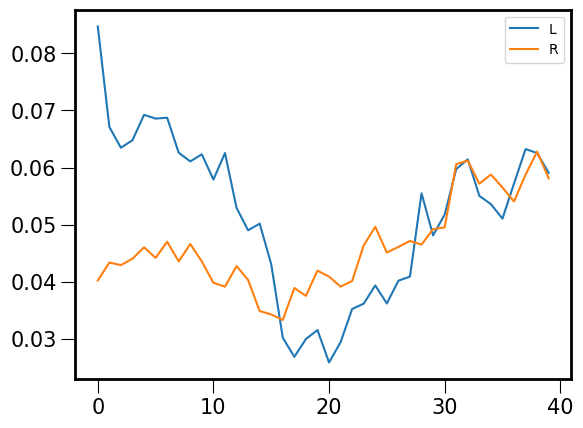

Epoch [500/5000], Loss: 8.564352766276777
Epoch [1000/5000], Loss: 3.0371777006751888
Epoch [1500/5000], Loss: 0.6309586911361172
Epoch [2000/5000], Loss: 0.11152688957408557
Epoch [2500/5000], Loss: 0.09033857324146816
Epoch [3000/5000], Loss: 0.08604057607681434
Epoch [3500/5000], Loss: 0.08598195296859748
Epoch [4000/5000], Loss: 0.08658050709769242
Epoch [4500/5000], Loss: 0.08704202236821215
Epoch [5000/5000], Loss: 0.08718701988959099
task 0 train accuracy: 1.000 auc: 1.000
task 0 test accuracy: 1.000 auc: 1.000
task 1 train accuracy: 1.000 auc: 1.000
task 1 test accuracy: 1.000 auc: 1.000
task 2 train accuracy: 1.000 auc: 1.000
task 2 test accuracy: 1.000 auc: 1.000
task 3 train accuracy: 0.963 auc: 0.992
task 3 test accuracy: 0.963 auc: 0.992
task 4 train accuracy: 0.976 auc: 1.000
task 4 test accuracy: 0.976 auc: 1.000
task 5 train accuracy: 0.983 auc: 1.000
task 5 test accuracy: 0.983 auc: 1.000
task 6 train accuracy: 0.987 auc: 1.000
task 6 test accuracy: 0.987 auc: 1.000
ta

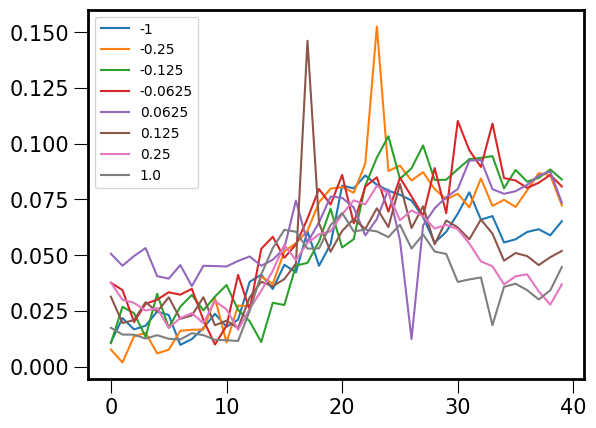

1/5 folds remaining ...
'89606895-287e-4559-8536-9830b047af34'
16/23 regions remaining ...
PYR: 7 PIDs
pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: 79e56114-a12b-4571-bee3-a5cdd2145ea1
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 7 Kilosort units in region pyr


Compute spike count: 100%|██████████████████| 445/445 [00:00<00:00, 5210.20it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: e6749a77-4b65-4186-a47e-63562386cecd
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 106 Kilosort units in region pyr


Compute spike count: 100%|███████████████████| 445/445 [00:01<00:00, 246.10it/s]


pulling data from ibl database ..
eid: a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e
pid: 6925a312-966c-4e41-b79e-4594da57a2ee
number of trials found: 364
found 364 trials from 76.32 to 3810.93 sec.
found 101 Kilosort units in region pyr


Compute spike count: 100%|███████████████████| 364/364 [00:00<00:00, 764.35it/s]


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 34 Kilosort units in region pyr


Compute spike count: 100%|██████████████████| 515/515 [00:00<00:00, 2950.35it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: 0228bcfd-632e-49bd-acd4-c334cf9213e9
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 21 Kilosort units in region pyr


Compute spike count: 100%|██████████████████| 834/834 [00:00<00:00, 1669.48it/s]


pulling data from ibl database ..
eid: 1928bf72-2002-46a6-8930-728420402e01
pid: 68f06c5f-8566-4a4f-a4b1-ab8398724913
number of trials found: 584
found 584 trials from 50.05 to 4189.98 sec.
found 61 Kilosort units in region pyr


Compute spike count: 100%|██████████████████| 584/584 [00:00<00:00, 2265.62it/s]


pulling data from ibl database ..
eid: 91796ceb-e314-4859-9a1f-092f85cc846a
pid: 3a37fb5c-3e96-4a0e-ac63-2eeec6744588
number of trials found: 552
found 552 trials from 59.11 to 3482.86 sec.
found 107 Kilosort units in region pyr


Compute spike count: 100%|███████████████████| 552/552 [00:02<00:00, 191.33it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: 79e56114-a12b-4571-bee3-a5cdd2145ea1
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 0 good units in region pyr


Compute spike count: 100%|█████████████████| 445/445 [00:00<00:00, 84082.59it/s]


pulling data from ibl database ..
eid: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e
pid: e6749a77-4b65-4186-a47e-63562386cecd
number of trials found: 445
found 445 trials from 155.72 to 4513.33 sec.
found 6 good units in region pyr


Compute spike count: 100%|██████████████████| 445/445 [00:00<00:00, 5541.00it/s]


pulling data from ibl database ..
eid: a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e
pid: 6925a312-966c-4e41-b79e-4594da57a2ee
number of trials found: 364
found 364 trials from 76.32 to 3810.93 sec.
found 12 good units in region pyr


Compute spike count: 100%|██████████████████| 364/364 [00:00<00:00, 6555.57it/s]


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 1 good units in region pyr


Compute spike count: 100%|█████████████████| 515/515 [00:00<00:00, 25714.16it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: 0228bcfd-632e-49bd-acd4-c334cf9213e9
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 0 good units in region pyr


Compute spike count: 100%|█████████████████| 834/834 [00:00<00:00, 84686.23it/s]


pulling data from ibl database ..
eid: 1928bf72-2002-46a6-8930-728420402e01
pid: 68f06c5f-8566-4a4f-a4b1-ab8398724913
number of trials found: 584
found 584 trials from 50.05 to 4189.98 sec.
found 2 good units in region pyr


Compute spike count: 100%|█████████████████| 584/584 [00:00<00:00, 41672.60it/s]


pulling data from ibl database ..
eid: 91796ceb-e314-4859-9a1f-092f85cc846a
pid: 3a37fb5c-3e96-4a0e-ac63-2eeec6744588
number of trials found: 552
found 552 trials from 59.11 to 3482.86 sec.
found 10 good units in region pyr


Compute spike count: 100%|██████████████████| 552/552 [00:00<00:00, 2571.80it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 9.934802025263643
Epoch [1000/5000], Loss: 2.384543393602514
Epoch [1500/5000], Loss: 0.8915537581080334
Epoch [2000/5000], Loss: 0.5927782362636255
Epoch [2500/5000], Loss: 0.5177169393163331
Epoch [3000/5000], Loss: 0.48002163515395474
Epoch [3500/5000], Loss: 0.4604531144224153
Epoch [4000/5000], Loss: 0.45140445266982326
Epoch [4500/5000], Loss: 0.4443438271413361
Epoch [5000/5000], Loss: 0.4399116705965754


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


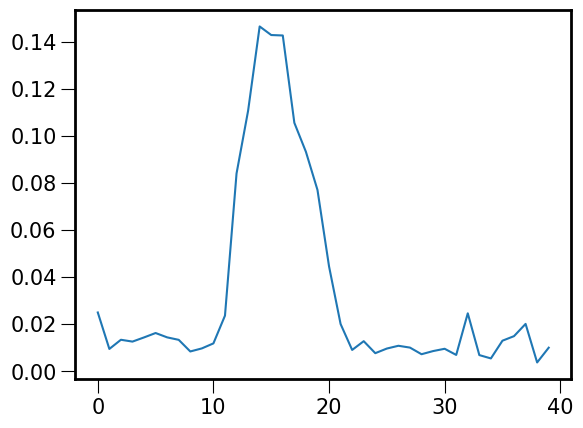

Epoch [500/5000], Loss: 4.323455916612013
Epoch [1000/5000], Loss: 1.2166971830713
Epoch [1500/5000], Loss: 0.3702753351758618
Epoch [2000/5000], Loss: 0.15168472887507023
Epoch [2500/5000], Loss: 0.10929656934176964
Epoch [3000/5000], Loss: 0.0945043106223672
Epoch [3500/5000], Loss: 0.09258873753899315
Epoch [4000/5000], Loss: 0.09256334561803226
Epoch [4500/5000], Loss: 0.0927478710004701
Epoch [5000/5000], Loss: 0.09286926800620283
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.978 auc: nan
task 3 test accuracy: 0.978 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
Epoch [500/5000], Loss: 5.85831018281009
Epoch [1000/5000], Loss: 1.4400603995360888
Epoch [1500/5000], Loss: 

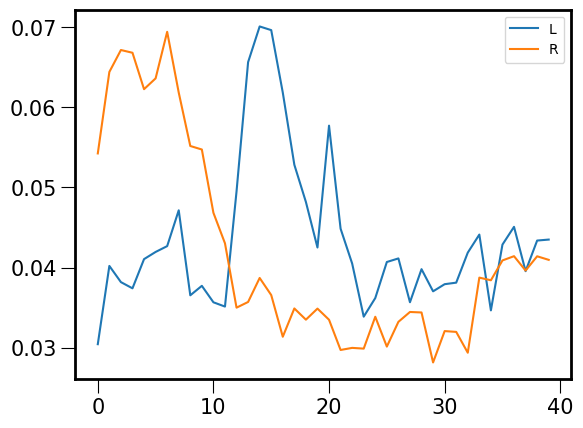

Epoch [500/5000], Loss: 5.506960371718599
Epoch [1000/5000], Loss: 0.8668765649312654
Epoch [1500/5000], Loss: 0.2722453397769588
Epoch [2000/5000], Loss: 0.15062393411815914
Epoch [2500/5000], Loss: 0.13970168491587012
Epoch [3000/5000], Loss: 0.13497239355715027
Epoch [3500/5000], Loss: 0.13026892928491832
Epoch [4000/5000], Loss: 0.12761852961488676
Epoch [4500/5000], Loss: 0.12684151062063104
Epoch [5000/5000], Loss: 0.12663682260866962
task 0 train accuracy: 1.000 auc: 1.000
task 0 test accuracy: 1.000 auc: 1.000
task 1 train accuracy: 1.000 auc: 1.000
task 1 test accuracy: 1.000 auc: 1.000
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.944 auc: 0.922
task 3 test accuracy: 0.944 auc: 0.922
task 4 train accuracy: 0.951 auc: 0.965
task 4 test accuracy: 0.951 auc: 0.965
task 5 train accuracy: 1.000 auc: 1.000
task 5 test accuracy: 1.000 auc: 1.000
Epoch [500/5000], Loss: 8.694249342589318
Epoch [1000/5000], Loss: 3.018122022934452


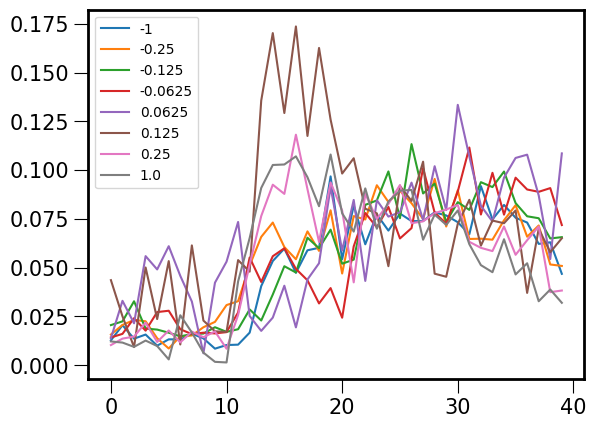

1/5 folds remaining ...
'79e56114-a12b-4571-bee3-a5cdd2145ea1'
17/23 regions remaining ...
COPY: 17 PIDs
pulling data from ibl database ..
eid: 8c025071-c4f3-426c-9aed-f149e8f75b7b
pid: 93a76e52-fed0-494f-8852-2b978f56a8e7
number of trials found: 465
found 465 trials from 84.13 to 5117.58 sec.
found 420 Kilosort units in region copy


Compute spike count: 100%|████████████████████| 465/465 [00:05<00:00, 78.75it/s]


pulling data from ibl database ..
eid: f819d499-8bf7-4da0-a431-15377a8319d5
pid: 4ea45238-55b1-4d54-ba92-efa47feb9f57
number of trials found: 384
found 384 trials from 146.45 to 3112.39 sec.
found 54 Kilosort units in region copy


Compute spike count: 100%|██████████████████| 384/384 [00:00<00:00, 1710.67it/s]


pulling data from ibl database ..
eid: 537677fe-1e24-4755-948c-fa4a4e8ecce5
pid: 76f16631-cbf7-4883-9437-4e8d8c4f34a3
number of trials found: 416
found 416 trials from 28.04 to 2700.84 sec.
found 2 Kilosort units in region copy


Compute spike count: 100%|█████████████████| 416/416 [00:00<00:00, 18919.28it/s]


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 72 Kilosort units in region copy


Compute spike count: 100%|██████████████████| 515/515 [00:00<00:00, 1942.77it/s]


pulling data from ibl database ..
eid: ff96bfe1-d925-4553-94b5-bf8297adf259
pid: 86553ccc-2e51-4cfb-a8e6-80da6860c8d9
number of trials found: 366
found 366 trials from 46.90 to 3170.69 sec.
found 54 Kilosort units in region copy


Compute spike count: 100%|██████████████████| 366/366 [00:00<00:00, 1750.95it/s]


pulling data from ibl database ..
eid: 91e04f86-89df-4dec-a8f8-fa915c9a5f1a
pid: 37137b1d-34d4-4183-9796-abfc9ffb6abe
number of trials found: 480
found 480 trials from 20.33 to 2207.56 sec.
found 78 Kilosort units in region copy


Compute spike count: 100%|███████████████████| 480/480 [00:00<00:00, 582.01it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 58b271d5-f728-4de8-b2ae-51908931247c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 28 Kilosort units in region copy


Compute spike count: 100%|█████████████████| 427/427 [00:00<00:00, 10229.13it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 25e75514-43e1-4c07-9fea-581bd203b55c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 45 Kilosort units in region copy


Compute spike count: 100%|██████████████████| 427/427 [00:00<00:00, 2045.24it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: 0228bcfd-632e-49bd-acd4-c334cf9213e9
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 107 Kilosort units in region copy


Compute spike count: 100%|███████████████████| 834/834 [00:01<00:00, 498.22it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: ffb1b072-2de7-44a4-8115-5799b9866382
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 29 Kilosort units in region copy


Compute spike count: 100%|██████████████████| 834/834 [00:00<00:00, 1561.84it/s]


pulling data from ibl database ..
eid: 8c025071-c4f3-426c-9aed-f149e8f75b7b
pid: 93a76e52-fed0-494f-8852-2b978f56a8e7
number of trials found: 465
found 465 trials from 84.13 to 5117.58 sec.
found 39 good units in region copy


Compute spike count: 100%|███████████████████| 465/465 [00:00<00:00, 715.55it/s]


pulling data from ibl database ..
eid: f819d499-8bf7-4da0-a431-15377a8319d5
pid: 4ea45238-55b1-4d54-ba92-efa47feb9f57
number of trials found: 384
found 384 trials from 146.45 to 3112.39 sec.
found 1 good units in region copy


Compute spike count: 100%|█████████████████| 384/384 [00:00<00:00, 13515.59it/s]


pulling data from ibl database ..
eid: 537677fe-1e24-4755-948c-fa4a4e8ecce5
pid: 76f16631-cbf7-4883-9437-4e8d8c4f34a3
number of trials found: 416
found 416 trials from 28.04 to 2700.84 sec.
found 0 good units in region copy


Compute spike count: 100%|█████████████████| 416/416 [00:00<00:00, 43432.91it/s]


pulling data from ibl database ..
eid: fc43390d-457e-463a-9fd4-b94a0a8b48f5
pid: 89606895-287e-4559-8536-9830b047af34
number of trials found: 515
found 515 trials from 102.23 to 2952.55 sec.
found 4 good units in region copy


Compute spike count: 100%|█████████████████| 515/515 [00:00<00:00, 25194.69it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: ff96bfe1-d925-4553-94b5-bf8297adf259
pid: 86553ccc-2e51-4cfb-a8e6-80da6860c8d9
number of trials found: 366
found 366 trials from 46.90 to 3170.69 sec.
found 3 good units in region copy


Compute spike count: 100%|█████████████████| 366/366 [00:00<00:00, 24336.78it/s]


pulling data from ibl database ..
eid: 91e04f86-89df-4dec-a8f8-fa915c9a5f1a
pid: 37137b1d-34d4-4183-9796-abfc9ffb6abe
number of trials found: 480
found 480 trials from 20.33 to 2207.56 sec.
found 9 good units in region copy


Compute spike count: 100%|██████████████████| 480/480 [00:00<00:00, 1692.20it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 58b271d5-f728-4de8-b2ae-51908931247c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 4 good units in region copy


Compute spike count: 100%|█████████████████| 427/427 [00:00<00:00, 22013.42it/s]


pulling data from ibl database ..
eid: 9545aa05-3945-4054-a5c3-a259f7209d61
pid: 25e75514-43e1-4c07-9fea-581bd203b55c
number of trials found: 427
found 427 trials from 45.38 to 3036.57 sec.
found 3 good units in region copy


Compute spike count: 100%|█████████████████| 427/427 [00:00<00:00, 16006.65it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: 0228bcfd-632e-49bd-acd4-c334cf9213e9
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 5 good units in region copy


Compute spike count: 100%|██████████████████| 834/834 [00:00<00:00, 3953.36it/s]


pulling data from ibl database ..
eid: d3a2b25e-46d3-4f0b-ade6-4e32255f4c35
pid: ffb1b072-2de7-44a4-8115-5799b9866382
number of trials found: 834
found 834 trials from 42.12 to 4493.17 sec.
found 1 good units in region copy


Compute spike count: 100%|█████████████████| 834/834 [00:00<00:00, 28041.38it/s]

Start extracting V from trials with different contrasts ...


Epoch [500/5000], Loss: 11.35707431287504
Epoch [1000/5000], Loss: 3.22802664735142
Epoch [1500/5000], Loss: 1.115628471562839
Epoch [2000/5000], Loss: 0.6862639531839108
Epoch [2500/5000], Loss: 0.6003561253864669
Epoch [3000/5000], Loss: 0.5518999886606358
Epoch [3500/5000], Loss: 0.5055487655804112
Epoch [4000/5000], Loss: 0.4877913339570284
Epoch [4500/5000], Loss: 0.4685068039839503
Epoch [5000/5000], Loss: 0.45583540029687697


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


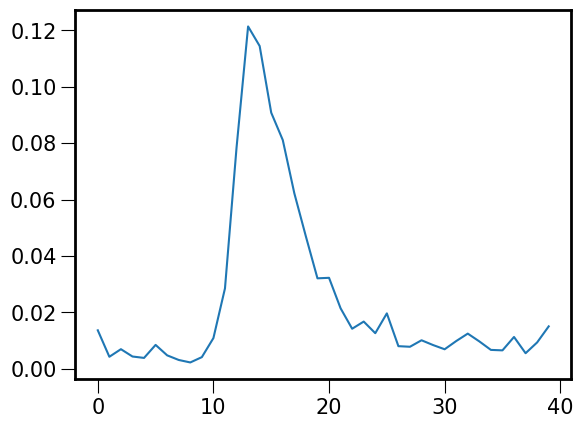

Epoch [500/5000], Loss: 6.612872257941039
Epoch [1000/5000], Loss: 0.9189054434308948
Epoch [1500/5000], Loss: 0.2406199943382789
Epoch [2000/5000], Loss: 0.1325781375372799
Epoch [2500/5000], Loss: 0.10701706931707794
Epoch [3000/5000], Loss: 0.09888360423177169
Epoch [3500/5000], Loss: 0.09571412970661514
Epoch [4000/5000], Loss: 0.09446829982307452
Epoch [4500/5000], Loss: 0.09398556239051105
Epoch [5000/5000], Loss: 0.09383670404335
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 0.991 auc: nan
task 5 test accuracy: 0.991 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 1.000 auc: 

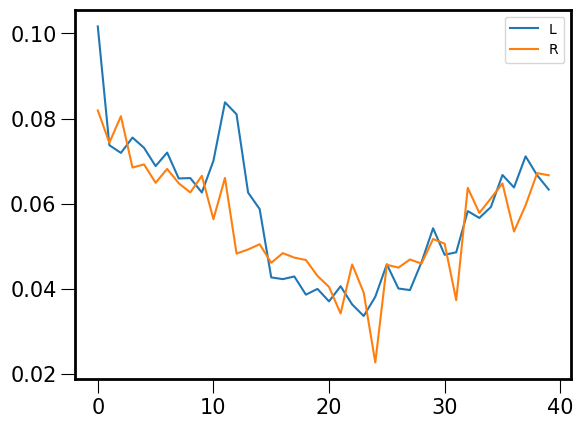

Epoch [500/5000], Loss: 12.962821695775226
Epoch [1000/5000], Loss: 1.871640371015162
Epoch [1500/5000], Loss: 0.5807334455192704
Epoch [2000/5000], Loss: 0.21630539988360833
Epoch [2500/5000], Loss: 0.14050397637923273
Epoch [3000/5000], Loss: 0.14098427696841187
Epoch [3500/5000], Loss: 0.14385288503491095
Epoch [4000/5000], Loss: 0.1465886311633284
Epoch [4500/5000], Loss: 0.14841539417489855
Epoch [5000/5000], Loss: 0.14953811780755752
task 0 train accuracy: 1.000 auc: 1.000
task 0 test accuracy: 1.000 auc: 1.000
task 1 train accuracy: 0.956 auc: 0.989
task 1 test accuracy: 0.956 auc: 0.989
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.977 auc: 0.929
task 3 test accuracy: 0.977 auc: 0.929
task 4 train accuracy: 1.000 auc: 1.000
task 4 test accuracy: 1.000 auc: 1.000
task 5 train accuracy: 0.959 auc: 1.000
task 5 test accuracy: 0.959 auc: 1.000
task 6 train accuracy: 0.959 auc: 1.000
task 6 test accuracy: 0.959 auc: 1.000
task 7 

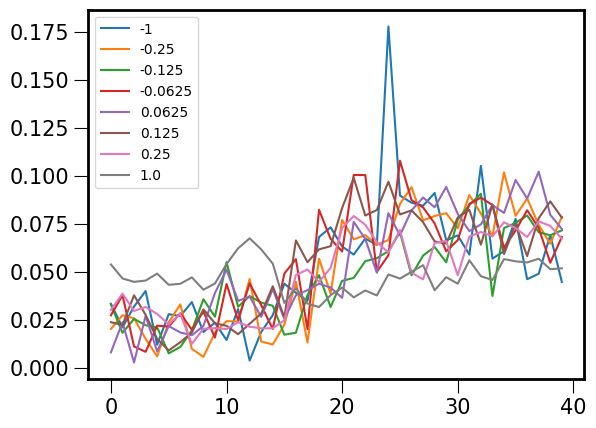

1/5 folds remaining ...
'76f16631-cbf7-4883-9437-4e8d8c4f34a3'
18/23 regions remaining ...
VAL: 12 PIDs
pulling data from ibl database ..
eid: 9fc31d79-b56f-46d0-92a0-e9563caf4a7a
pid: b8f3a7c3-b700-446b-8d29-69691c0e3b1d
number of trials found: 366
found 366 trials from 103.74 to 2687.25 sec.
found 1 Kilosort units in region val


Compute spike count: 100%|█████████████████| 366/366 [00:00<00:00, 33823.54it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 63c70ae8-4dfb-418b-b21b-f0b1e5fba6c9
pid: 335d689e-4d98-4532-b01b-7f7da89863c4
number of trials found: 786
found 786 trials from 164.72 to 4027.97 sec.
found 42 Kilosort units in region val


Compute spike count: 100%|██████████████████| 786/786 [00:00<00:00, 1122.26it/s]


pulling data from ibl database ..
eid: 948fd27b-507b-41b3-bdf8-f9f5f0af8e0b
pid: 41dc1107-fbcb-4174-a262-19928c355018
number of trials found: 537
found 537 trials from 24.72 to 3079.87 sec.
found 162 Kilosort units in region val


Compute spike count: 100%|███████████████████| 537/537 [00:04<00:00, 127.14it/s]


pulling data from ibl database ..
eid: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
pid: 79f44ba1-c931-4346-82eb-f628a9374045
number of trials found: 1013
found 1013 trials from 62.00 to 4751.17 sec.
found 19 Kilosort units in region val


Compute spike count: 100%|████████████████| 1013/1013 [00:00<00:00, 2528.90it/s]


pulling data from ibl database ..
eid: b01df337-2d31-4bcc-a1fe-7112afd50c50
pid: 72f89097-4836-4b67-a47a-edb3285a6e83
pulling data from ibl database ..
eid: 5adab0b7-dfd0-467d-b09d-43cb7ca5d59c
pid: 96fe2729-b5a2-4e77-92bb-9df410144768
number of trials found: 585
found 585 trials from 47.58 to 3415.37 sec.
found 204 Kilosort units in region val


Compute spike count: 100%|███████████████████| 585/585 [00:02<00:00, 201.72it/s]


pulling data from ibl database ..
eid: 9a629642-3a9c-42ed-b70a-532db0e86199
pid: 9f78a787-c6d5-4e51-b4fb-1552e81eccd5
number of trials found: 343
found 343 trials from 10.80 to 2844.95 sec.
found 219 Kilosort units in region val


Compute spike count: 100%|███████████████████| 343/343 [00:01<00:00, 248.30it/s]


pulling data from ibl database ..
eid: 034e726f-b35f-41e0-8d6c-a22cc32391fb
pid: 5e84c8e7-236f-4a64-a944-dc4a17c64f1d
number of trials found: 515
found 515 trials from 25.14 to 2728.80 sec.
found 125 Kilosort units in region val


Compute spike count: 100%|███████████████████| 515/515 [00:01<00:00, 312.65it/s]


pulling data from ibl database ..
eid: 5386aba9-9b97-4557-abcd-abc2da66b863
pid: 5810514e-2a86-4a34-b7bd-1e4b0b601295
number of trials found: 886
found 886 trials from 65.18 to 4524.04 sec.
found 78 Kilosort units in region val


Compute spike count: 100%|███████████████████| 886/886 [00:02<00:00, 297.91it/s]


pulling data from ibl database ..
eid: 741979ce-3f10-443a-8526-2275620c8473
pid: b7612153-372f-415a-9770-7101fbbbdc59
number of trials found: 544
found 544 trials from 10.14 to 2809.23 sec.
found 20 Kilosort units in region val


Compute spike count: 100%|██████████████████| 544/544 [00:00<00:00, 1945.54it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 9fc31d79-b56f-46d0-92a0-e9563caf4a7a
pid: b8f3a7c3-b700-446b-8d29-69691c0e3b1d
number of trials found: 366
found 366 trials from 103.74 to 2687.25 sec.
found 0 good units in region val


Compute spike count: 100%|█████████████████| 366/366 [00:00<00:00, 45264.94it/s]


pulling data from ibl database ..
eid: 63c70ae8-4dfb-418b-b21b-f0b1e5fba6c9
pid: 335d689e-4d98-4532-b01b-7f7da89863c4
number of trials found: 786
found 786 trials from 164.72 to 4027.97 sec.
found 8 good units in region val


Compute spike count: 100%|██████████████████| 786/786 [00:00<00:00, 4187.34it/s]


pulling data from ibl database ..
eid: 948fd27b-507b-41b3-bdf8-f9f5f0af8e0b
pid: 41dc1107-fbcb-4174-a262-19928c355018
number of trials found: 537
found 537 trials from 24.72 to 3079.87 sec.
found 19 good units in region val


Compute spike count: 100%|███████████████████| 537/537 [00:00<00:00, 732.04it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
pid: 79f44ba1-c931-4346-82eb-f628a9374045
number of trials found: 1013
found 1013 trials from 62.00 to 4751.17 sec.
found 0 good units in region val


Compute spike count: 100%|███████████████| 1013/1013 [00:00<00:00, 89402.00it/s]


pulling data from ibl database ..
eid: b01df337-2d31-4bcc-a1fe-7112afd50c50
pid: 72f89097-4836-4b67-a47a-edb3285a6e83
pulling data from ibl database ..
eid: 5adab0b7-dfd0-467d-b09d-43cb7ca5d59c
pid: 96fe2729-b5a2-4e77-92bb-9df410144768
number of trials found: 585
found 585 trials from 47.58 to 3415.37 sec.
found 18 good units in region val


Compute spike count: 100%|██████████████████| 585/585 [00:00<00:00, 1527.17it/s]


pulling data from ibl database ..
eid: 9a629642-3a9c-42ed-b70a-532db0e86199
pid: 9f78a787-c6d5-4e51-b4fb-1552e81eccd5
number of trials found: 343
found 343 trials from 10.80 to 2844.95 sec.
found 50 good units in region val


Compute spike count: 100%|██████████████████| 343/343 [00:00<00:00, 1046.10it/s]


pulling data from ibl database ..
eid: 034e726f-b35f-41e0-8d6c-a22cc32391fb
pid: 5e84c8e7-236f-4a64-a944-dc4a17c64f1d
number of trials found: 515
found 515 trials from 25.14 to 2728.80 sec.
found 10 good units in region val


Compute spike count: 100%|██████████████████| 515/515 [00:00<00:00, 1856.72it/s]


pulling data from ibl database ..
eid: 5386aba9-9b97-4557-abcd-abc2da66b863
pid: 5810514e-2a86-4a34-b7bd-1e4b0b601295
number of trials found: 886
found 886 trials from 65.18 to 4524.04 sec.
found 18 good units in region val


Compute spike count: 100%|██████████████████| 886/886 [00:00<00:00, 1407.41it/s]


pulling data from ibl database ..
eid: 741979ce-3f10-443a-8526-2275620c8473
pid: b7612153-372f-415a-9770-7101fbbbdc59
number of trials found: 544
found 544 trials from 10.14 to 2809.23 sec.
found 5 good units in region val


Compute spike count: 100%|██████████████████| 544/544 [00:00<00:00, 6760.82it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 14.883969885959571
Epoch [1000/5000], Loss: 4.124022359090059
Epoch [1500/5000], Loss: 1.2903710301090683
Epoch [2000/5000], Loss: 0.686817587083705
Epoch [2500/5000], Loss: 0.5481409794708678
Epoch [3000/5000], Loss: 0.47635504823914276
Epoch [3500/5000], Loss: 0.43489777218020786
Epoch [4000/5000], Loss: 0.41103015609440574
Epoch [4500/5000], Loss: 0.4004671168150738
Epoch [5000/5000], Loss: 0.3967066313421489


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


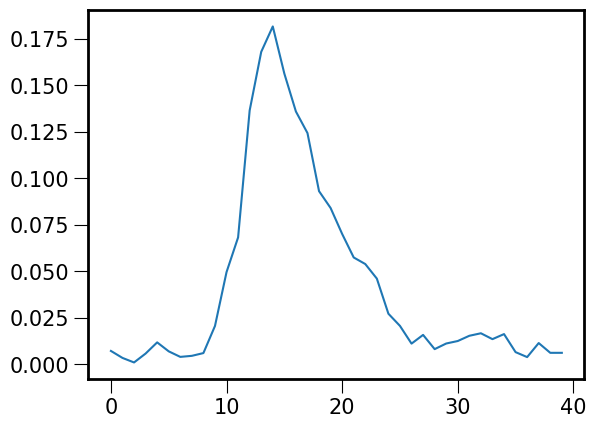

Epoch [500/5000], Loss: 5.046743545084795
Epoch [1000/5000], Loss: 0.5389558149621183
Epoch [1500/5000], Loss: 0.16801181451627853
Epoch [2000/5000], Loss: 0.10360709339266203
Epoch [2500/5000], Loss: 0.08976012735973711
Epoch [3000/5000], Loss: 0.08419710000604078
Epoch [3500/5000], Loss: 0.08149862821583784
Epoch [4000/5000], Loss: 0.08059554147487381
Epoch [4500/5000], Loss: 0.08049017888989202
Epoch [5000/5000], Loss: 0.08052158912320513
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 0.991 

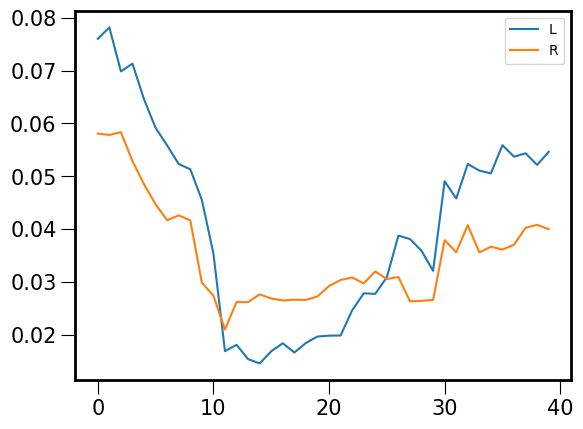

Epoch [500/5000], Loss: 10.849126729615556
Epoch [1000/5000], Loss: 2.6820445801156434
Epoch [1500/5000], Loss: 0.2796575251432062
Epoch [2000/5000], Loss: 0.11534878325545625
Epoch [2500/5000], Loss: 0.10024744131017232
Epoch [3000/5000], Loss: 0.09587937221926704
Epoch [3500/5000], Loss: 0.09441868483022675
Epoch [4000/5000], Loss: 0.09403343270044091
Epoch [4500/5000], Loss: 0.09437897392795136
Epoch [5000/5000], Loss: 0.09510378327485092
task 0 train accuracy: 0.968 auc: 1.000
task 0 test accuracy: 0.968 auc: 1.000
task 1 train accuracy: 1.000 auc: 1.000
task 1 test accuracy: 1.000 auc: 1.000
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.978 auc: 1.000
task 3 test accuracy: 0.978 auc: 1.000
task 4 train accuracy: 1.000 auc: 1.000
task 4 test accuracy: 1.000 auc: 1.000
task 5 train accuracy: 0.976 auc: 1.000
task 5 test accuracy: 0.976 auc: 1.000
task 6 train accuracy: 0.973 auc: 1.000
task 6 test accuracy: 0.973 auc: 1.000
task 

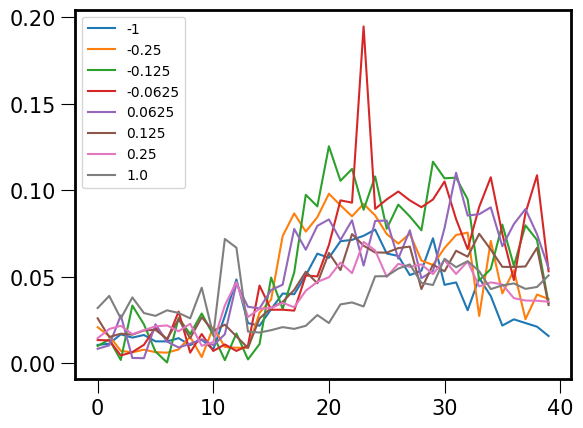

1/5 folds remaining ...
'b8f3a7c3-b700-446b-8d29-69691c0e3b1d'
19/23 regions remaining ...
ORBvl: 10 PIDs
pulling data from ibl database ..
eid: 08102cfc-a040-4bcf-b63c-faa0f4914a6f
pid: f7c49002-6565-4314-83f7-19b9a16d8e61
number of trials found: 349
found 349 trials from 74.69 to 3867.20 sec.
found 103 Kilosort units in region orbvl


Compute spike count: 100%|██████████████████| 349/349 [00:00<00:00, 1290.73it/s]


pulling data from ibl database ..
eid: 3f6e25ae-c007-4dc3-aa77-450fd5705046
pid: be95fb3b-d607-409a-968e-98a3e9bcb577
number of trials found: 351
found 351 trials from 42.66 to 1843.41 sec.
found 16 Kilosort units in region orbvl


Compute spike count: 100%|█████████████████| 351/351 [00:00<00:00, 14929.68it/s]


pulling data from ibl database ..
eid: dfbe628d-365b-461c-a07f-8b9911ba83aa
pid: df350b09-a420-42bb-9952-17862cbb9f1c
number of trials found: 658
found 658 trials from 15.94 to 4017.89 sec.
found 511 Kilosort units in region orbvl


Compute spike count: 100%|███████████████████| 658/658 [00:06<00:00, 103.90it/s]


pulling data from ibl database ..
eid: 4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a
pid: 6638cfb3-3831-4fc2-9327-194b76cf22e1
number of trials found: 461
found 461 trials from 270.23 to 2739.41 sec.
found 0 Kilosort units in region orbvl


Compute spike count: 100%|█████████████████| 461/461 [00:00<00:00, 89488.32it/s]


pulling data from ibl database ..
eid: 4d8c7767-981c-4347-8e5e-5d5fffe38534
pid: 749cb2b7-e57e-4453-a794-f6230e4d0226
number of trials found: 671
found 671 trials from 141.51 to 3991.64 sec.
found 222 Kilosort units in region orbvl


Compute spike count: 100%|███████████████████| 671/671 [00:01<00:00, 668.63it/s]


pulling data from ibl database ..
eid: 8207abc6-6b23-4762-92b4-82e05bed5143
pid: 9bd71ac6-c455-41f3-8c56-59987a649ac4
number of trials found: 648
found 648 trials from 93.44 to 5974.33 sec.
found 366 Kilosort units in region orbvl


Compute spike count: 100%|███████████████████| 648/648 [00:03<00:00, 170.39it/s]


pulling data from ibl database ..
eid: 1191f865-b10a-45c8-9c48-24a980fd9402
pid: 62a97aee-9f8b-40be-9ea7-f785ede30df8
number of trials found: 850
found 850 trials from 135.08 to 4880.78 sec.
found 383 Kilosort units in region orbvl


Compute spike count: 100%|███████████████████| 850/850 [00:07<00:00, 115.12it/s]


pulling data from ibl database ..
eid: 2e6e179c-fccc-4e8f-9448-ce5b6858a183
pid: 9f99bd34-40d4-4aac-ae2b-7bc7f7086ccb
number of trials found: 481
found 481 trials from 92.90 to 3446.72 sec.
found 73 Kilosort units in region orbvl


Compute spike count: 100%|██████████████████| 481/481 [00:00<00:00, 3700.98it/s]


pulling data from ibl database ..
eid: d33baf74-263c-4b37-a0d0-b79dcb80a764
pid: 2ce1d485-ebce-41a2-a5ce-aa109d5a13a3
number of trials found: 383
found 383 trials from 19.31 to 3129.15 sec.
found 273 Kilosort units in region orbvl


Compute spike count: 100%|███████████████████| 383/383 [00:00<00:00, 768.00it/s]


pulling data from ibl database ..
eid: dd4da095-4a99-4bf3-9727-f735077dba66
pid: 5a34d971-1cb3-4f0e-8dfe-e51e2313a668
number of trials found: 350
found 350 trials from 11.84 to 1969.09 sec.
found 289 Kilosort units in region orbvl


Compute spike count: 100%|███████████████████| 350/350 [00:00<00:00, 524.78it/s]


pulling data from ibl database ..
eid: 08102cfc-a040-4bcf-b63c-faa0f4914a6f
pid: f7c49002-6565-4314-83f7-19b9a16d8e61
number of trials found: 349
found 349 trials from 74.69 to 3867.20 sec.
found 17 good units in region orbvl


Compute spike count: 100%|██████████████████| 349/349 [00:00<00:00, 9556.34it/s]


pulling data from ibl database ..
eid: 3f6e25ae-c007-4dc3-aa77-450fd5705046
pid: be95fb3b-d607-409a-968e-98a3e9bcb577
number of trials found: 351
found 351 trials from 42.66 to 1843.41 sec.
found 4 good units in region orbvl


Compute spike count: 100%|█████████████████| 351/351 [00:00<00:00, 21080.53it/s]


pulling data from ibl database ..
eid: dfbe628d-365b-461c-a07f-8b9911ba83aa
pid: df350b09-a420-42bb-9952-17862cbb9f1c
number of trials found: 658
found 658 trials from 15.94 to 4017.89 sec.
found 84 good units in region orbvl


Compute spike count: 100%|███████████████████| 658/658 [00:00<00:00, 707.35it/s]


pulling data from ibl database ..
eid: 4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a
pid: 6638cfb3-3831-4fc2-9327-194b76cf22e1
number of trials found: 461
found 461 trials from 270.23 to 2739.41 sec.
found 0 good units in region orbvl


Compute spike count: 100%|█████████████████| 461/461 [00:00<00:00, 92706.24it/s]


pulling data from ibl database ..
eid: 4d8c7767-981c-4347-8e5e-5d5fffe38534
pid: 749cb2b7-e57e-4453-a794-f6230e4d0226
number of trials found: 671
found 671 trials from 141.51 to 3991.64 sec.
found 48 good units in region orbvl


Compute spike count: 100%|██████████████████| 671/671 [00:00<00:00, 2480.97it/s]


pulling data from ibl database ..
eid: 8207abc6-6b23-4762-92b4-82e05bed5143
pid: 9bd71ac6-c455-41f3-8c56-59987a649ac4
number of trials found: 648
found 648 trials from 93.44 to 5974.33 sec.
found 57 good units in region orbvl


Compute spike count: 100%|██████████████████| 648/648 [00:00<00:00, 1021.24it/s]


pulling data from ibl database ..
eid: 1191f865-b10a-45c8-9c48-24a980fd9402
pid: 62a97aee-9f8b-40be-9ea7-f785ede30df8
number of trials found: 850
found 850 trials from 135.08 to 4880.78 sec.
found 107 good units in region orbvl


Compute spike count: 100%|███████████████████| 850/850 [00:01<00:00, 481.74it/s]


pulling data from ibl database ..
eid: 2e6e179c-fccc-4e8f-9448-ce5b6858a183
pid: 9f99bd34-40d4-4aac-ae2b-7bc7f7086ccb
number of trials found: 481
found 481 trials from 92.90 to 3446.72 sec.
found 9 good units in region orbvl


Compute spike count: 100%|█████████████████| 481/481 [00:00<00:00, 12995.50it/s]


pulling data from ibl database ..
eid: d33baf74-263c-4b37-a0d0-b79dcb80a764
pid: 2ce1d485-ebce-41a2-a5ce-aa109d5a13a3
number of trials found: 383
found 383 trials from 19.31 to 3129.15 sec.
found 108 good units in region orbvl


Compute spike count: 100%|██████████████████| 383/383 [00:00<00:00, 2019.25it/s]


pulling data from ibl database ..
eid: dd4da095-4a99-4bf3-9727-f735077dba66
pid: 5a34d971-1cb3-4f0e-8dfe-e51e2313a668
number of trials found: 350
found 350 trials from 11.84 to 1969.09 sec.
found 80 good units in region orbvl


Compute spike count: 100%|██████████████████| 350/350 [00:00<00:00, 1402.82it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 21.9451169352357
Epoch [1000/5000], Loss: 7.2067747853690936
Epoch [1500/5000], Loss: 1.337852706007875
Epoch [2000/5000], Loss: 0.6205035417877587
Epoch [2500/5000], Loss: 0.5176696441210605
Epoch [3000/5000], Loss: 0.42291058330737874
Epoch [3500/5000], Loss: 0.37092314249292924
Epoch [4000/5000], Loss: 0.34963478057515884
Epoch [4500/5000], Loss: 0.3412177244335466
Epoch [5000/5000], Loss: 0.3384388954401987


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


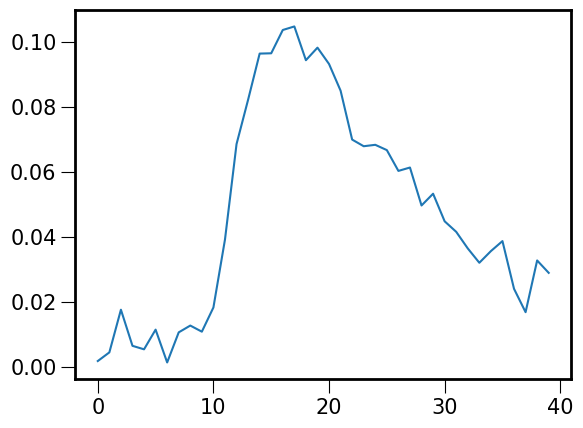

Epoch [500/5000], Loss: 11.186356275223886
Epoch [1000/5000], Loss: 2.1366152059716423
Epoch [1500/5000], Loss: 0.33621912193315756
Epoch [2000/5000], Loss: 0.1265781611425785
Epoch [2500/5000], Loss: 0.08244109375362828
Epoch [3000/5000], Loss: 0.07332319626155889
Epoch [3500/5000], Loss: 0.0714547234943135
Epoch [4000/5000], Loss: 0.07129253918801466
Epoch [4500/5000], Loss: 0.07161229723031519
Epoch [5000/5000], Loss: 0.07194998575546929
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 0.985 auc: nan
task 1 test accuracy: 0.985 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 1.000 auc: nan
task 4 test accuracy: 1.000 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 train accuracy: 1.000 a

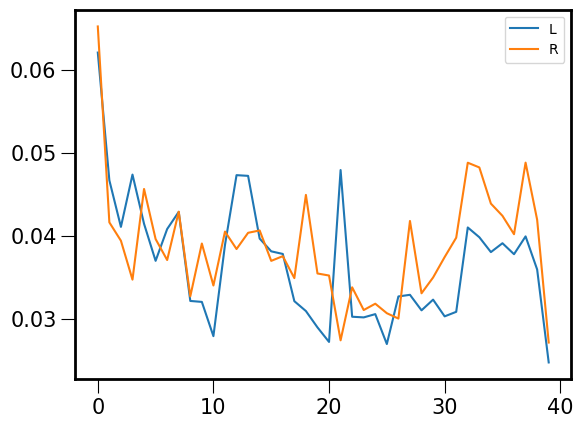

Epoch [500/5000], Loss: 14.893463155028899
Epoch [1000/5000], Loss: 1.4689022660667537
Epoch [1500/5000], Loss: 0.24467807328550054
Epoch [2000/5000], Loss: 0.079246727751526
Epoch [2500/5000], Loss: 0.08094113074835912
Epoch [3000/5000], Loss: 0.08214363853806858
Epoch [3500/5000], Loss: 0.08136085315048669
Epoch [4000/5000], Loss: 0.08105494960584739
Epoch [4500/5000], Loss: 0.08112726207506385
Epoch [5000/5000], Loss: 0.0812792548834423
task 0 train accuracy: 0.981 auc: 1.000
task 0 test accuracy: 0.981 auc: 1.000
task 1 train accuracy: 0.944 auc: 0.324
task 1 test accuracy: 0.944 auc: 0.324
task 2 train accuracy: 1.000 auc: 1.000
task 2 test accuracy: 1.000 auc: 1.000
task 3 train accuracy: 0.990 auc: 1.000
task 3 test accuracy: 0.990 auc: 1.000
task 4 train accuracy: 1.000 auc: 1.000
task 4 test accuracy: 1.000 auc: 1.000
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 1.000 auc: nan
task 6 test accuracy: 1.000 auc: nan
task 7 trai

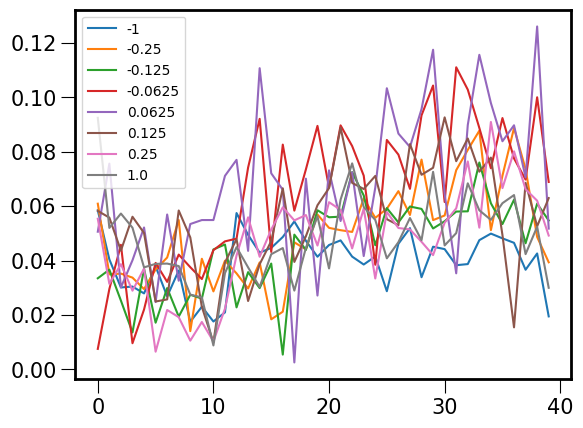

1/5 folds remaining ...
'6638cfb3-3831-4fc2-9327-194b76cf22e1'
20/23 regions remaining ...
Alv: 218 PIDs
pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 1 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 470/470 [00:00<00:00, 63492.75it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 5ae68c54-2897-4d3a-8120-426150704385
pid: a8a59fc3-a658-4db4-b5e8-09f1e4df03fd
number of trials found: 631
found 631 trials from 17.05 to 4524.18 sec.
found 1 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 631/631 [00:00<00:00, 67000.98it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 1 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 715/715 [00:00<00:00, 52487.53it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: e6594a5b-552c-421a-b376-1a1baa9dc4fd
pid: 9b5fec96-9f19-4ddf-ba1c-3175e15245e9
number of trials found: 353
found 353 trials from 66.19 to 3273.68 sec.
found 23 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 353/353 [00:00<00:00, 22788.82it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 3 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 13869.87it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: b72b22c2-6e9d-4604-9910-20c0e1a467d7
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 6 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 19929.38it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: 49c2ea3d-2b50-4e8a-b124-9e190960784e
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 15 Kilosort units in region alv


Compute spike count: 100%|██████████████████| 432/432 [00:00<00:00, 7387.50it/s]


pulling data from ibl database ..
eid: 5437ec1f-6535-470c-80b8-4c8806ee085d
pid: b9faf068-fd1c-4568-8a1a-f503eed6f726
number of trials found: 458
found 458 trials from 70.85 to 2758.87 sec.
found 0 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 458/458 [00:00<00:00, 69349.86it/s]


pulling data from ibl database ..
eid: a2b9fbbe-79fc-4166-a16e-b307813a2f06
pid: d552cffa-b662-40bd-b1e3-98d0a8face2c
number of trials found: 412
found 412 trials from 63.48 to 2739.81 sec.
found 1 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 412/412 [00:00<00:00, 14796.37it/s]


pulling data from ibl database ..
eid: f56194bc-8215-4ae8-bc6a-89781ad8e050
pid: 18d316bf-d322-4c5c-814e-a58147f7bf5f
number of trials found: 612
found 612 trials from 175.19 to 3798.77 sec.
found 1 Kilosort units in region alv


Compute spike count: 100%|█████████████████| 612/612 [00:00<00:00, 85398.70it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 470/470 [00:00<00:00, 94634.10it/s]


pulling data from ibl database ..
eid: 5ae68c54-2897-4d3a-8120-426150704385
pid: a8a59fc3-a658-4db4-b5e8-09f1e4df03fd
number of trials found: 631
found 631 trials from 17.05 to 4524.18 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 631/631 [00:00<00:00, 87176.98it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 715/715 [00:00<00:00, 89445.46it/s]


pulling data from ibl database ..
eid: e6594a5b-552c-421a-b376-1a1baa9dc4fd
pid: 9b5fec96-9f19-4ddf-ba1c-3175e15245e9
number of trials found: 353
found 353 trials from 66.19 to 3273.68 sec.
found 1 good units in region alv


Compute spike count: 100%|█████████████████| 353/353 [00:00<00:00, 46500.92it/s]


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 92437.87it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: b72b22c2-6e9d-4604-9910-20c0e1a467d7
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 91079.69it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: 49c2ea3d-2b50-4e8a-b124-9e190960784e
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 2 good units in region alv


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 44339.64it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 5437ec1f-6535-470c-80b8-4c8806ee085d
pid: b9faf068-fd1c-4568-8a1a-f503eed6f726
number of trials found: 458
found 458 trials from 70.85 to 2758.87 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 458/458 [00:00<00:00, 81992.03it/s]


pulling data from ibl database ..
eid: a2b9fbbe-79fc-4166-a16e-b307813a2f06
pid: d552cffa-b662-40bd-b1e3-98d0a8face2c
number of trials found: 412
found 412 trials from 63.48 to 2739.81 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 412/412 [00:00<00:00, 89462.27it/s]


pulling data from ibl database ..
eid: f56194bc-8215-4ae8-bc6a-89781ad8e050
pid: 18d316bf-d322-4c5c-814e-a58147f7bf5f
number of trials found: 612
found 612 trials from 175.19 to 3798.77 sec.
found 0 good units in region alv


Compute spike count: 100%|█████████████████| 612/612 [00:00<00:00, 89442.63it/s]

Start extracting V from trials with different contrasts ...


Epoch [500/5000], Loss: 3.235784649440818
Epoch [1000/5000], Loss: 1.2781735050639664
Epoch [1500/5000], Loss: 0.8128192354583852
Epoch [2000/5000], Loss: 0.6476030175248011
Epoch [2500/5000], Loss: 0.6135347980436945
Epoch [3000/5000], Loss: 0.6103263935414271
Epoch [3500/5000], Loss: 0.6078219901896529
Epoch [4000/5000], Loss: 0.6048390573137289
Epoch [4500/5000], Loss: 0.6023211007830716
Epoch [5000/5000], Loss: 0.6004951025685892


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


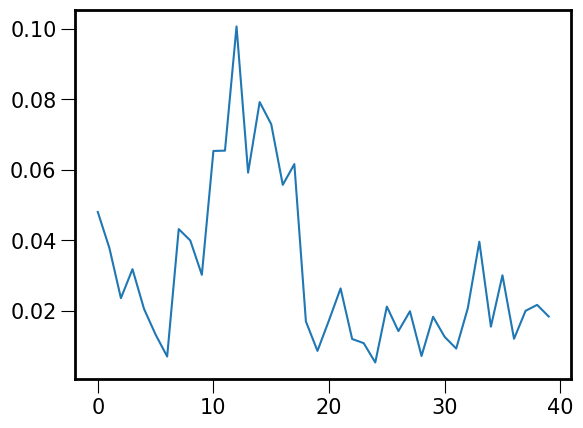

Epoch [500/5000], Loss: 7.746600591948939
Epoch [1000/5000], Loss: 3.2321005986853413
Epoch [1500/5000], Loss: 0.7894619503162565
Epoch [2000/5000], Loss: 0.24695112301864103
Epoch [2500/5000], Loss: 0.1996228238584076
Epoch [3000/5000], Loss: 0.19178740763700153
Epoch [3500/5000], Loss: 0.1808833781867139
Epoch [4000/5000], Loss: 0.17249678797457993
Epoch [4500/5000], Loss: 0.16805583154541953
Epoch [5000/5000], Loss: 0.16535260770452959
task 0 train accuracy: 0.994 auc: nan
task 0 test accuracy: 0.994 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
Epoch [500/5000], Loss: 3.857605615455543
Epoch [1000/5000], Loss: 0.7310970424425869
Epoch [1500/5000], Loss: 0.24308687751179622
Epoch [2000/5000], Loss: 0.19323640208474607
Epoch [2500/5000], Loss: 0.16954658682667534
Epoch [3000/5000], Loss: 0.1606998992328963
Epoch [3500/5000], Loss: 0.15935297842890916
Epoch [4000/5000], Loss: 0.16003588965264487
Epoch [4500/5000], Loss: 0.16124928176423753
Epoch [

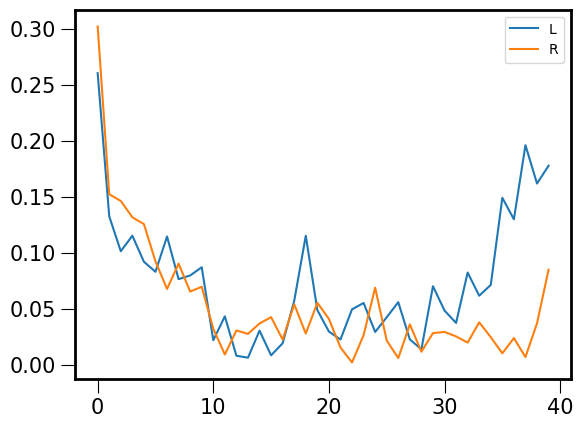

Epoch [500/5000], Loss: 1.2974975213713653
Epoch [1000/5000], Loss: 0.29423695279671536
Epoch [1500/5000], Loss: 0.14998651662064763
Epoch [2000/5000], Loss: 0.12896969686782886
Epoch [2500/5000], Loss: 0.12900252926730355
Epoch [3000/5000], Loss: 0.13483240334545665
Epoch [3500/5000], Loss: 0.13656806999939475
Epoch [4000/5000], Loss: 0.1361465838379455
Epoch [4500/5000], Loss: 0.13588225702306553
Epoch [5000/5000], Loss: 0.1350215949613236
task 0 train accuracy: 0.974 auc: 0.966
task 0 test accuracy: 0.974 auc: 0.966
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
Epoch [500/5000], Loss: 1.9017740945250432
Epoch [1000/5000], Loss: 0.9875207624789869
Epoch [1500/5000], Loss: 0.4400716815879403
Epoch [2000/5000], Loss: 0.20930501406125895
Epoch [2500/5000], Loss: 0.19468563782623458
Epoch [3000/5000], Loss: 0.18891844315312586
Epoch [3500/5000], Loss: 0.18309386498937788
Epoch [4000/5000], Loss: 0.18076443728400482
Epoch [4500/5000], Loss: 0.18022486148798209

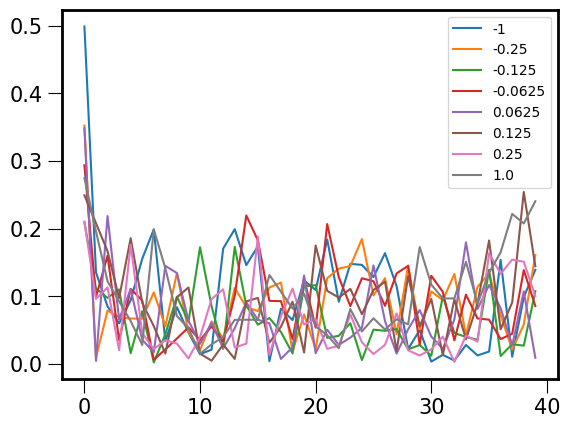

1/5 folds remaining ...
'8c732bf2-639d-496c-bf82-464bc9c2d54b'
21/23 regions remaining ...
FRP: 11 PIDs
pulling data from ibl database ..
eid: 752456f3-9f47-4fbf-bd44-9d131c0f41aa
pid: d591a59c-b49b-46ba-a914-df379ada9813
number of trials found: 454
found 454 trials from 119.82 to 3984.13 sec.
found 22 Kilosort units in region frp


Compute spike count: 100%|█████████████████| 454/454 [00:00<00:00, 25661.19it/s]


pulling data from ibl database ..
eid: 6b0b5d24-bcda-4053-a59c-beaa1fe03b8f
pid: ff5fceaf-8247-42ab-a187-f7876441899d
number of trials found: 599
found 599 trials from 127.52 to 3501.13 sec.
found 72 Kilosort units in region frp


Compute spike count: 100%|██████████████████| 599/599 [00:00<00:00, 1989.85it/s]


pulling data from ibl database ..
eid: 08102cfc-a040-4bcf-b63c-faa0f4914a6f
pid: f7c49002-6565-4314-83f7-19b9a16d8e61
number of trials found: 349
found 349 trials from 74.69 to 3867.20 sec.
found 27 Kilosort units in region frp


Compute spike count: 100%|██████████████████| 349/349 [00:00<00:00, 6891.15it/s]


pulling data from ibl database ..
eid: dfbe628d-365b-461c-a07f-8b9911ba83aa
pid: df350b09-a420-42bb-9952-17862cbb9f1c
number of trials found: 658
found 658 trials from 15.94 to 4017.89 sec.
found 14 Kilosort units in region frp


Compute spike count: 100%|██████████████████| 658/658 [00:00<00:00, 6433.81it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 360eac0c-7d2d-4cc1-9dcf-79fc7afc56e7
pid: 06c6741e-9f2a-4114-8ca9-0dc5ccc951e6
number of trials found: 533
found 533 trials from 43.95 to 4418.64 sec.
found 33 Kilosort units in region frp


Compute spike count: 100%|██████████████████| 533/533 [00:00<00:00, 3089.80it/s]


pulling data from ibl database ..
eid: 4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a
pid: 6638cfb3-3831-4fc2-9327-194b76cf22e1
number of trials found: 461
found 461 trials from 270.23 to 2739.41 sec.
found 131 Kilosort units in region frp


Compute spike count: 100%|██████████████████| 461/461 [00:00<00:00, 2241.08it/s]


pulling data from ibl database ..
eid: 4d8c7767-981c-4347-8e5e-5d5fffe38534
pid: 749cb2b7-e57e-4453-a794-f6230e4d0226
number of trials found: 671
found 671 trials from 141.51 to 3991.64 sec.
found 13 Kilosort units in region frp


Compute spike count: 100%|█████████████████| 671/671 [00:00<00:00, 11409.76it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 65f5c9b4-4440-48b9-b914-c593a5184a18
pid: b549e337-acc5-4837-9c56-e53b173fe5fe
number of trials found: 401
found 401 trials from 81.39 to 3166.79 sec.
found 40 Kilosort units in region frp


Compute spike count: 100%|██████████████████| 401/401 [00:00<00:00, 6198.67it/s]


pulling data from ibl database ..
eid: 8207abc6-6b23-4762-92b4-82e05bed5143
pid: 9bd71ac6-c455-41f3-8c56-59987a649ac4
number of trials found: 648
found 648 trials from 93.44 to 5974.33 sec.
found 8 Kilosort units in region frp


Compute spike count: 100%|█████████████████| 648/648 [00:00<00:00, 15227.58it/s]


pulling data from ibl database ..
eid: 1191f865-b10a-45c8-9c48-24a980fd9402
pid: 62a97aee-9f8b-40be-9ea7-f785ede30df8
number of trials found: 850
found 850 trials from 135.08 to 4880.78 sec.
found 27 Kilosort units in region frp


Compute spike count: 100%|██████████████████| 850/850 [00:00<00:00, 4033.61it/s]


pulling data from ibl database ..
eid: 752456f3-9f47-4fbf-bd44-9d131c0f41aa
pid: d591a59c-b49b-46ba-a914-df379ada9813
number of trials found: 454
found 454 trials from 119.82 to 3984.13 sec.
found 1 good units in region frp


Compute spike count: 100%|█████████████████| 454/454 [00:00<00:00, 66314.26it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 6b0b5d24-bcda-4053-a59c-beaa1fe03b8f
pid: ff5fceaf-8247-42ab-a187-f7876441899d
number of trials found: 599
found 599 trials from 127.52 to 3501.13 sec.
found 2 good units in region frp


Compute spike count: 100%|█████████████████| 599/599 [00:00<00:00, 24222.33it/s]


pulling data from ibl database ..
eid: 08102cfc-a040-4bcf-b63c-faa0f4914a6f
pid: f7c49002-6565-4314-83f7-19b9a16d8e61
number of trials found: 349
found 349 trials from 74.69 to 3867.20 sec.
found 2 good units in region frp


Compute spike count: 100%|█████████████████| 349/349 [00:00<00:00, 43685.45it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: dfbe628d-365b-461c-a07f-8b9911ba83aa
pid: df350b09-a420-42bb-9952-17862cbb9f1c
number of trials found: 658
found 658 trials from 15.94 to 4017.89 sec.
found 6 good units in region frp


Compute spike count: 100%|██████████████████| 658/658 [00:00<00:00, 9314.73it/s]


pulling data from ibl database ..
eid: 360eac0c-7d2d-4cc1-9dcf-79fc7afc56e7
pid: 06c6741e-9f2a-4114-8ca9-0dc5ccc951e6
number of trials found: 533
found 533 trials from 43.95 to 4418.64 sec.
found 7 good units in region frp


Compute spike count: 100%|█████████████████| 533/533 [00:00<00:00, 10965.31it/s]


pulling data from ibl database ..
eid: 4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a
pid: 6638cfb3-3831-4fc2-9327-194b76cf22e1
number of trials found: 461
found 461 trials from 270.23 to 2739.41 sec.
found 20 good units in region frp


Compute spike count: 100%|██████████████████| 461/461 [00:00<00:00, 8230.11it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 4d8c7767-981c-4347-8e5e-5d5fffe38534
pid: 749cb2b7-e57e-4453-a794-f6230e4d0226
number of trials found: 671
found 671 trials from 141.51 to 3991.64 sec.
found 4 good units in region frp


Compute spike count: 100%|█████████████████| 671/671 [00:00<00:00, 15463.87it/s]


pulling data from ibl database ..
eid: 65f5c9b4-4440-48b9-b914-c593a5184a18
pid: b549e337-acc5-4837-9c56-e53b173fe5fe
number of trials found: 401
found 401 trials from 81.39 to 3166.79 sec.
found 5 good units in region frp


Compute spike count: 100%|█████████████████| 401/401 [00:00<00:00, 13108.02it/s]


pulling data from ibl database ..
eid: 8207abc6-6b23-4762-92b4-82e05bed5143
pid: 9bd71ac6-c455-41f3-8c56-59987a649ac4
number of trials found: 648
found 648 trials from 93.44 to 5974.33 sec.
found 0 good units in region frp


Compute spike count: 100%|█████████████████| 648/648 [00:00<00:00, 86984.22it/s]


pulling data from ibl database ..
eid: 1191f865-b10a-45c8-9c48-24a980fd9402
pid: 62a97aee-9f8b-40be-9ea7-f785ede30df8
number of trials found: 850
found 850 trials from 135.08 to 4880.78 sec.
found 8 good units in region frp


Compute spike count: 100%|█████████████████| 850/850 [00:00<00:00, 12606.37it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 8.676508468947182
Epoch [1000/5000], Loss: 2.9694665986229722
Epoch [1500/5000], Loss: 1.1671471995303029
Epoch [2000/5000], Loss: 0.7043354699450393
Epoch [2500/5000], Loss: 0.5752711091120442
Epoch [3000/5000], Loss: 0.5335036414152858
Epoch [3500/5000], Loss: 0.5223293904053654
Epoch [4000/5000], Loss: 0.5220417662585609
Epoch [4500/5000], Loss: 0.5232032483908023
Epoch [5000/5000], Loss: 0.5238917212817115


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


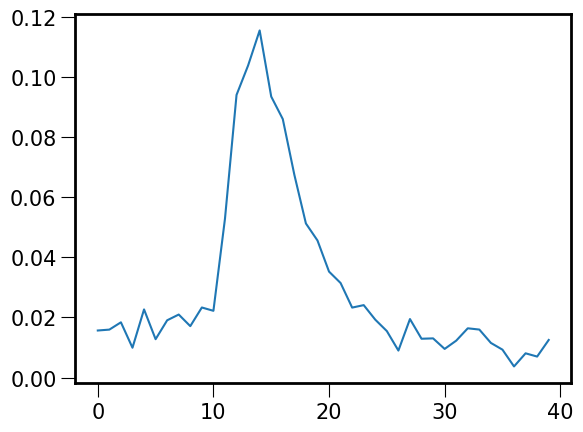

Epoch [500/5000], Loss: 7.451625215893383
Epoch [1000/5000], Loss: 1.9131630849746675
Epoch [1500/5000], Loss: 0.6930324304544482
Epoch [2000/5000], Loss: 0.39916879513884584
Epoch [2500/5000], Loss: 0.3189128638197351
Epoch [3000/5000], Loss: 0.24216590716206277
Epoch [3500/5000], Loss: 0.2296583617075683
Epoch [4000/5000], Loss: 0.2215400940984868
Epoch [4500/5000], Loss: 0.21331960578505343
Epoch [5000/5000], Loss: 0.20971093794359655
task 0 train accuracy: 0.996 auc: nan
task 0 test accuracy: 0.996 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
task 2 train accuracy: 1.000 auc: nan
task 2 test accuracy: 1.000 auc: nan
task 3 train accuracy: 0.972 auc: nan
task 3 test accuracy: 0.972 auc: nan
task 4 train accuracy: 0.996 auc: nan
task 4 test accuracy: 0.996 auc: nan
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 0.995 auc: nan
task 6 test accuracy: 0.995 auc: nan
task 7 train accuracy: 0.991 auc:

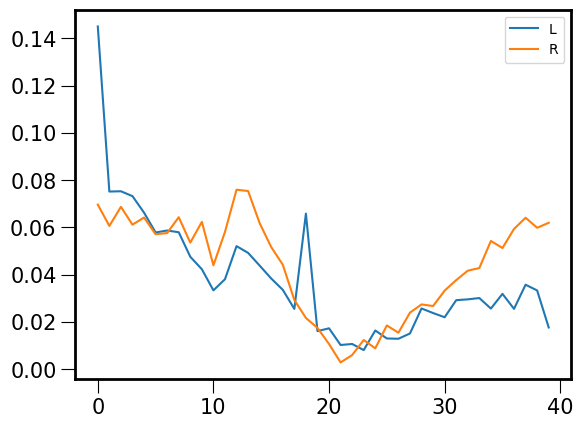

Epoch [500/5000], Loss: 5.908122089133631
Epoch [1000/5000], Loss: 1.257463336673852
Epoch [1500/5000], Loss: 0.5363467703805491
Epoch [2000/5000], Loss: 0.30560683507948583
Epoch [2500/5000], Loss: 0.2647445887487543
Epoch [3000/5000], Loss: 0.2462153163020687
Epoch [3500/5000], Loss: 0.23571217788655557
Epoch [4000/5000], Loss: 0.22971650683694847
Epoch [4500/5000], Loss: 0.22121639827573636
Epoch [5000/5000], Loss: 0.21132653699470072
task 0 train accuracy: 0.945 auc: 0.868
task 0 test accuracy: 0.945 auc: 0.868
task 1 train accuracy: 0.989 auc: 1.000
task 1 test accuracy: 0.989 auc: 1.000
task 2 train accuracy: 0.981 auc: 1.000
task 2 test accuracy: 0.981 auc: 1.000
task 3 train accuracy: 0.936 auc: 0.896
task 3 test accuracy: 0.936 auc: 0.896
task 4 train accuracy: 0.983 auc: 1.000
task 4 test accuracy: 0.983 auc: 1.000
task 5 train accuracy: 1.000 auc: nan
task 5 test accuracy: 1.000 auc: nan
task 6 train accuracy: 0.938 auc: 0.851
task 6 test accuracy: 0.938 auc: 0.851
task 7 tr

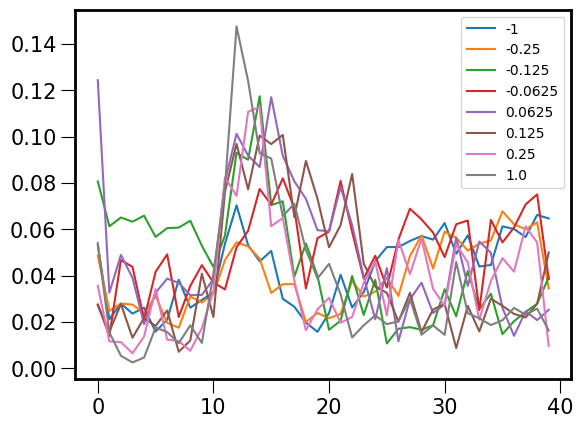

1/5 folds remaining ...
'9bd71ac6-c455-41f3-8c56-59987a649ac4'
22/23 regions remaining ...
STN: 4 PIDs
pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: bef05a5c-68c3-4513-87c7-b3151c88da8e
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 37 Kilosort units in region stn


Compute spike count: 100%|██████████████████| 489/489 [00:00<00:00, 1174.14it/s]


pulling data from ibl database ..
eid: 3bb54985-77b2-421d-9d1f-46185be51216
pid: 81950362-ed95-4662-997f-e119bbd594d1
number of trials found: 648
found 648 trials from 49.35 to 3147.13 sec.
found 6 Kilosort units in region stn


Compute spike count: 100%|██████████████████| 648/648 [00:00<00:00, 1668.42it/s]


pulling data from ibl database ..
eid: d7e60cc3-6020-429e-a654-636c6cc677ea
pid: 8ee585ba-d055-4bb5-bc5f-2266a3d62bf4
number of trials found: 422
found 422 trials from 114.75 to 3915.00 sec.
found 4 Kilosort units in region stn


Compute spike count: 100%|█████████████████| 422/422 [00:00<00:00, 12928.74it/s]


pulling data from ibl database ..
eid: 259927fd-7563-4b03-bc5d-17b4d0fa7a55
pid: 1d237afc-ac2f-4bac-a163-a397fe09819f
number of trials found: 555
found 555 trials from 17.44 to 3612.89 sec.
found 15 Kilosort units in region stn


Compute spike count: 100%|██████████████████| 555/555 [00:00<00:00, 1144.97it/s]


pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: bef05a5c-68c3-4513-87c7-b3151c88da8e
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 0 good units in region stn


Compute spike count: 100%|█████████████████| 489/489 [00:00<00:00, 81331.38it/s]


pulling data from ibl database ..
eid: 3bb54985-77b2-421d-9d1f-46185be51216
pid: 81950362-ed95-4662-997f-e119bbd594d1
number of trials found: 648
found 648 trials from 49.35 to 3147.13 sec.
found 0 good units in region stn


Compute spike count: 100%|█████████████████| 648/648 [00:00<00:00, 83725.86it/s]


pulling data from ibl database ..
eid: d7e60cc3-6020-429e-a654-636c6cc677ea
pid: 8ee585ba-d055-4bb5-bc5f-2266a3d62bf4
number of trials found: 422
found 422 trials from 114.75 to 3915.00 sec.
found 1 good units in region stn


Compute spike count: 100%|█████████████████| 422/422 [00:00<00:00, 22250.67it/s]


pulling data from ibl database ..
eid: 259927fd-7563-4b03-bc5d-17b4d0fa7a55
pid: 1d237afc-ac2f-4bac-a163-a397fe09819f
number of trials found: 555
found 555 trials from 17.44 to 3612.89 sec.
found 3 good units in region stn


Compute spike count: 100%|██████████████████| 555/555 [00:00<00:00, 4811.53it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 5.615803260008343
Epoch [1000/5000], Loss: 1.7931198942692104
Epoch [1500/5000], Loss: 0.8850510435370136
Epoch [2000/5000], Loss: 0.6719690753455047
Epoch [2500/5000], Loss: 0.6152034398107955
Epoch [3000/5000], Loss: 0.5977535000271076
Epoch [3500/5000], Loss: 0.5922097199592166
Epoch [4000/5000], Loss: 0.5916262702900589
Epoch [4500/5000], Loss: 0.593753698866748
Epoch [5000/5000], Loss: 0.5967774883555113


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


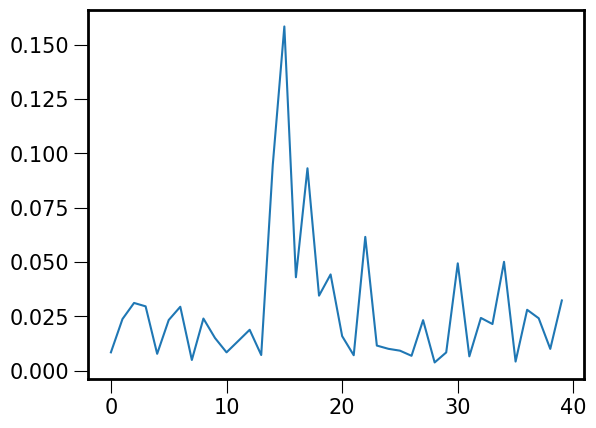

Epoch [500/5000], Loss: 2.7402369301850618
Epoch [1000/5000], Loss: 0.28516269981488823
Epoch [1500/5000], Loss: 0.07571200420699183
Epoch [2000/5000], Loss: 0.046322495264137994
Epoch [2500/5000], Loss: 0.03770364115291891
Epoch [3000/5000], Loss: 0.0391821462342308
Epoch [3500/5000], Loss: 0.041481209706846295
Epoch [4000/5000], Loss: 0.04352736083656922
Epoch [4500/5000], Loss: 0.04485901854005244
Epoch [5000/5000], Loss: 0.045448820735858
task 0 train accuracy: 0.996 auc: nan
task 0 test accuracy: 0.996 auc: nan
task 1 train accuracy: 1.000 auc: nan
task 1 test accuracy: 1.000 auc: nan
Epoch [500/5000], Loss: 1.772410338351776
Epoch [1000/5000], Loss: 0.19389922697447798
Epoch [1500/5000], Loss: 0.0644598991282633
Epoch [2000/5000], Loss: 0.04971429506165317
Epoch [2500/5000], Loss: 0.04964636685272316
Epoch [3000/5000], Loss: 0.04943936742794215
Epoch [3500/5000], Loss: 0.04840975941683551
Epoch [4000/5000], Loss: 0.04740787337127926
Epoch [4500/5000], Loss: 0.046740467936774395
E

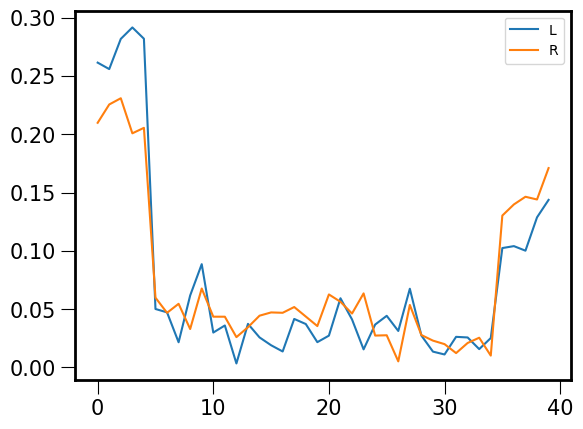

Epoch [500/5000], Loss: 1.928178480336133
Epoch [1000/5000], Loss: 0.5234192014580741
Epoch [1500/5000], Loss: 0.07269371392341205
Epoch [2000/5000], Loss: 0.06054905588117804
Epoch [2500/5000], Loss: 0.06436150567550858
Epoch [3000/5000], Loss: 0.0663679466166089
Epoch [3500/5000], Loss: 0.06747037729117095
Epoch [4000/5000], Loss: 0.0686726090684799
Epoch [4500/5000], Loss: 0.06906127326646787
Epoch [5000/5000], Loss: 0.0684059943779469
task 0 train accuracy: 1.000 auc: 1.000
task 0 test accuracy: 1.000 auc: 1.000
task 1 train accuracy: 0.985 auc: 0.955
task 1 test accuracy: 0.985 auc: 0.955
Epoch [500/5000], Loss: 4.9219658172915315
Epoch [1000/5000], Loss: 1.040344452330184
Epoch [1500/5000], Loss: 0.17265094115481905
Epoch [2000/5000], Loss: 0.07178374604111651
Epoch [2500/5000], Loss: 0.07154586380069224
Epoch [3000/5000], Loss: 0.07463643326545336
Epoch [3500/5000], Loss: 0.07708348574432525
Epoch [4000/5000], Loss: 0.07811974714970679
Epoch [4500/5000], Loss: 0.0786691931200131

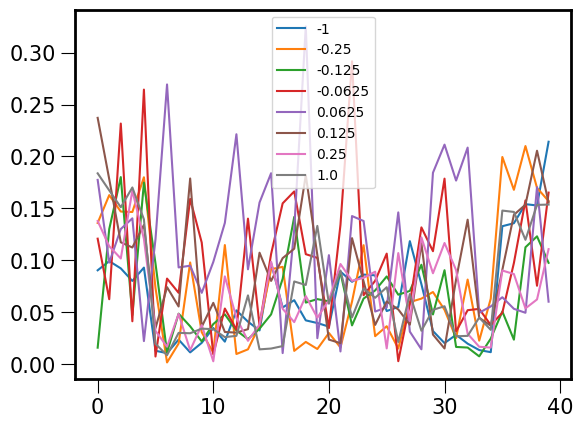

1/5 folds remaining ...
'81950362-ed95-4662-997f-e119bbd594d1'
23/23 regions remaining ...
APr: 9 PIDs
pulling data from ibl database ..
eid: a1782f4f-86b0-480c-a7f2-3d8f1ab482ab
pid: 38e9e5b8-db29-4158-a09d-cc1de4a1365a
number of trials found: 650
found 650 trials from 13.07 to 3575.32 sec.
found 63 Kilosort units in region apr


Compute spike count: 100%|██████████████████| 650/650 [00:00<00:00, 3222.24it/s]


pulling data from ibl database ..
eid: 1dbba733-24a4-4400-9436-53f1bd8428e8
pid: ec1e2af7-c107-4a18-ab05-cefb9174d516
number of trials found: 557
found 557 trials from 97.94 to 2721.38 sec.
found 14 Kilosort units in region apr


Compute spike count: 100%|██████████████████| 557/557 [00:00<00:00, 4724.84it/s]


pulling data from ibl database ..
eid: dc21e80d-97d7-44ca-a729-a8e3f9b14305
pid: 176b4fe3-f570-4d9f-9e25-a5d218f75c8b
number of trials found: 941
found 941 trials from 42.67 to 4979.66 sec.
found 5 Kilosort units in region apr


Compute spike count: 100%|██████████████████| 941/941 [00:00<00:00, 5701.24it/s]


pulling data from ibl database ..
eid: 7416f387-b302-4ca3-8daf-03b585a1b7ec
pid: caf2170c-5463-46ce-8cd0-66f2e1e3376d
number of trials found: 419
found 419 trials from 52.44 to 3342.18 sec.
found 0 Kilosort units in region apr


Compute spike count: 100%|█████████████████| 419/419 [00:00<00:00, 85832.16it/s]


pulling data from ibl database ..
eid: 45ef6691-7b80-4a43-bd1a-85fc00851ae8
pid: 578ca001-8cf5-4d30-b58f-1d574eaf808a
number of trials found: 566
found 566 trials from 51.55 to 3384.17 sec.
found 2 Kilosort units in region apr


Compute spike count: 100%|█████████████████| 566/566 [00:00<00:00, 35872.59it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: e012d3e3-fdbc-4661-9ffa-5fa284e4e706
pid: 2400a2fa-0335-480b-ac8d-a478171f3a55
number of trials found: 630
found 630 trials from 19.24 to 3323.51 sec.
found 3 Kilosort units in region apr


Compute spike count: 100%|█████████████████| 630/630 [00:00<00:00, 11993.79it/s]


pulling data from ibl database ..
eid: e349a2e7-50a3-47ca-bc45-20d1899854ec
pid: 3bd1f88b-4e0c-43a6-9483-3305e82f2fae
number of trials found: 887
found 887 trials from 45.17 to 4263.96 sec.
found 13 Kilosort units in region apr


Compute spike count: 100%|█████████████████| 887/887 [00:00<00:00, 17236.68it/s]


pulling data from ibl database ..
eid: a19c7a3a-7261-42ce-95d5-1f4ca46007ed
pid: c6ba6f8e-c13e-410f-b7df-e193ba0d239d
number of trials found: 419
found 419 trials from 13.94 to 2044.64 sec.
found 49 Kilosort units in region apr


Compute spike count: 100%|██████████████████| 419/419 [00:00<00:00, 7544.10it/s]


pulling data from ibl database ..
eid: a71175be-d1fd-47a3-aa93-b830ea3634a1
pid: e10a7a75-4740-41d1-82bb-7696ed14c442
number of trials found: 679
found 679 trials from 19.43 to 5151.21 sec.
found 22 Kilosort units in region apr


Compute spike count: 100%|█████████████████| 679/679 [00:00<00:00, 30580.51it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: a1782f4f-86b0-480c-a7f2-3d8f1ab482ab
pid: 38e9e5b8-db29-4158-a09d-cc1de4a1365a
number of trials found: 650
found 650 trials from 13.07 to 3575.32 sec.
found 0 good units in region apr


Compute spike count: 100%|█████████████████| 650/650 [00:00<00:00, 88879.75it/s]


pulling data from ibl database ..
eid: 1dbba733-24a4-4400-9436-53f1bd8428e8
pid: ec1e2af7-c107-4a18-ab05-cefb9174d516
number of trials found: 557
found 557 trials from 97.94 to 2721.38 sec.
found 0 good units in region apr


Compute spike count: 100%|█████████████████| 557/557 [00:00<00:00, 89281.44it/s]


pulling data from ibl database ..
eid: dc21e80d-97d7-44ca-a729-a8e3f9b14305
pid: 176b4fe3-f570-4d9f-9e25-a5d218f75c8b
number of trials found: 941
found 941 trials from 42.67 to 4979.66 sec.
found 2 good units in region apr


Compute spike count: 100%|█████████████████| 941/941 [00:00<00:00, 20180.39it/s]


pulling data from ibl database ..
eid: 7416f387-b302-4ca3-8daf-03b585a1b7ec
pid: caf2170c-5463-46ce-8cd0-66f2e1e3376d
number of trials found: 419
found 419 trials from 52.44 to 3342.18 sec.
found 0 good units in region apr


Compute spike count: 100%|█████████████████| 419/419 [00:00<00:00, 91632.17it/s]


pulling data from ibl database ..
eid: 45ef6691-7b80-4a43-bd1a-85fc00851ae8
pid: 578ca001-8cf5-4d30-b58f-1d574eaf808a
number of trials found: 566
found 566 trials from 51.55 to 3384.17 sec.
found 0 good units in region apr


Compute spike count: 100%|█████████████████| 566/566 [00:00<00:00, 87028.96it/s]


pulling data from ibl database ..
eid: e012d3e3-fdbc-4661-9ffa-5fa284e4e706
pid: 2400a2fa-0335-480b-ac8d-a478171f3a55
number of trials found: 630
found 630 trials from 19.24 to 3323.51 sec.
found 0 good units in region apr


Compute spike count: 100%|█████████████████| 630/630 [00:00<00:00, 89309.88it/s]


pulling data from ibl database ..
eid: e349a2e7-50a3-47ca-bc45-20d1899854ec
pid: 3bd1f88b-4e0c-43a6-9483-3305e82f2fae
number of trials found: 887
found 887 trials from 45.17 to 4263.96 sec.
found 1 good units in region apr


Compute spike count: 100%|█████████████████| 887/887 [00:00<00:00, 45583.00it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: a19c7a3a-7261-42ce-95d5-1f4ca46007ed
pid: c6ba6f8e-c13e-410f-b7df-e193ba0d239d
number of trials found: 419
found 419 trials from 13.94 to 2044.64 sec.
found 3 good units in region apr


Compute spike count: 100%|█████████████████| 419/419 [00:00<00:00, 32208.29it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: a71175be-d1fd-47a3-aa93-b830ea3634a1
pid: e10a7a75-4740-41d1-82bb-7696ed14c442
number of trials found: 679
found 679 trials from 19.43 to 5151.21 sec.
found 0 good units in region apr


Compute spike count: 100%|█████████████████| 679/679 [00:00<00:00, 88684.72it/s]

Start extracting V from trials with different contrasts ...


Epoch [500/5000], Loss: 5.673448549657909
Epoch [1000/5000], Loss: 1.8466731415991617
Epoch [1500/5000], Loss: 0.9075317467915344
Epoch [2000/5000], Loss: 0.695500383933401
Epoch [2500/5000], Loss: 0.6614601936228677
Epoch [3000/5000], Loss: 0.6547717131073834
Epoch [3500/5000], Loss: 0.6539583620864702
Epoch [4000/5000], Loss: 0.6552576903888138
Epoch [4500/5000], Loss: 0.6569437767475722
Epoch [5000/5000], Loss: 0.6582275742900793


/tmp/ipykernel_60312/1842006703.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


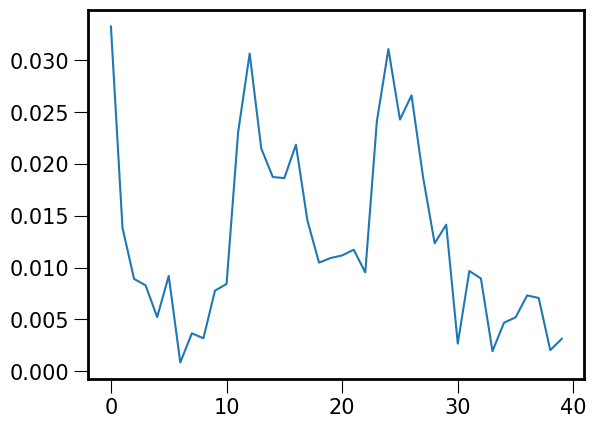

Epoch [500/5000], Loss: 6.149492810465809
Epoch [1000/5000], Loss: 1.4878363080176347
Epoch [1500/5000], Loss: 0.5499092902709688
Epoch [2000/5000], Loss: 0.2938325466690444
Epoch [2500/5000], Loss: 0.23100937739894958
Epoch [3000/5000], Loss: 0.21193916666957402
Epoch [3500/5000], Loss: 0.20548152504445757
Epoch [4000/5000], Loss: 0.2033978253125146
Epoch [4500/5000], Loss: 0.20281853370308084
Epoch [5000/5000], Loss: 0.2025583247710659
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 0.992 auc: nan
task 1 test accuracy: 0.992 auc: nan
task 2 train accuracy: 0.988 auc: nan
task 2 test accuracy: 0.988 auc: nan
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 0.989 auc: nan
task 4 test accuracy: 0.989 auc: nan
Epoch [500/5000], Loss: 5.184819149506697
Epoch [1000/5000], Loss: 1.3656618825604618
Epoch [1500/5000], Loss: 0.5660155792715234
Epoch [2000/5000], Loss: 0.3309525364458352
Epoch [25

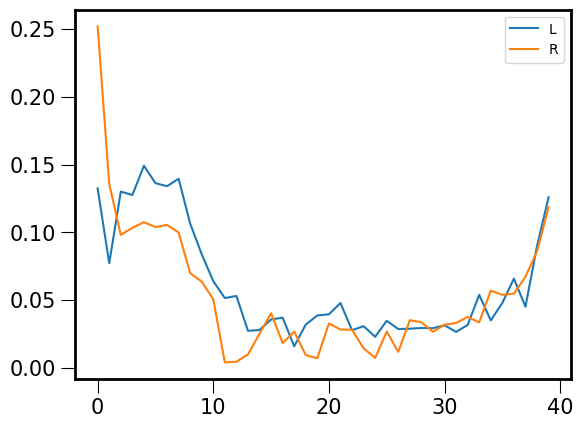

Epoch [500/5000], Loss: 3.628039183596788
Epoch [1000/5000], Loss: 0.6543232657293914
Epoch [1500/5000], Loss: 0.26278508647625215
Epoch [2000/5000], Loss: 0.2347413148984915
Epoch [2500/5000], Loss: 0.22790194853923462
Epoch [3000/5000], Loss: 0.2223107957111275
Epoch [3500/5000], Loss: 0.2185405010767374
Epoch [4000/5000], Loss: 0.21679348371577406
Epoch [4500/5000], Loss: 0.21589820212452188
Epoch [5000/5000], Loss: 0.21549125619381035
task 0 train accuracy: 1.000 auc: nan
task 0 test accuracy: 1.000 auc: nan
task 1 train accuracy: 0.988 auc: 0.975
task 1 test accuracy: 0.988 auc: 0.975
task 2 train accuracy: 0.958 auc: 0.764
task 2 test accuracy: 0.958 auc: 0.764
task 3 train accuracy: 1.000 auc: nan
task 3 test accuracy: 1.000 auc: nan
task 4 train accuracy: 0.977 auc: 0.741
task 4 test accuracy: 0.977 auc: 0.741
Epoch [500/5000], Loss: 7.453303907265431
Epoch [1000/5000], Loss: 1.1205583526084484
Epoch [1500/5000], Loss: 0.4022072267422378
Epoch [2000/5000], Loss: 0.3067615012076

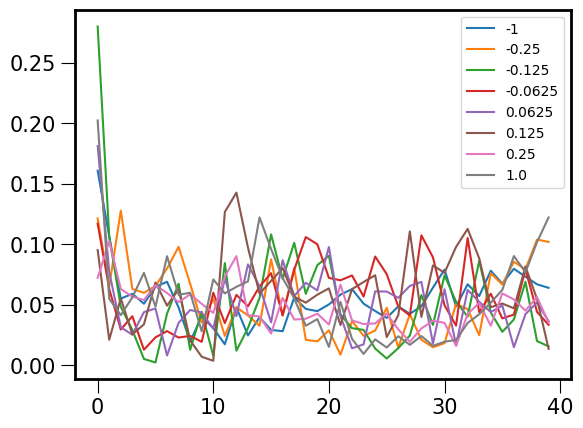

1/5 folds remaining ...
'176b4fe3-f570-4d9f-9e25-a5d218f75c8b'


In [4]:
for re_idx, roi in enumerate(regions):
    
    print(f"{re_idx+1}/{len(regions)} regions remaining ...")
    
    try:
        bwm_session_file = "/mnt/3TB/yizi/decode-paper-brain-wide-map/decoding/bwm_cache_sessions.pqt"

        bwm_df = pd.read_parquet(bwm_session_file)

        one = ONE(base_url="https://openalyx.internationalbrainlab.org", mode='remote')
        pids_per_region = one.search_insertions(atlas_acronym=[roi], query_type='remote')
        print(f"{roi}: {len(pids_per_region)} PIDs")

        pids = list(pids_per_region)[:10]

        all_svd_V = {}

        X_dict, Y_dict = load_data_from_pids(
            pids,
            brain_region=roi.lower(),
            behavior="choice",
            data_type="all_ks",
            n_t_bins = 40,
            t_before=0.5,
            t_after=1.5,
            align_time_type='stimOn_times',
        )

        # load contrast
        _, contrast_dict = load_data_from_pids(
            pids,
            brain_region=roi.lower(),
            behavior="contrast",
            data_type="good_ks",
            n_t_bins = 40,
            t_before=0.5,
            t_after=1.5,
            align_time_type='stimOn_times',
        )

        loaded_pids = list(X_dict.keys())

        contrast_level_dict = {}
        filter_trials_dict = {}
        for pid in loaded_pids:
            contrast_dict[pid] = np.nan_to_num(contrast_dict[pid], 0)
            contrast_dict[pid].T[0] *= -1
            contrast_level_dict[pid] = contrast_dict[pid].sum(1)
            filter_trials_dict[pid] = {}
            for level in np.unique(contrast_level_dict[pid]):
                filter_trials_dict[pid].update({level: np.argwhere(contrast_level_dict[pid] == level).flatten()})
            for val in np.unique(Y_dict[pid]):
                if val == 0:
                    direc = "L"
                else:
                    direc = "R"
                filter_trials_dict[pid].update({direc: np.argwhere(Y_dict[pid] == val).flatten()})

        R = 2 # rank
        d = 0 # half window size
        n_epochs = 5000 #7000            
        n_folds = 5

        train_pids, n_units = [], []
        train_X_dict, train_Y_dict = {}, {}
        for pid in loaded_pids:
            X, Y = X_dict[pid], Y_dict[pid]
            K, C, T = X.shape
            if C < 10:
                continue
            train_pids.append(pid)
            n_units.append(C)
            X = sliding_window_over_trials(X, half_window_size=d)
            Y = sliding_window_over_trials(Y, half_window_size=d)
            X, Y = torch.tensor(X), torch.tensor(Y)
            train_X_dict.update({pid: X})
            train_Y_dict.update({pid: Y})

        start_time = time.time()

        # extract V from trials with different contrasts
        print("Start extracting V from trials with different contrasts ...")
        train_X_lst = [train_X_dict[pid] for pid in train_pids]
        train_Y_lst = [train_Y_dict[pid] for pid in train_pids]

        multi_task_rrm = Multi_Task_Reduced_Rank_Model(
            n_tasks=len(train_pids),
            n_units=n_units, 
            n_t_bins=T, 
            rank=R, 
            half_window_size=d,
            init_Us = None,
            init_V = None,
        )

        # training on all data
        rrm, train_losses = train_multi_task(
            model=multi_task_rrm,
            train_dataset=(train_X_lst, train_Y_lst),
            test_dataset=(train_X_lst, train_Y_lst),
            loss_function=torch.nn.BCELoss(),
            learning_rate=1e-3,
            weight_decay=1e-1,
            n_epochs=n_epochs,
        )

        init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])
        init_V = multi_task_rrm.V.detach().numpy()
        Us, Vs = {}, {}
        for pid_idx, pid in enumerate(train_pids):
            Us.update({pid: init_Us[pid_idx]})
            Vs.update({pid: init_V})

        svd_W, svd_U, svd_S, svd_VT, S_mul_VT, W_reduced = [], [], [], [], [], []
        for pid in train_pids:
            W = np.array(Us[pid]) @ np.array(Vs[pid]).squeeze()
            U, S, VT = svd(W)
            svd_W.append(W)
            svd_U.append(U[:, :R])
            svd_S.append(S[:R])
            svd_VT.append(VT[:R, :])
            if len(S) == 1:
                S_mul_VT.append(np.diag(S) @ VT[:1, :])
            else:
                S_mul_VT.append(np.diag(S[:R]) @ VT[:R, :])

        all_svd_V.update({"all": S_mul_VT})

        plt.figure()
        plt.plot(np.abs(np.array(all_svd_V["all"])).mean(0).T[:,0])
        plt.show()


        # trials with diff choices
        for direc in ["L", "R"]:
            test_X_lst = [train_X_dict[pid][filter_trials_dict[pid][direc]] for pid in train_pids]
            test_Y_lst = [train_Y_dict[pid][filter_trials_dict[pid][direc]] for pid in train_pids]

            multi_task_rrm = Multi_Task_Reduced_Rank_Model(
                n_tasks=len(train_pids),
                n_units=n_units, 
                n_t_bins=T, 
                rank=R, 
                half_window_size=d,
                # init_Us = init_Us,
                # init_V = init_V
            )

            rrm, train_losses = train_multi_task(
                model=multi_task_rrm,
                train_dataset=(test_X_lst, test_Y_lst),
                test_dataset=(test_X_lst, test_Y_lst),
                loss_function=torch.nn.BCELoss(),
                learning_rate=1e-3,
                weight_decay=1e-1,
                n_epochs=n_epochs,
            )

            test_U, test_V, _, _ = model_eval(
                multi_task_rrm, 
                train_dataset=(test_X_lst, test_Y_lst),
                test_dataset=(test_X_lst, test_Y_lst),
                behavior="choice"
            )

            Us, Vs = {}, {}
            for pid_idx, pid in enumerate(train_pids):
                Us.update({pid: test_U[pid_idx]})
                Vs.update({pid: test_V})

            svd_W, svd_U, svd_S, svd_VT, S_mul_VT, W_reduced = [], [], [], [], [], []
            for pid in train_pids:
                W = np.array(Us[pid]) @ np.array(Vs[pid]).squeeze()
                U, S, VT = svd(W)
                svd_W.append(W)
                svd_U.append(U[:, :R])
                svd_S.append(S[:R])
                svd_VT.append(VT[:R, :])
                if len(S) == 1:
                    S_mul_VT.append(np.diag(S) @ VT[:1, :])
                else:
                    S_mul_VT.append(np.diag(S[:R]) @ VT[:R, :])

            all_svd_V.update({direc: S_mul_VT})

        plt.figure()
        for direc in ["L", "R"]:
            plt.plot(np.abs(np.array(all_svd_V[direc])).mean(0).T[:,0], label=direc)
        plt.legend()
        plt.show()

        # trials with diff contrasts
        for level in [-1, -.25, -.125, -.0625, .0625, .125, .25, 1.]:
            try:
                test_X_lst = [train_X_dict[pid][filter_trials_dict[pid][level]] for pid in train_pids]
                test_Y_lst = [train_Y_dict[pid][filter_trials_dict[pid][level]] for pid in train_pids]
            except:
                continue

            multi_task_rrm = Multi_Task_Reduced_Rank_Model(
                n_tasks=len(train_pids),
                n_units=n_units, 
                n_t_bins=T, 
                rank=R, 
                half_window_size=d,
                # init_Us = init_Us,
                # init_V = init_V
            )

            rrm, train_losses = train_multi_task(
                model=multi_task_rrm,
                train_dataset=(test_X_lst, test_Y_lst),
                test_dataset=(test_X_lst, test_Y_lst),
                loss_function=torch.nn.BCELoss(),
                learning_rate=1e-3,
                weight_decay=1e-1,
                n_epochs=n_epochs,
            )

            test_U, test_V, _, _ = model_eval(
                multi_task_rrm, 
                train_dataset=(test_X_lst, test_Y_lst),
                test_dataset=(test_X_lst, test_Y_lst),
                behavior="choice"
            )

            Us, Vs = {}, {}
            for pid_idx, pid in enumerate(train_pids):
                Us.update({pid: test_U[pid_idx]})
                Vs.update({pid: test_V})

            svd_W, svd_U, svd_S, svd_VT, S_mul_VT, W_reduced = [], [], [], [], [], []
            for pid in train_pids:
                W = np.array(Us[pid]) @ np.array(Vs[pid]).squeeze()
                U, S, VT = svd(W)
                svd_W.append(W)
                svd_U.append(U[:, :R])
                svd_S.append(S[:R])
                svd_VT.append(VT[:R, :])
                if len(S) == 1:
                    S_mul_VT.append(np.diag(S) @ VT[:1, :])
                else:
                    S_mul_VT.append(np.diag(S[:R]) @ VT[:R, :])

            all_svd_V.update({level: S_mul_VT})

        plt.figure()
        for level in [-1, -.25, -.125, -.0625, .0625, .125, .25, 1.]:
            plt.plot(np.abs(np.array(all_svd_V[level])).mean(0).T[:,0], label=level)
        plt.legend()
        plt.show()

        np.save(f"../biorxiv_plots/results/{roi}_timescale.npy", all_svd_V)


        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

        train_pids, n_units = [], []
        train_X_dict, test_X_dict, train_Y_dict, test_Y_dict = {}, {}, {}, {}
        for pid in loaded_pids:
            X, Y = X_dict[pid], Y_dict[pid]
            K, C, T = X.shape
            if C < 10:
                continue
            train_pids.append(pid)
            n_units.append(C)
            X = sliding_window_over_trials(X, half_window_size=d)
            Y = sliding_window_over_trials(Y, half_window_size=d)
            X, Y = torch.tensor(X), torch.tensor(Y)
            train_X_dict.update({pid: [X[train] for train, _ in skf.split(X, Y)]})
            test_X_dict.update({pid: [X[test] for _, test in skf.split(X, Y)]})
            train_Y_dict.update({pid: [Y[train] for train, _ in skf.split(X, Y)]})
            test_Y_dict.update({pid: [Y[test] for _, test in skf.split(X, Y)]})

        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

        metrics_per_fold = []
        for fold_idx in range(n_folds):

            print(f"{fold_idx+1}/{n_folds} folds remaining ...")
            train_X_lst = [train_X_dict[pid][fold_idx] for pid in pids]
            test_X_lst = [test_X_dict[pid][fold_idx] for pid in pids]
            train_Y_lst = [train_Y_dict[pid][fold_idx] for pid in pids]
            test_Y_lst = [test_Y_dict[pid][fold_idx] for pid in pids]

            multi_task_rrm = Multi_Task_Reduced_Rank_Model(
                n_tasks=len(train_pids),
                n_units=n_units, 
                n_t_bins=T, 
                rank=R, 
                half_window_size=d
            )

            # training
            rrm, train_losses = train_multi_task(
                model=multi_task_rrm,
                train_dataset=(train_X_lst, train_Y_lst),
                test_dataset=(test_X_lst, test_Y_lst),
                loss_function=torch.nn.BCELoss(),
                learning_rate=1e-3,
                weight_decay=1e-1,
                n_epochs=n_epochs,
            )

            # eval
            _, _, test_metrics, _ = model_eval(
                multi_task_rrm, 
                train_dataset=(train_X_lst, train_Y_lst),
                test_dataset=(test_X_lst, test_Y_lst),
                behavior="choice"
            )
            metrics_per_fold.append(test_metrics)

        metrics_dict = {}
        for pid_idx, pid in enumerate(pids):
            metrics_dict.update({pid: np.mean(metrics_per_fold, 0)[pid_idx]})
        np.save(f"../biorxiv_plots/results/{roi}_metrics.npy", metrics_dict)

        end_time = time.time()
        print(f"time spent: {end_time - start_time: .3f} seconds")
        
    except Exception as e: 
        print(e)
        continue